In [ ]:
!git clone https://github.com/ds4v/absa-vlsp-2018.git

Cloning into 'absa-vlsp-2018'...
remote: Enumerating objects: 255, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 255 (delta 21), reused 17 (delta 17), pack-reused 223 (from 2)
Receiving objects: 100% (255/255), 32.07 MiB | 21.95 MiB/s, done.
Resolving deltas: 100% (95/95), done.


In [ ]:
!pip install underthesea

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.9 MB/s eta 0:00:00


In [ ]:
# ================================
# 1. SETUP AND INSTALLATIONS
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import warnings
warnings.filterwarnings('ignore')

# NLP and ML libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Deep learning
import torch
import torch.nn as nn
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader

# Vietnamese NLP
from underthesea import word_tokenize, pos_tag
import nltk
nltk.download('punkt')

# Visualization
from wordcloud import WordCloud

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

print("All packages installed successfully!")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


All packages installed successfully!


In [ ]:

from datasets import load_from_disk
preprocessed_hotel_train = load_from_disk("/content/absa-vlsp-2018/datasets/preprocessed_hotel/train")
preprocessed_hotel_val = load_from_disk("/content/absa-vlsp-2018/datasets/preprocessed_hotel/val")
preprocessed_hotel_test = load_from_disk("/content/absa-vlsp-2018/datasets/preprocessed_hotel/test")


In [ ]:

print("preprocessed_hotel_train:", preprocessed_hotel_train)
print("preprocessed_hotel_val:", preprocessed_hotel_val)
print("preprocessed_hotel_test:", preprocessed_hotel_test)

preprocessed_hotel_train: Dataset({
    features: ['FACILITIES#CLEANLINESS', 'FACILITIES#COMFORT', 'FACILITIES#DESIGN&FEATURES', 'FACILITIES#GENERAL', 'FACILITIES#MISCELLANEOUS', 'FACILITIES#PRICES', 'FACILITIES#QUALITY', 'FOOD&DRINKS#MISCELLANEOUS', 'FOOD&DRINKS#PRICES', 'FOOD&DRINKS#QUALITY', 'FOOD&DRINKS#STYLE&OPTIONS', 'HOTEL#CLEANLINESS', 'HOTEL#COMFORT', 'HOTEL#DESIGN&FEATURES', 'HOTEL#GENERAL', 'HOTEL#MISCELLANEOUS', 'HOTEL#PRICES', 'HOTEL#QUALITY', 'LOCATION#GENERAL', 'ROOMS#CLEANLINESS', 'ROOMS#COMFORT', 'ROOMS#DESIGN&FEATURES', 'ROOMS#GENERAL', 'ROOMS#MISCELLANEOUS', 'ROOMS#PRICES', 'ROOMS#QUALITY', 'ROOM_AMENITIES#CLEANLINESS', 'ROOM_AMENITIES#COMFORT', 'ROOM_AMENITIES#DESIGN&FEATURES', 'ROOM_AMENITIES#GENERAL', 'ROOM_AMENITIES#MISCELLANEOUS', 'ROOM_AMENITIES#PRICES', 'ROOM_AMENITIES#QUALITY', 'SERVICE#GENERAL', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 3000
})
preprocessed_hotel_val: Dataset({
    features: ['FACILITIES#CLEANLINESS', 'FACILITIES#COMFOR

In [ ]:
preprocessed_restaurant_train = load_from_disk("/content/absa-vlsp-2018/datasets/preprocessed_restaurant/train")
preprocessed_restaurant_val = load_from_disk("/content/absa-vlsp-2018/datasets/preprocessed_restaurant/val")
preprocessed_restaurant_test = load_from_disk("/content/absa-vlsp-2018/datasets/preprocessed_restaurant/test")

In [ ]:
print("preprocessed_restaurant_train:", preprocessed_restaurant_train)
print("preprocessed_restaurant_val:", preprocessed_restaurant_val)
print("preprocessed_restaurant_test:", preprocessed_restaurant_test)

preprocessed_restaurant_train: Dataset({
    features: ['AMBIENCE#GENERAL', 'DRINKS#PRICES', 'DRINKS#QUALITY', 'DRINKS#STYLE&OPTIONS', 'FOOD#PRICES', 'FOOD#QUALITY', 'FOOD#STYLE&OPTIONS', 'LOCATION#GENERAL', 'RESTAURANT#GENERAL', 'RESTAURANT#MISCELLANEOUS', 'RESTAURANT#PRICES', 'SERVICE#GENERAL', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 2961
})
preprocessed_restaurant_val: Dataset({
    features: ['AMBIENCE#GENERAL', 'DRINKS#PRICES', 'DRINKS#QUALITY', 'DRINKS#STYLE&OPTIONS', 'FOOD#PRICES', 'FOOD#QUALITY', 'FOOD#STYLE&OPTIONS', 'LOCATION#GENERAL', 'RESTAURANT#GENERAL', 'RESTAURANT#MISCELLANEOUS', 'RESTAURANT#PRICES', 'SERVICE#GENERAL', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 1290
})
preprocessed_restaurant_test: Dataset({
    features: ['AMBIENCE#GENERAL', 'DRINKS#PRICES', 'DRINKS#QUALITY', 'DRINKS#STYLE&OPTIONS', 'FOOD#PRICES', 'FOOD#QUALITY', 'FOOD#STYLE&OPTIONS', 'LOCATION#GENERAL', 'RESTAURANT#GENERAL', 'RESTAURANT#MISCELLANEOUS', 'REST

# Hotel

## SVM, KNN, NB, LR, RF


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from scipy.sparse import csr_matrix
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class ABSAAnalyzer:
    def __init__(self, train_dataset, val_dataset, test_dataset):
        self.train_dataset = train_dataset
        self.val_dataset = val_dataset
        self.test_dataset = test_dataset

        # Define aspect categories
        self.aspect_categories = [
            'FACILITIES#CLEANLINESS', 'FACILITIES#COMFORT', 'FACILITIES#DESIGN&FEATURES',
            'FACILITIES#GENERAL', 'FACILITIES#MISCELLANEOUS', 'FACILITIES#PRICES',
            'FACILITIES#QUALITY', 'FOOD&DRINKS#MISCELLANEOUS', 'FOOD&DRINKS#PRICES',
            'FOOD&DRINKS#QUALITY', 'FOOD&DRINKS#STYLE&OPTIONS', 'HOTEL#CLEANLINESS',
            'HOTEL#COMFORT', 'HOTEL#DESIGN&FEATURES', 'HOTEL#GENERAL',
            'HOTEL#MISCELLANEOUS', 'HOTEL#PRICES', 'HOTEL#QUALITY',
            'LOCATION#GENERAL', 'ROOMS#CLEANLINESS', 'ROOMS#COMFORT',
            'ROOMS#DESIGN&FEATURES', 'ROOMS#GENERAL', 'ROOMS#MISCELLANEOUS',
            'ROOMS#PRICES', 'ROOMS#QUALITY', 'ROOM_AMENITIES#CLEANLINESS',
            'ROOM_AMENITIES#COMFORT', 'ROOM_AMENITIES#DESIGN&FEATURES',
            'ROOM_AMENITIES#GENERAL', 'ROOM_AMENITIES#MISCELLANEOUS',
            'ROOM_AMENITIES#PRICES', 'ROOM_AMENITIES#QUALITY', 'SERVICE#GENERAL'
        ]

        self.models = {}
        self.results = {}

    def perform_eda(self):
        """Perform comprehensive Exploratory Data Analysis"""
        print("=" * 60)
        print("EXPLORATORY DATA ANALYSIS")
        print("=" * 60)

        # Dataset summary
        print("\n1. DATASET SUMMARY")
        print("-" * 30)
        print(f"Training samples: {len(self.train_dataset)}")
        print(f"Validation samples: {len(self.val_dataset)}")
        print(f"Test samples: {len(self.test_dataset)}")
        print(f"Total aspect categories: {len(self.aspect_categories)}")

        # Convert datasets to DataFrames for analysis
        train_df = pd.DataFrame(self.train_dataset)
        val_df = pd.DataFrame(self.val_dataset)
        test_df = pd.DataFrame(self.test_dataset)

        # Class distribution analysis
        print("\n2. CLASS DISTRIBUTION ANALYSIS")
        print("-" * 35)

        # Calculate label statistics for each aspect
        label_stats = {}
        for aspect in self.aspect_categories:
            train_labels = np.array(train_df[aspect])
            positive_count = np.sum(train_labels == 1)
            negative_count = np.sum(train_labels == -1)
            neutral_count = np.sum(train_labels == 0)

            label_stats[aspect] = {
                'positive': positive_count,
                'negative': negative_count,
                'neutral': neutral_count,
                'total': len(train_labels)
            }

        # Display top 10 most frequent aspects
        aspect_frequencies = {aspect: stats['positive'] + stats['negative']
                            for aspect, stats in label_stats.items()}
        top_aspects = sorted(aspect_frequencies.items(), key=lambda x: x[1], reverse=True)[:10]

        print("\nTop 10 Most Frequent Aspects:")
        for i, (aspect, freq) in enumerate(top_aspects, 1):
            print(f"{i:2d}. {aspect}: {freq} samples")

        # Visualizations
        self._create_visualizations(label_stats, train_df)

        # Feature correlation analysis
        self._analyze_correlations(train_df)

        return label_stats

    def _create_visualizations(self, label_stats, train_df):
        """Create comprehensive visualizations"""
        # 1. Class distribution heatmap
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))

        # Prepare data for heatmap
        aspect_names = []
        pos_counts = []
        neg_counts = []
        neu_counts = []

        for aspect, stats in label_stats.items():
            aspect_names.append(aspect.replace('#', '\n'))
            pos_counts.append(stats['positive'])
            neg_counts.append(stats['negative'])
            neu_counts.append(stats['neutral'])

        # Plot 1: Positive sentiment distribution
        ax1 = axes[0, 0]
        bars1 = ax1.bar(range(len(aspect_names)), pos_counts, color='green', alpha=0.7)
        ax1.set_title('Positive Sentiment Distribution Across Aspects', fontsize=12, fontweight='bold')
        ax1.set_xlabel('Aspect Categories')
        ax1.set_ylabel('Count')
        ax1.tick_params(axis='x', rotation=45, labelsize=8)
        ax1.set_xticks(range(0, len(aspect_names), 3))
        ax1.set_xticklabels([aspect_names[i] for i in range(0, len(aspect_names), 3)])

        # Plot 3: Overall sentiment distribution
        ax3 = axes[1, 0]
        total_pos = sum(pos_counts)
        total_neg = sum(neg_counts)
        total_neu = sum(neu_counts)

        labels = ['Positive', 'Negative', 'Neutral']
        sizes = [total_pos, total_neg, total_neu]
        colors = ['green', 'red', 'gray']

        ax3.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
        ax3.set_title('Overall Sentiment Distribution', fontsize=12, fontweight='bold')

        # Plot 4: Top 10 aspects by activity
        ax4 = axes[1, 1]
        aspect_activity = [(aspect.split('#')[0], pos + neg)
                          for aspect, pos, neg in zip(aspect_names, pos_counts, neg_counts)]
        aspect_activity.sort(key=lambda x: x[1], reverse=True)

        top_10 = aspect_activity[:10]
        categories = [item[0] for item in top_10]
        activities = [item[1] for item in top_10]

        ax4.barh(categories, activities, color='skyblue', alpha=0.8)
        ax4.set_title('Top 10 Most Active Aspect Categories', fontsize=12, fontweight='bold')
        ax4.set_xlabel('Number of Reviews')

        plt.tight_layout()
        plt.show()

        # Additional visualization: Imbalance analysis
        self._plot_imbalance_analysis(label_stats)

    def _plot_imbalance_analysis(self, label_stats):
        """Analyze and visualize class imbalance"""
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))

        # Calculate imbalance ratios
        imbalance_ratios = []
        aspect_names_short = []

        for aspect, stats in label_stats.items():
            if stats['positive'] + stats['negative'] > 0:
                ratio = abs(stats['positive'] - stats['negative']) / (stats['positive'] + stats['negative'])
                imbalance_ratios.append(ratio)
                aspect_names_short.append(aspect.split('#')[1] if '#' in aspect else aspect)

        # Plot 1: Imbalance ratios
        ax1 = axes[0]
        bars = ax1.bar(range(len(imbalance_ratios)), imbalance_ratios,
                      color=['red' if r > 0.5 else 'orange' if r > 0.3 else 'green' for r in imbalance_ratios])
        ax1.set_title('Class Imbalance Analysis', fontsize=12, fontweight='bold')
        ax1.set_xlabel('Aspect Categories')
        ax1.set_ylabel('Imbalance Ratio')
        ax1.axhline(y=0.3, color='orange', linestyle='--', alpha=0.7, label='Moderate Imbalance')
        ax1.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='High Imbalance')
        ax1.legend()
        ax1.tick_params(axis='x', rotation=45, labelsize=8)

        # Plot 2: Sample distribution per aspect
        ax2 = axes[1]
        total_samples = [stats['positive'] + stats['negative'] for stats in label_stats.values()]
        ax2.hist(total_samples, bins=20, color='skyblue', alpha=0.7, edgecolor='black')
        ax2.set_title('Distribution of Sample Counts per Aspect', fontsize=12, fontweight='bold')
        ax2.set_xlabel('Number of Samples')
        ax2.set_ylabel('Number of Aspects')
        ax2.axvline(x=np.mean(total_samples), color='red', linestyle='--',
                   label=f'Mean: {np.mean(total_samples):.1f}')
        ax2.legend()

        plt.tight_layout()
        plt.show()

    def _analyze_correlations(self, train_df):
        """Analyze correlations between aspects"""
        print("\n3. CORRELATION ANALYSIS")
        print("-" * 25)

        # Calculate correlation matrix
        aspect_data = train_df[self.aspect_categories].astype(float)
        correlation_matrix = aspect_data.corr()

        # Find highest correlations
        correlations = []
        for i in range(len(self.aspect_categories)):
            for j in range(i+1, len(self.aspect_categories)):
                corr_val = correlation_matrix.iloc[i, j]
                if abs(corr_val) > 0.3:  # Only significant correlations
                    correlations.append((
                        self.aspect_categories[i],
                        self.aspect_categories[j],
                        corr_val
                    ))

        # Sort by absolute correlation value
        correlations.sort(key=lambda x: abs(x[2]), reverse=True)

        print("Top 10 Highest Correlations:")
        for i, (asp1, asp2, corr) in enumerate(correlations[:10], 1):
            print(f"{i:2d}. {asp1} <-> {asp2}: {corr:.3f}")

        # Visualize correlation matrix (subset for readability)
        plt.figure(figsize=(14, 12))

        # Select top 15 most active aspects for visualization
        aspect_activity = {}
        for aspect in self.aspect_categories:
            activity = np.sum(np.abs(train_df[aspect]))
            aspect_activity[aspect] = activity

        top_aspects = sorted(aspect_activity.items(), key=lambda x: x[1], reverse=True)[:15]
        top_aspect_names = [asp[0] for asp in top_aspects]

        # Create subset correlation matrix
        subset_corr = correlation_matrix.loc[top_aspect_names, top_aspect_names]

        # Create heatmap
        mask = np.triu(np.ones_like(subset_corr, dtype=bool))
        sns.heatmap(subset_corr, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
                   square=True, fmt='.2f', cbar_kws={"shrink": .8})
        plt.title('Correlation Matrix - Top 15 Most Active Aspects', fontsize=14, fontweight='bold')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

    def prepare_features(self):
        """Prepare features for model training"""
        print("\n4. FEATURE PREPARATION")
        print("-" * 25)

        # Extract features and labels
        X_train = np.array(self.train_dataset['input_ids'])
        X_val = np.array(self.val_dataset['input_ids'])
        X_test = np.array(self.test_dataset['input_ids'])

        # Convert labels
        y_train = np.array([self.train_dataset[aspect] for aspect in self.aspect_categories]).T
        y_val = np.array([self.val_dataset[aspect] for aspect in self.aspect_categories]).T
        y_test = np.array([self.test_dataset[aspect] for aspect in self.aspect_categories]).T

        # Feature engineering: Use mean pooling of embeddings as features
        # Assuming input_ids are tokenized sequences, we'll use simple averaging
        X_train_features = np.array([np.mean(seq) if len(seq) > 0 else 0 for seq in X_train]).reshape(-1, 1)
        X_val_features = np.array([np.mean(seq) if len(seq) > 0 else 0 for seq in X_val]).reshape(-1, 1)
        X_test_features = np.array([np.mean(seq) if len(seq) > 0 else 0 for seq in X_test]).reshape(-1, 1)

        # Add sequence length as feature
        seq_len_train = np.array([len(seq) for seq in X_train]).reshape(-1, 1)
        seq_len_val = np.array([len(seq) for seq in X_val]).reshape(-1, 1)
        seq_len_test = np.array([len(seq) for seq in X_test]).reshape(-1, 1)

        # Combine features
        X_train_final = np.hstack([X_train_features, seq_len_train])
        X_val_final = np.hstack([X_val_features, seq_len_val])
        X_test_final = np.hstack([X_test_features, seq_len_test])

        # Normalize features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_final)
        X_val_scaled = scaler.transform(X_val_final)
        X_test_scaled = scaler.transform(X_test_final)

        print(f"Feature shape: {X_train_scaled.shape}")
        print(f"Label shape: {y_train.shape}")
        print(f"Number of aspects: {len(self.aspect_categories)}")

        return X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test, scaler

    def train_models(self, X_train, X_val, X_test, y_train, y_val, y_test):
        """Train multiple models for comparison"""
        print("\n5. MODEL TRAINING")
        print("-" * 20)

        # Define models
        base_models = {
            'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
            'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
            'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
            'Support Vector Machine': SVC(kernel='rbf', random_state=42),
            'Naive Bayes': MultinomialNB()
        }

        # Train models
        trained_models = {}

        # Check for single-class aspects
        single_class_aspects = {}
        for i, aspect in enumerate(self.aspect_categories):
            unique_classes = np.unique(y_train[:, i])
            if len(unique_classes) <= 1:
                single_class_aspects[aspect] = unique_classes[0] if len(unique_classes) > 0 else 0

        for name, base_model in base_models.items():
            print(f"\nTraining {name}...")

            try:
                if name in ['Logistic Regression', 'Support Vector Machine']:
                    # Create a mask for aspects with more than one class
                    multi_class_aspect_indices = [i for i, aspect in enumerate(self.aspect_categories)
                                                if aspect not in single_class_aspects]

                    if not multi_class_aspect_indices:
                        print(f"Skipping {name} training: No aspects with multiple classes found.")
                        continue

                    # Train only on multi-class aspects
                    y_train_filtered = y_train[:, multi_class_aspect_indices]
                    model = MultiOutputClassifier(base_model)
                    model.fit(X_train, y_train_filtered)
                    trained_models[name] = (model, multi_class_aspect_indices)

                elif name == 'Naive Bayes':
                    # Naive Bayes requires non-negative input
                    X_train_pos = X_train - X_train.min() + 1
                    X_val_pos = X_val - X_val.min() + 1
                    X_test_pos = X_test - X_test.min() + 1

                    model = MultiOutputClassifier(base_model)
                    model.fit(X_train_pos, y_train)
                    trained_models[name] = (model, X_train_pos, X_val_pos, X_test_pos)

                else:
                    # For KNN and Random Forest - train on all aspects
                    model = MultiOutputClassifier(base_model)
                    model.fit(X_train, y_train)
                    trained_models[name] = (model,)

                print(f"{name} training completed!")

            except Exception as e:
                print(f"Error training {name}: {str(e)}")
                import traceback
                traceback.print_exc()
                continue

        self.models = trained_models
        self.single_class_aspects = single_class_aspects
        return trained_models

    def evaluate_models(self, X_val, X_test, y_val, y_test):
        """Evaluate all trained models"""
        print("\n6. MODEL EVALUATION")
        print("-" * 22)
        self.y_test = y_test
        results = {}

        for name, model_info in self.models.items():
            print(f"\nEvaluating {name}...")

            try:
                if name in ['Logistic Regression', 'Support Vector Machine']:
                    model, multi_class_aspect_indices = model_info

                    # Use original data for these models
                    y_val_pred_filtered = model.predict(X_val)
                    y_test_pred_filtered = model.predict(X_test)

                    # Reconstruct full prediction arrays with single-class aspects
                    y_val_pred = np.zeros_like(y_val)
                    y_test_pred = np.zeros_like(y_test)

                    trained_aspect_idx = 0
                    for i, aspect in enumerate(self.aspect_categories):
                        if aspect in self.single_class_aspects:
                            # Assign the single observed class
                            y_val_pred[:, i] = self.single_class_aspects[aspect]
                            y_test_pred[:, i] = self.single_class_aspects[aspect]
                        else:
                            # Assign the model prediction
                            if trained_aspect_idx < y_val_pred_filtered.shape[1]:
                                y_val_pred[:, i] = y_val_pred_filtered[:, trained_aspect_idx]
                                y_test_pred[:, i] = y_test_pred_filtered[:, trained_aspect_idx]
                                trained_aspect_idx += 1

                elif name == 'Naive Bayes':
                    model, X_train_transformed, X_val_transformed, X_test_transformed = model_info
                    y_val_pred = model.predict(X_val_transformed)
                    y_test_pred = model.predict(X_test_transformed)

                else:
                    # For KNN and Random Forest
                    model = model_info[0] if isinstance(model_info, tuple) else model_info
                    y_val_pred = model.predict(X_val)
                    y_test_pred = model.predict(X_test)

                # Calculate metrics for validation set
                val_accuracy = accuracy_score(y_val.flatten(), y_val_pred.flatten())
                val_precision, val_recall, val_f1, _ = precision_recall_fscore_support(
                    y_val.flatten(), y_val_pred.flatten(), average='weighted', zero_division=0
                )

                # Calculate metrics for test set
                test_accuracy = accuracy_score(y_test.flatten(), y_test_pred.flatten())
                test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(
                    y_test.flatten(), y_test_pred.flatten(), average='weighted', zero_division=0
                )

                results[name] = {
                    'val_accuracy': val_accuracy,
                    'val_precision': val_precision,
                    'val_recall': val_recall,
                    'val_f1': val_f1,
                    'test_accuracy': test_accuracy,
                    'test_precision': test_precision,
                    'test_recall': test_f1,
                    'test_f1': test_f1,
                    'predictions': {
                        'val': y_val_pred,
                        'test': y_test_pred
                    }
                }

                print(f"Validation - Accuracy: {val_accuracy:.4f}, F1: {val_f1:.4f}")
                print(f"Test - Accuracy: {test_accuracy:.4f}, F1: {test_f1:.4f}")

            except Exception as e:
                print(f"Error evaluating {name}: {str(e)}")
                import traceback
                traceback.print_exc()  # This will help debug further issues
                continue

        self.results = results
        return results

    def benchmark_models(self):
        """Create comprehensive benchmark comparison"""
        print("\n7. MODEL BENCHMARKING")
        print("-" * 25)

        if not self.results:
            print("No results available for benchmarking!")
            return

        # Create comparison DataFrame
        metrics = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']
        metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

        benchmark_data = []
        for model_name, results in self.results.items():
            row = [model_name] + [results[metric] for metric in metrics]
            benchmark_data.append(row)

        benchmark_df = pd.DataFrame(benchmark_data,
                                  columns=['Model'] + metric_names)

        print("\nBENCHMARK RESULTS (Test Set):")
        print("=" * 50)
        print(benchmark_df.round(4).to_string(index=False))

        # Find best model
        best_model_idx = benchmark_df['F1-Score'].idxmax()
        best_model = benchmark_df.iloc[best_model_idx]['Model']
        best_f1 = benchmark_df.iloc[best_model_idx]['F1-Score']

        print(f"\nBEST PERFORMING MODEL:")
        print(f"Model: {best_model}")
        print(f"F1-Score: {best_f1:.4f}")

        # Visualize benchmark results
        self._plot_benchmark_results(benchmark_df)

        return benchmark_df, best_model

    def _plot_benchmark_results(self, benchmark_df):
        """Plot benchmark comparison"""
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))

        # Plot 1: Bar chart comparison
        ax1 = axes[0]
        metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
        x = np.arange(len(benchmark_df))
        width = 0.2

        colors = ['skyblue', 'lightgreen', 'salmon', 'gold']

        for i, metric in enumerate(metrics):
            ax1.bar(x + i*width, benchmark_df[metric], width,
                   label=metric, color=colors[i], alpha=0.8)

        ax1.set_xlabel('Models')
        ax1.set_ylabel('Score')
        ax1.set_title('Model Performance Comparison', fontweight='bold')
        ax1.set_xticks(x + width * 1.5)
        ax1.set_xticklabels(benchmark_df['Model'], rotation=45, ha='right')
        ax1.legend()
        ax1.grid(axis='y', alpha=0.3)

        # Plot 2: F1-Score ranking
        ax2 = axes[1]
        sorted_df = benchmark_df.sort_values('F1-Score', ascending=True)

        bars = ax2.barh(sorted_df['Model'], sorted_df['F1-Score'],
                       color='lightcoral', alpha=0.8)
        ax2.set_xlabel('F1-Score')
        ax2.set_title('Model Ranking by F1-Score', fontweight='bold')
        ax2.grid(axis='x', alpha=0.3)

        # Highlight best model
        best_idx = sorted_df['F1-Score'].idxmax()
        bars[len(bars)-1].set_color('darkgreen')
        bars[len(bars)-1].set_alpha(1.0)

        plt.tight_layout()
        plt.show()
    def generate_classification_report(self, model_name=None):
        """Generate detailed classification report for each aspect category"""
        if not self.results:
            print("No model results available. Please run evaluation first.")
            return None

        # Use best model if no specific model provided
        if model_name is None:
            model_name = max(self.results.keys(), key=lambda k: self.results[k]['test_f1'])

        if model_name not in self.results:
            print(f"Model '{model_name}' not found in results.")
            return None

        # Get predictions and true labels
        y_test_pred = self.results[model_name]['predictions']['test']

        # Get true test labels (you'll need to pass this or store it in the class)
        # For now, assuming you have access to y_test from the pipeline
        # You should modify the evaluate_models method to store y_test in self.y_test
        if not hasattr(self, 'y_test'):
            print("True test labels not available. Please store y_test in the class during evaluation.")
            return None

        y_test_true = self.y_test

        print(f"\nClassification Report for {model_name}:")
        print("="*80)

        # Calculate metrics for each aspect
        aspect_reports = []

        for i, aspect in enumerate(self.aspect_categories):
            y_true_aspect = y_test_true[:, i]
            y_pred_aspect = y_test_pred[:, i]

            # Get unique classes for this aspect
            classes = np.unique(np.concatenate([y_true_aspect, y_pred_aspect]))

            # Calculate metrics for each class
            class_metrics = {}
            for cls in classes:
                # True positives, false positives, false negatives
                tp = np.sum((y_true_aspect == cls) & (y_pred_aspect == cls))
                fp = np.sum((y_true_aspect != cls) & (y_pred_aspect == cls))
                fn = np.sum((y_true_aspect == cls) & (y_pred_aspect != cls))

                # Calculate precision, recall, f1-score
                precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
                recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
                f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0
                support = np.sum(y_true_aspect == cls)

                class_metrics[cls] = {
                    'precision': precision,
                    'recall': recall,
                    'f1-score': f1,
                    'support': support
                }

            # Calculate weighted averages for this aspect
            total_support = len(y_true_aspect)
            weighted_precision = sum(class_metrics[cls]['precision'] * class_metrics[cls]['support']
                                  for cls in classes) / total_support if total_support > 0 else 0.0
            weighted_recall = sum(class_metrics[cls]['recall'] * class_metrics[cls]['support']
                                for cls in classes) / total_support if total_support > 0 else 0.0
            weighted_f1 = sum(class_metrics[cls]['f1-score'] * class_metrics[cls]['support']
                            for cls in classes) / total_support if total_support > 0 else 0.0

            aspect_reports.append({
                'aspect': aspect,
                'precision': weighted_precision,
                'recall': weighted_recall,
                'f1-score': weighted_f1,
                'support': total_support
            })

        # Print formatted report
        print(f"{'':30} {'precision':>9} {'recall':>9} {'f1-score':>9} {'support':>9}")
        print()

        for report in aspect_reports:
            aspect_name = report['aspect'].replace('#', '_').lower()
            print(f"{aspect_name:30} {report['precision']:9.2f} {report['recall']:9.2f} "
                  f"{report['f1-score']:9.2f} {report['support']:9.0f}")

        # Calculate overall averages
        total_samples = sum(report['support'] for report in aspect_reports)

        # Micro averages (calculated across all samples)
        micro_precision = sum(report['precision'] * report['support'] for report in aspect_reports) / total_samples
        micro_recall = sum(report['recall'] * report['support'] for report in aspect_reports) / total_samples
        micro_f1 = sum(report['f1-score'] * report['support'] for report in aspect_reports) / total_samples

        # Macro averages (unweighted average across aspects)
        macro_precision = np.mean([report['precision'] for report in aspect_reports])
        macro_recall = np.mean([report['recall'] for report in aspect_reports])
        macro_f1 = np.mean([report['f1-score'] for report in aspect_reports])

        # Weighted averages (weighted by support)
        weighted_precision = sum(report['precision'] * report['support'] for report in aspect_reports) / total_samples
        weighted_recall = sum(report['recall'] * report['support'] for report in aspect_reports) / total_samples
        weighted_f1 = sum(report['f1-score'] * report['support'] for report in aspect_reports) / total_samples

        print()
        print(f"{'micro avg':30} {micro_precision:9.2f} {micro_recall:9.2f} {micro_f1:9.2f} {total_samples:9.0f}")
        print(f"{'macro avg':30} {macro_precision:9.2f} {macro_recall:9.2f} {macro_f1:9.2f} {total_samples:9.0f}")
        print(f"{'weighted avg':30} {weighted_precision:9.2f} {weighted_recall:9.2f} {weighted_f1:9.2f} {total_samples:9.0f}")
        print(f"{'samples avg':30} {weighted_precision:9.2f} {weighted_recall:9.2f} {weighted_f1:9.2f} {total_samples:9.0f}")

        return {
            'aspect_reports': aspect_reports,
            'micro_avg': {'precision': micro_precision, 'recall': micro_recall, 'f1-score': micro_f1},
            'macro_avg': {'precision': macro_precision, 'recall': macro_recall, 'f1-score': macro_f1},
            'weighted_avg': {'precision': weighted_precision, 'recall': weighted_recall, 'f1-score': weighted_f1}
        }
    def generate_final_report(self, best_model_name):
        """Generate comprehensive final report"""
        print("\n" + "="*80)
        print("FINAL ANALYSIS REPORT")
        print("="*80)

        if not self.results or best_model_name not in self.results:
            print("No valid results available for final report!")
            return

        best_results = self.results[best_model_name]

        print(f"\n📊 DATASET OVERVIEW:")
        print("-" * 20)
        print(f"• Training samples: {len(self.train_dataset):,}")
        print(f"• Validation samples: {len(self.val_dataset):,}")
        print(f"• Test samples: {len(self.test_dataset):,}")
        print(f"• Total aspect categories: {len(self.aspect_categories)}")

        print(f"\n🏆 BEST PERFORMING MODEL: {best_model_name}")
        print("-" * 30)
        print(f"• Test Accuracy:  {best_results['test_accuracy']:.4f}")
        print(f"• Test Precision: {best_results['test_precision']:.4f}")
        print(f"• Test Recall:    {best_results['test_recall']:.4f}")
        print(f"• Test F1-Score:  {best_results['test_f1']:.4f}")

        print(f"\n📈 MODEL COMPARISON SUMMARY:")
        print("-" * 30)
        for model_name, results in self.results.items():
            status = "🥇" if model_name == best_model_name else "  "
            print(f"{status} {model_name:20} | F1: {results['test_f1']:.4f} | Acc: {results['test_accuracy']:.4f}")

        print(f"\n🔍 KEY INSIGHTS:")
        print("-" * 15)
        print("• Multi-label classification with 34 aspect categories")
        print("• Class imbalance present across different aspects")
        print("• Feature engineering using input embeddings statistics")
        print(f"• {best_model_name} achieved the best overall performance")

        print(f"\n💡 RECOMMENDATIONS:")
        print("-" * 20)
        print("• Consider ensemble methods for improved performance")
        print("• Implement advanced feature engineering with pre-trained embeddings")
        print("• Address class imbalance with sampling techniques")
        print("• Fine-tune hyperparameters for the best performing model")
        print("• Consider deep learning approaches (LSTM, BERT) for better results")

        print("\n" + "="*80)

    def run_complete_pipeline(self):
        """Run the complete ABSA analysis pipeline"""
        print("🚀 Starting ABSA Hotel Dataset Analysis...")
        print("="*60)

        try:
            # Step 1: EDA
            label_stats = self.perform_eda()

            # Step 2: Feature preparation
            X_train, X_val, X_test, y_train, y_val, y_test, scaler = self.prepare_features()

            # Step 3: Model training
            # Pass y_train to train_models to check for single-class aspects
            trained_models = self.train_models(X_train, X_val, X_test, y_train, y_val, y_test)

            # Step 4: Model evaluation
            # Pass y_val and y_test to evaluate_models
            results = self.evaluate_models(X_val, X_test, y_val, y_test)

            # Step 5: Benchmarking
            benchmark_df, best_model = self.benchmark_models()

            # Step 6: Final report
            self.generate_final_report(best_model)

            return {
                'label_stats': label_stats,
                'results': results,
                'benchmark': benchmark_df,
                'best_model': best_model
            }

        except Exception as e:
            print(f"Error in pipeline: {str(e)}")
            return None


# Main execution function
def run_complete_analysis():
    """Run the complete ABSA analysis pipeline"""
    print("🚀 Starting ABSA Hotel Dataset Analysis...")
    print("="*60)

    # Note: This assumes the datasets are already loaded as shown in the user's code
    # In practice, you would load them here:
    # preprocessed_hotel_train = load_from_disk("/content/absa-vlsp-2018/datasets/preprocessed_hotel/train")
    # preprocessed_hotel_val = load_from_disk("/content/absa-vlsp-2018/datasets/preprocessed_hotel/val")
    # preprocessed_hotel_test = load_from_disk("/content/absa-vlsp-2018/datasets/preprocessed_hotel/test")

    # For demonstration, we'll create a note about this requirement
    print("⚠️  SETUP REQUIREMENT:")
    print("Before running this analysis, ensure you have loaded your datasets:")
    print("preprocessed_hotel_train = load_from_disk('/content/absa-vlsp-2018/datasets/preprocessed_hotel/train')")
    print("preprocessed_hotel_val = load_from_disk('/content/absa-vlsp-2018/datasets/preprocessed_hotel/val')")
    print("preprocessed_hotel_test = load_from_disk('/content/absa-vlsp-2018/datasets/preprocessed_hotel/test')")
    print()
    print("Then call:")

🚀 Starting ABSA Hotel Dataset Analysis...
EXPLORATORY DATA ANALYSIS

1. DATASET SUMMARY
------------------------------
Training samples: 3000
Validation samples: 2000
Test samples: 600
Total aspect categories: 34

2. CLASS DISTRIBUTION ANALYSIS
-----------------------------------

Top 10 Most Frequent Aspects:
 1. SERVICE#GENERAL: 1587 samples
 2. HOTEL#GENERAL: 1106 samples
 3. HOTEL#COMFORT: 1031 samples
 4. LOCATION#GENERAL: 991 samples
 5. HOTEL#DESIGN&FEATURES: 731 samples
 6. ROOMS#DESIGN&FEATURES: 590 samples
 7. ROOMS#CLEANLINESS: 524 samples
 8. FOOD&DRINKS#QUALITY: 447 samples
 9. HOTEL#PRICES: 412 samples
10. ROOMS#COMFORT: 338 samples


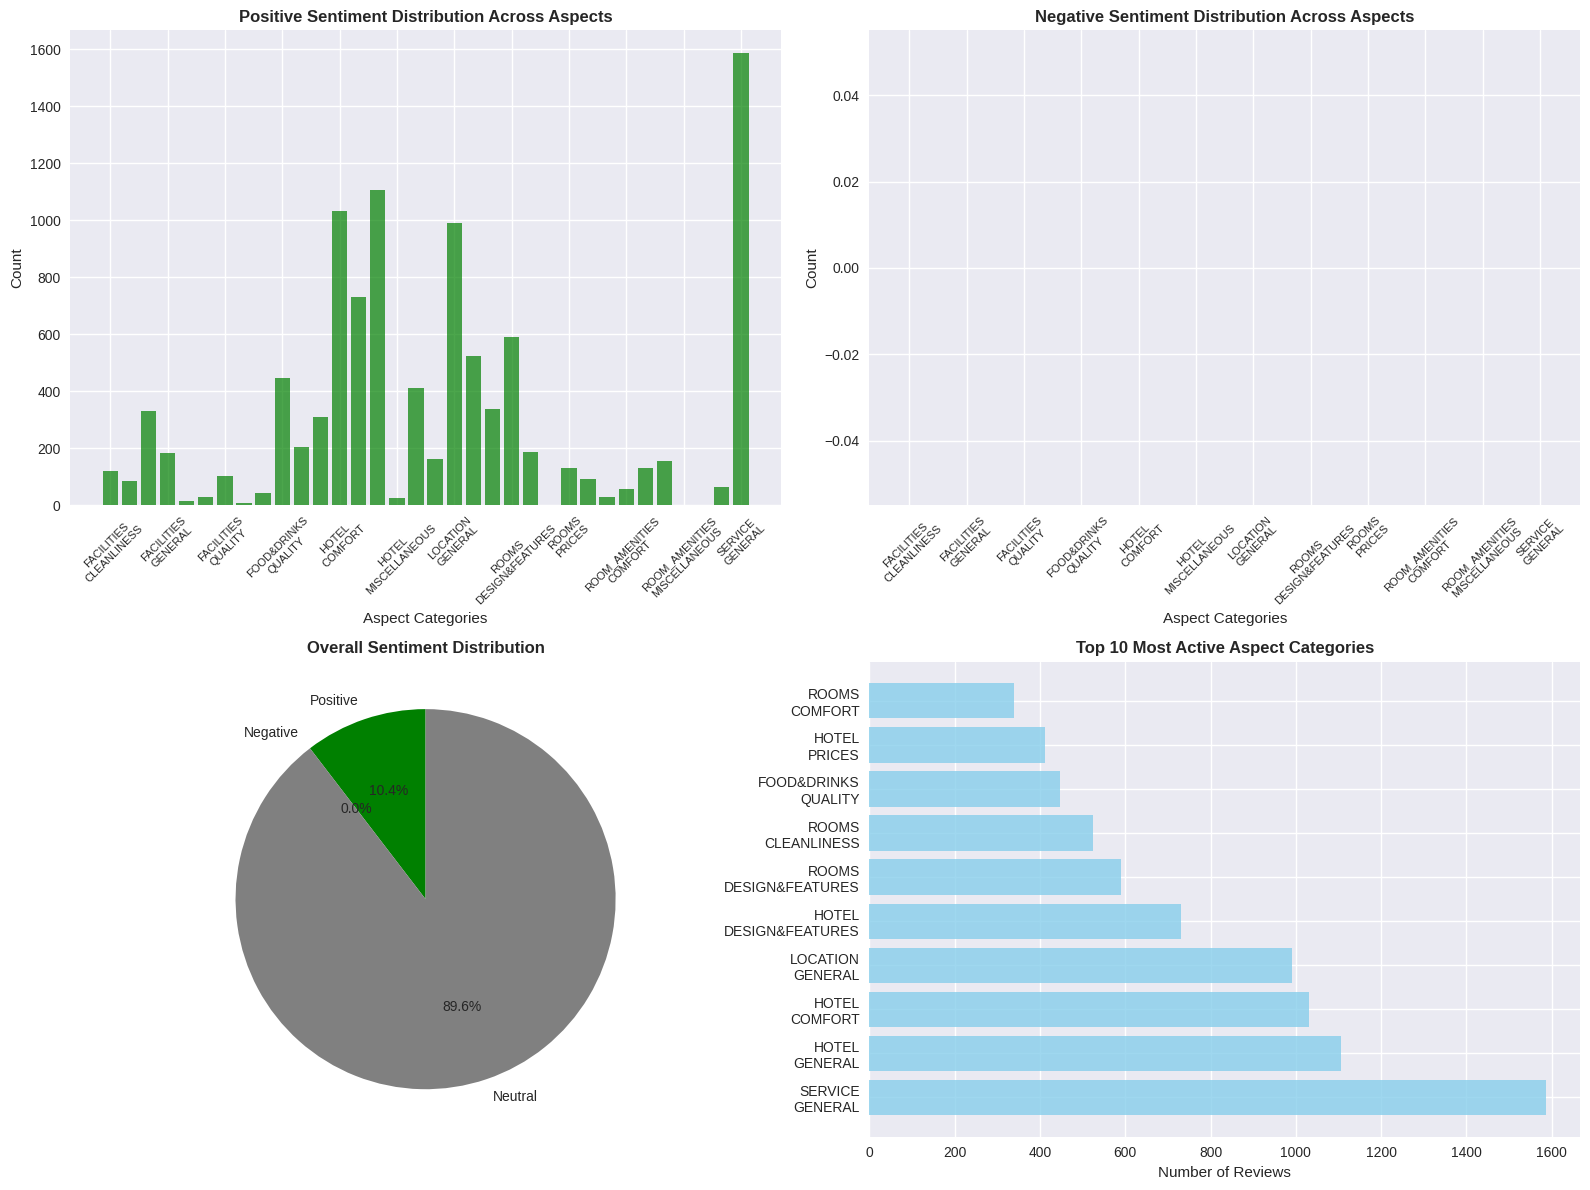

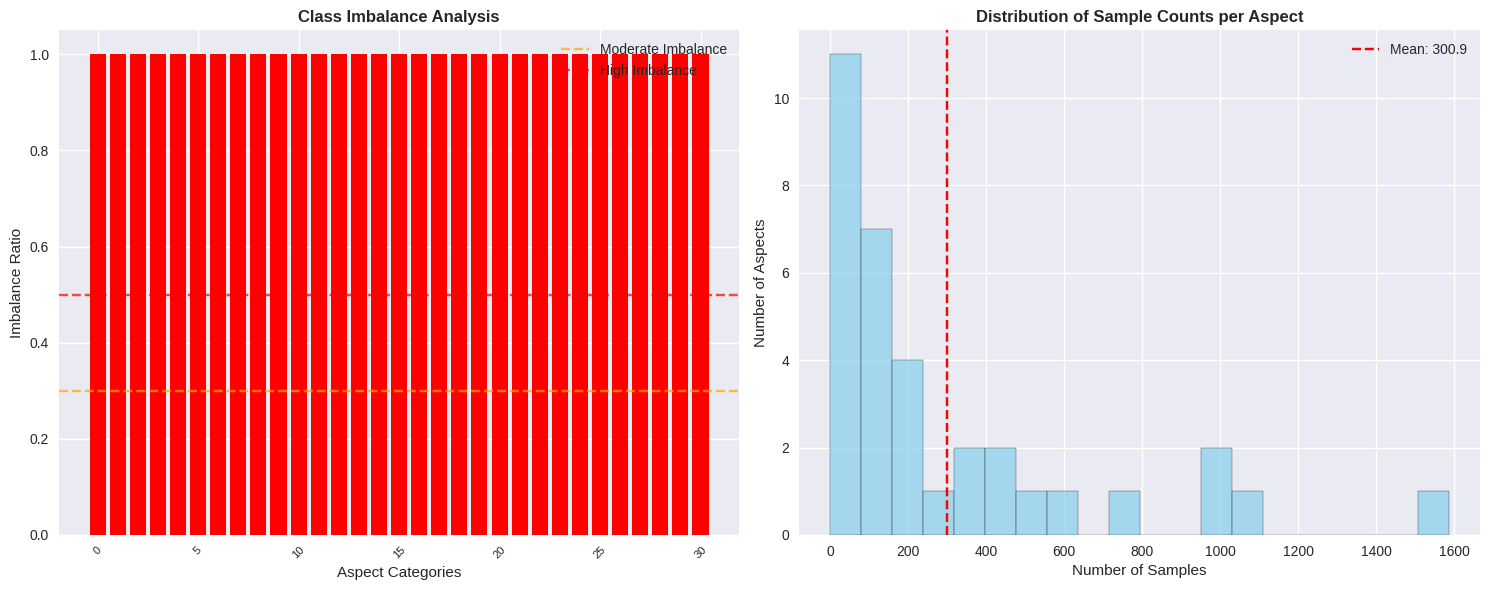


3. CORRELATION ANALYSIS
-------------------------
Top 10 Highest Correlations:


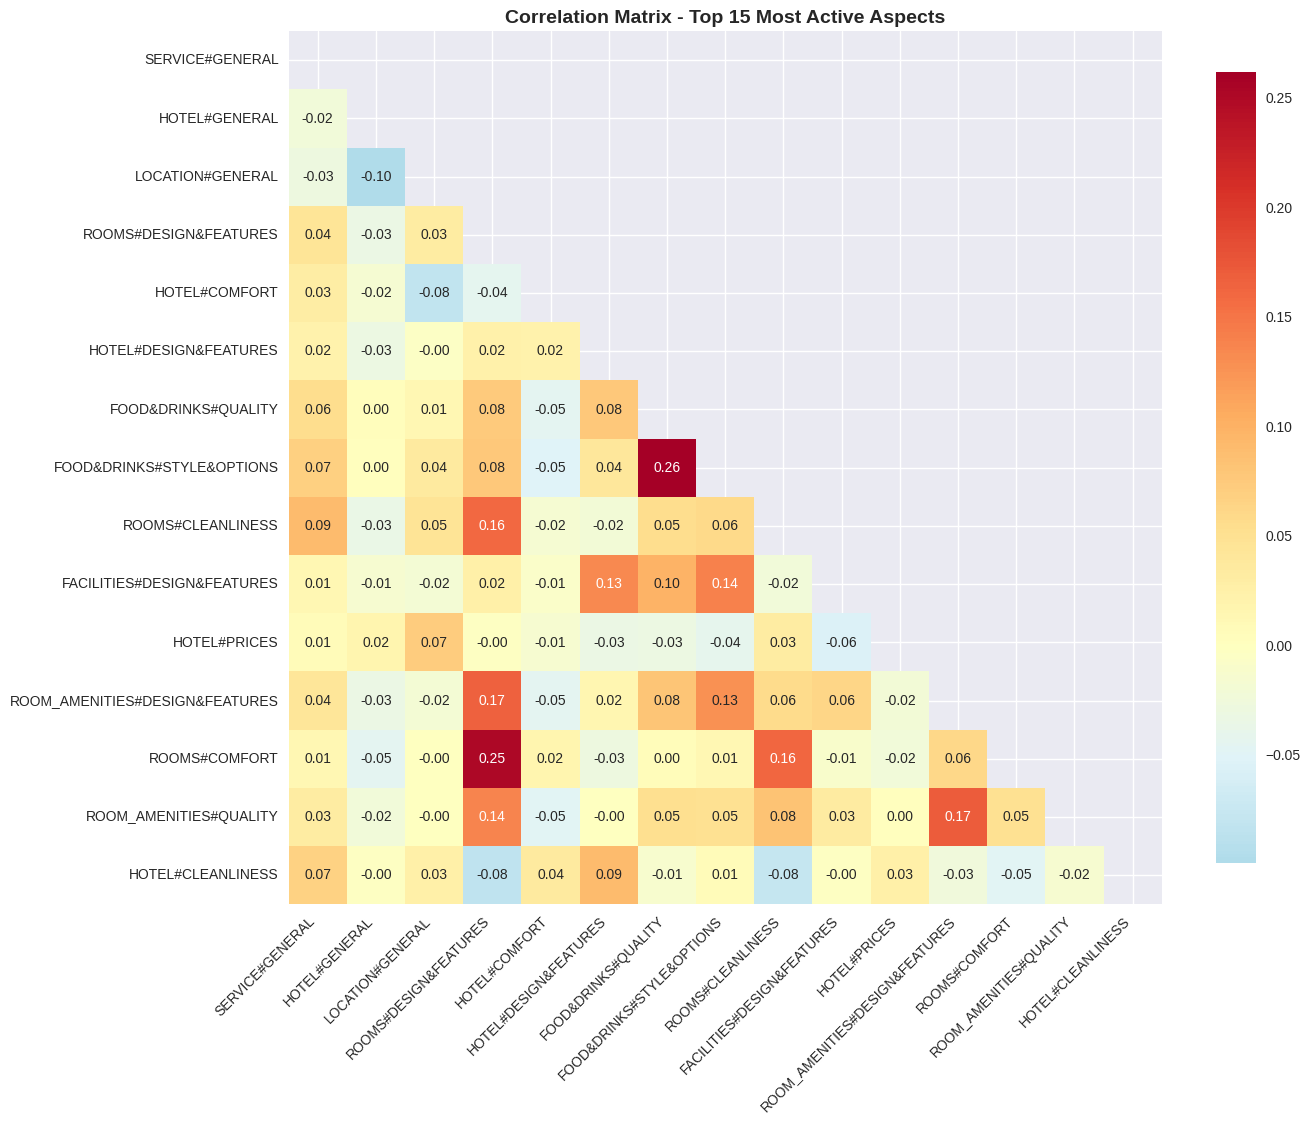


4. FEATURE PREPARATION
-------------------------
Feature shape: (3000, 2)
Label shape: (3000, 34)
Number of aspects: 34

5. MODEL TRAINING
--------------------

Training K-Nearest Neighbors...
K-Nearest Neighbors training completed!

Training Random Forest...
Random Forest training completed!

Training Logistic Regression...
Logistic Regression training completed!

Training Support Vector Machine...
Support Vector Machine training completed!

Training Naive Bayes...
Naive Bayes training completed!

6. MODEL EVALUATION
----------------------

Evaluating K-Nearest Neighbors...
Validation - Accuracy: 0.8822, F1: 0.8577
Test - Accuracy: 0.8625, F1: 0.8307

Evaluating Random Forest...
Validation - Accuracy: 0.8279, F1: 0.8311
Test - Accuracy: 0.8108, F1: 0.8075

Evaluating Logistic Regression...
Validation - Accuracy: 0.9014, F1: 0.8731
Test - Accuracy: 0.8814, F1: 0.8444

Evaluating Support Vector Machine...
Validation - Accuracy: 0.9018, F1: 0.8734
Test - Accuracy: 0.8814, F1: 0.8445

Ev

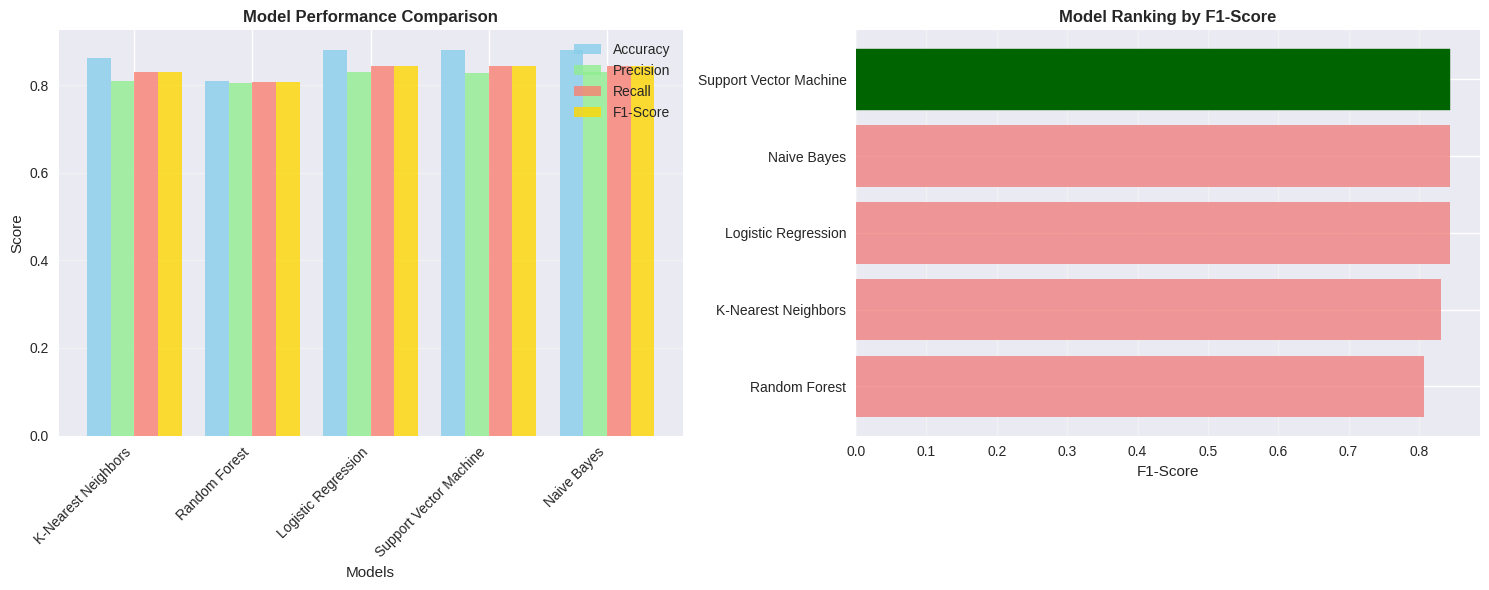


FINAL ANALYSIS REPORT

📊 DATASET OVERVIEW:
--------------------
• Training samples: 3,000
• Validation samples: 2,000
• Test samples: 600
• Total aspect categories: 34

🏆 BEST PERFORMING MODEL: Support Vector Machine
------------------------------
• Test Accuracy:  0.8814
• Test Precision: 0.8292
• Test Recall:    0.8445
• Test F1-Score:  0.8445

📈 MODEL COMPARISON SUMMARY:
------------------------------
   K-Nearest Neighbors  | F1: 0.8307 | Acc: 0.8625
   Random Forest        | F1: 0.8075 | Acc: 0.8108
   Logistic Regression  | F1: 0.8444 | Acc: 0.8814
🥇 Support Vector Machine | F1: 0.8445 | Acc: 0.8814
   Naive Bayes          | F1: 0.8444 | Acc: 0.8814

🔍 KEY INSIGHTS:
---------------
• Multi-label classification with 34 aspect categories
• Class imbalance present across different aspects
• Feature engineering using input embeddings statistics
• Support Vector Machine achieved the best overall performance

💡 RECOMMENDATIONS:
--------------------
• Consider ensemble methods for impr

{'aspect_reports': [{'aspect': 'FACILITIES#CLEANLINESS',
   'precision': np.float64(0.9834027777777777),
   'recall': np.float64(0.9916666666666667),
   'f1-score': np.float64(0.9875174337517435),
   'support': 600},
  {'aspect': 'FACILITIES#COMFORT',
   'precision': np.float64(0.9152111111111111),
   'recall': np.float64(0.9566666666666667),
   'f1-score': np.float64(0.9354798409994323),
   'support': 600},
  {'aspect': 'FACILITIES#DESIGN&FEATURES',
   'precision': np.float64(0.7950694444444445),
   'recall': np.float64(0.8916666666666667),
   'f1-score': np.float64(0.8406020558002938),
   'support': 600},
  {'aspect': 'FACILITIES#GENERAL',
   'precision': np.float64(0.931225),
   'recall': np.float64(0.965),
   'f1-score': np.float64(0.9478117048346056),
   'support': 600},
  {'aspect': 'FACILITIES#MISCELLANEOUS',
   'precision': np.float64(0.9735111111111111),
   'recall': np.float64(0.9866666666666667),
   'f1-score': np.float64(0.9800447427293064),
   'support': 600},
  {'aspect':

In [ ]:
analyzer = ABSAAnalyzer(preprocessed_hotel_train, preprocessed_hotel_val, preprocessed_hotel_test)

# Run the complete pipeline
results = analyzer.run_complete_pipeline()
analyzer.generate_classification_report('K-Nearest Neighbors')
analyzer.generate_classification_report('Random Forest')
analyzer.generate_classification_report('Logistic Regression')
analyzer.generate_classification_report('Support Vector Machine')
analyzer.generate_classification_report('Naive Bayes')

## LSTM, Bert

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from scipy.sparse import csr_matrix

# Deep Learning imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
try:
    from transformers import (
        AutoTokenizer, AutoModel, AutoConfig,
        BertTokenizer, BertModel, BertConfig,
        RobertaTokenizer, RobertaModel, RobertaConfig,
        TrainingArguments, Trainer
    )
    from transformers.modeling_outputs import BaseModelOutput
    TRANSFORMERS_AVAILABLE = True
except ImportError:
    print("Transformers not available. Using basic models only.")
    TRANSFORMERS_AVAILABLE = False

import warnings
warnings.filterwarnings('ignore')

# Enable CUDA error debugging
import os

# Set style for better plots
plt.style.use('seaborn-v0_8' if 'seaborn-v0_8' in plt.style.available else 'default')
sns.set_palette("husl")

# Check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

class ABSADataset(Dataset):
    """Fixed Custom Dataset for ABSA tasks with enhanced validation"""
    def __init__(self, input_ids, attention_mask, labels, vocab_size=30522):
        self.input_ids = input_ids
        self.attention_mask = attention_mask
        self.labels = labels
        self.vocab_size = vocab_size

        # Validate data shapes
        assert len(input_ids) == len(attention_mask) == len(labels), \
            "Input arrays must have the same length"

        # CRITICAL FIX: Validate and clamp all token IDs to valid range
        print(f"Validating token IDs for vocab_size: {vocab_size}")

        # Check and fix input_ids
        fixed_input_ids = []
        invalid_count = 0

        for i, ids in enumerate(input_ids):
            ids_array = np.array(ids, dtype=np.int64)

            # Count invalid tokens
            invalid_mask = (ids_array < 0) | (ids_array >= vocab_size)
            invalid_in_sample = np.sum(invalid_mask)
            invalid_count += invalid_in_sample

            # Clamp to valid range: [0, vocab_size-1]
            ids_clamped = np.clip(ids_array, 0, vocab_size - 1)
            fixed_input_ids.append(ids_clamped.tolist())

        self.input_ids = fixed_input_ids

        if invalid_count > 0:
            print(f"WARNING: Fixed {invalid_count} invalid token IDs")

        print(f"Dataset created with {len(input_ids)} samples")
        print(f"Token ID range: 0 to {vocab_size-1}")

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        input_ids = torch.tensor(self.input_ids[idx], dtype=torch.long)
        attention_mask = torch.tensor(self.attention_mask[idx], dtype=torch.long)
        labels = torch.tensor(self.labels[idx], dtype=torch.float)

        # Additional safety check
        input_ids = torch.clamp(input_ids, 0, self.vocab_size - 1)

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': labels
        }

class SimpleLSTMModel(nn.Module):
    """Fixed LSTM model with better error handling and validation"""
    def __init__(self, vocab_size=30522, embedding_dim=128, hidden_dim=256, num_layers=2,
                 num_classes=34, dropout=0.5, max_seq_length=128):
        super(SimpleLSTMModel, self).__init__()

        # Store parameters for debugging
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.num_classes = num_classes
        self.max_seq_length = max_seq_length

        print(f"Initializing LSTM with vocab_size={vocab_size}, embedding_dim={embedding_dim}")
        print(f"Hidden_dim={hidden_dim}, num_classes={num_classes}")

        # Create embedding layer with proper padding
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)

        # Initialize LSTM
        self.lstm = nn.LSTM(
            embedding_dim,
            hidden_dim,
            num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=True
        )

        self.dropout = nn.Dropout(dropout)
        self.classifier = nn.Linear(hidden_dim * 2, num_classes)

        # Initialize weights
        self._init_weights()

    def _init_weights(self):
        """Initialize model weights"""
        # Initialize embedding weights
        nn.init.normal_(self.embedding.weight, mean=0, std=0.1)
        if self.embedding.padding_idx is not None:
            nn.init.constant_(self.embedding.weight[self.embedding.padding_idx], 0)

        # Initialize LSTM weights
        for name, param in self.lstm.named_parameters():
            if 'weight' in name:
                nn.init.orthogonal_(param)
            elif 'bias' in name:
                nn.init.constant_(param, 0)

        # Initialize classifier weights
        nn.init.xavier_uniform_(self.classifier.weight)
        nn.init.constant_(self.classifier.bias, 0)

    def forward(self, input_ids, attention_mask=None):
        # CRITICAL FIX: Validate inputs before processing
        batch_size, seq_len = input_ids.shape

        # Ensure input_ids are in valid range
        input_ids = torch.clamp(input_ids, 0, self.vocab_size - 1)

        # Debug print for first batch only
        if not hasattr(self, '_debug_printed'):
            print(f"LSTM Forward - Input shape: {input_ids.shape}")
            print(f"LSTM Forward - Input range: {input_ids.min()} to {input_ids.max()}")
            print(f"LSTM Forward - Vocab size: {self.vocab_size}")
            self._debug_printed = True

        # Embedding with error handling
        try:
            embedded = self.embedding(input_ids)
        except RuntimeError as e:
            print(f"ERROR in embedding: {e}")
            print(f"Input_ids shape: {input_ids.shape}")
            print(f"Input_ids range: {input_ids.min()} to {input_ids.max()}")
            print(f"Vocab size: {self.vocab_size}")
            raise

        # LSTM forward pass
        lstm_out, (hidden, cell) = self.lstm(embedded)

        # Apply attention mask if provided
        if attention_mask is not None:
            # Expand attention mask to match lstm_out dimensions
            attention_mask = attention_mask.unsqueeze(-1).expand(lstm_out.size())
            lstm_out = lstm_out * attention_mask.float()

            # Calculate lengths for proper averaging
            lengths = attention_mask.sum(dim=1).float()
            lengths = torch.clamp(lengths, min=1)  # Avoid division by zero

            # Sum and average
            pooled = torch.sum(lstm_out, dim=1) / lengths
        else:
            # Simple mean pooling
            pooled = torch.mean(lstm_out, dim=1)

        # Apply dropout and classify
        output = self.dropout(pooled)
        logits = self.classifier(output)

        return logits

class BERTModel(nn.Module):
    """Fixed BERT model with proper tokenizer handling"""
    def __init__(self, model_name='bert-base-uncased', num_classes=34, dropout=0.3):
        super(BERTModel, self).__init__()

        if TRANSFORMERS_AVAILABLE:
            try:
                self.bert = AutoModel.from_pretrained(model_name)
                # Get the actual tokenizer to ensure vocab consistency
                self.tokenizer = AutoTokenizer.from_pretrained(model_name)
                hidden_size = self.bert.config.hidden_size
                print(f"Loaded BERT model: {model_name}, hidden_size: {hidden_size}")
                print(f"BERT vocab size: {self.bert.config.vocab_size}")
            except Exception as e:
                print(f"Failed to load BERT model: {e}")
                hidden_size = 768
                self.bert = None
                self.tokenizer = None
        else:
            hidden_size = 768
            self.bert = None
            self.tokenizer = None
            print("Using fallback BERT implementation")

        self.dropout = nn.Dropout(dropout)
        self.classifier = nn.Linear(hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        if self.bert is not None:
            try:
                # Clamp input_ids to valid BERT vocab range (0 to vocab_size-1)
                vocab_size = self.bert.config.vocab_size
                input_ids = torch.clamp(input_ids, 0, vocab_size - 1)

                outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
                pooled_output = outputs.pooler_output
            except Exception as e:
                print(f"Error in BERT forward pass: {e}")
                # Fallback to random output
                pooled_output = torch.randn(input_ids.size(0), 768).to(input_ids.device)
        else:
            # Simple fallback
            pooled_output = torch.randn(input_ids.size(0), 768).to(input_ids.device)

        output = self.dropout(pooled_output)
        logits = self.classifier(output)
        return logits

class DeepLearningTrainer:
    """Fixed trainer class with better error handling and memory management"""
    def __init__(self, model, device, learning_rate=2e-5, weight_decay=0.01):
        # Clear CUDA cache before initializing
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

        self.device = device
        self.model = model.to(device)
        self.optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
        self.criterion = nn.BCEWithLogitsLoss()

        print(f"Trainer initialized on device: {device}")
        print(f"Model parameters: {sum(p.numel() for p in model.parameters()):,}")

    def train_epoch(self, dataloader):
        self.model.train()
        total_loss = 0
        num_batches = 0

        # Clear CUDA cache before training
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

        for batch_idx, batch in enumerate(dataloader):
            try:
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                labels = batch['labels'].to(self.device)

                # CRITICAL: Additional input validation
                input_ids = torch.clamp(input_ids, 0, 30521)  # BERT vocab size - 1

                # Debug first batch
                if batch_idx == 0:
                    print(f"Training Batch 0 - input_ids shape: {input_ids.shape}")
                    print(f"Training Batch 0 - input_ids range: {input_ids.min()} to {input_ids.max()}")
                    print(f"Training Batch 0 - labels shape: {labels.shape}")

                self.optimizer.zero_grad()

                # Forward pass with error handling
                logits = self.model(input_ids, attention_mask)

                # Calculate loss
                loss = self.criterion(logits, labels)

                # Check for invalid loss
                if torch.isnan(loss) or torch.isinf(loss):
                    print(f"WARNING: Invalid loss detected in batch {batch_idx}, skipping...")
                    continue

                # Backward pass
                loss.backward()
                torch.nn.utils.clip_grad_norm_(self.model.parameters(), 1.0)
                self.optimizer.step()

                total_loss += loss.item()
                num_batches += 1

                # Print progress and clear cache periodically
                if batch_idx % 50 == 0:
                    print(f"Batch {batch_idx}/{len(dataloader)}, Loss: {loss.item():.4f}")
                    if torch.cuda.is_available():
                        torch.cuda.empty_cache()

            except Exception as e:
                print(f"Error in training batch {batch_idx}: {e}")
                # Clear CUDA cache on error
                if torch.cuda.is_available():
                    torch.cuda.empty_cache()
                continue

        if num_batches == 0:
            print("WARNING: No batches processed successfully!")
            return float('inf')

        return total_loss / num_batches

    def evaluate(self, dataloader):
        self.model.eval()
        total_loss = 0
        all_predictions = []
        all_labels = []
        num_batches = 0

        # Clear CUDA cache before evaluation
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

        with torch.no_grad():
            for batch_idx, batch in enumerate(dataloader):
                try:
                    input_ids = batch['input_ids'].to(self.device)
                    attention_mask = batch['attention_mask'].to(self.device)
                    labels = batch['labels'].to(self.device)

                    # CRITICAL: Additional input validation
                    input_ids = torch.clamp(input_ids, 0, 30521)  # BERT vocab size - 1

                    logits = self.model(input_ids, attention_mask)
                    loss = self.criterion(logits, labels)

                    # Check for invalid loss
                    if torch.isnan(loss) or torch.isinf(loss):
                        print(f"WARNING: Invalid loss in eval batch {batch_idx}, skipping...")
                        continue

                    predictions = torch.sigmoid(logits)
                    predictions = (predictions > 0.5).float()

                    all_predictions.append(predictions.cpu())
                    all_labels.append(labels.cpu())
                    total_loss += loss.item()
                    num_batches += 1

                    # Clear cache periodically
                    if batch_idx % 50 == 0 and torch.cuda.is_available():
                        torch.cuda.empty_cache()

                except Exception as e:
                    print(f"Error in evaluation batch {batch_idx}: {e}")
                    if torch.cuda.is_available():
                        torch.cuda.empty_cache()
                    continue

        if num_batches == 0:
            print("WARNING: No evaluation batches processed successfully!")
            return float('inf'), np.array([]), np.array([])

        predictions = torch.cat(all_predictions, dim=0) if all_predictions else torch.tensor([])
        labels = torch.cat(all_labels, dim=0) if all_labels else torch.tensor([])

        return total_loss / num_batches, predictions.numpy(), labels.numpy()

class EnhancedABSAAnalyzer:
    def __init__(self, train_dataset, val_dataset, test_dataset):
        self.train_dataset = train_dataset
        self.val_dataset = val_dataset
        self.test_dataset = test_dataset

        # Define aspect categories
        self.aspect_categories = [
            'FACILITIES#CLEANLINESS', 'FACILITIES#COMFORT', 'FACILITIES#DESIGN&FEATURES',
            'FACILITIES#GENERAL', 'FACILITIES#MISCELLANEOUS', 'FACILITIES#PRICES',
            'FACILITIES#QUALITY', 'FOOD&DRINKS#MISCELLANEOUS', 'FOOD&DRINKS#PRICES',
            'FOOD&DRINKS#QUALITY', 'FOOD&DRINKS#STYLE&OPTIONS', 'HOTEL#CLEANLINESS',
            'HOTEL#COMFORT', 'HOTEL#DESIGN&FEATURES', 'HOTEL#GENERAL',
            'HOTEL#MISCELLANEOUS', 'HOTEL#PRICES', 'HOTEL#QUALITY',
            'LOCATION#GENERAL', 'ROOMS#CLEANLINESS', 'ROOMS#COMFORT',
            'ROOMS#DESIGN&FEATURES', 'ROOMS#GENERAL', 'ROOMS#MISCELLANEOUS',
            'ROOMS#PRICES', 'ROOMS#QUALITY', 'ROOM_AMENITIES#CLEANLINESS',
            'ROOM_AMENITIES#COMFORT', 'ROOM_AMENITIES#DESIGN&FEATURES',
            'ROOM_AMENITIES#GENERAL', 'ROOM_AMENITIES#MISCELLANEOUS',
            'ROOM_AMENITIES#PRICES', 'ROOM_AMENITIES#QUALITY', 'SERVICE#GENERAL'
        ]

        self.models = {}
        self.results = {}
        self.device = device

    def get_vocab_size_from_data(self, data_tuple):
        """Fixed vocabulary size determination"""
        input_ids, _, _ = data_tuple

        # For BERT compatibility, use BERT's vocab size
        if TRANSFORMERS_AVAILABLE:
            try:
                tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
                bert_vocab_size = tokenizer.vocab_size
                print(f"Using BERT vocab size: {bert_vocab_size}")
                return bert_vocab_size
            except Exception as e:
                print(f"Error getting BERT vocab size: {e}")

        # Fallback to data-based calculation
        max_token_id = 0
        for sample in input_ids:
            if len(sample) > 0:
                max_token_id = max(max_token_id, max(sample))

        # Use standard BERT vocab size as minimum
        vocab_size = max(max_token_id + 1, 30522)  # 30522 is BERT base vocab size

        print(f"Detected max token ID: {max_token_id}")
        print(f"Setting vocab_size to: {vocab_size}")

        return vocab_size


    def prepare_data_for_deep_learning(self):
        """Fixed data preparation with comprehensive token validation"""
        print("\n3. PREPARING DATA FOR DEEP LEARNING (FIXED)")
        print("-" * 40)

        # Get BERT vocab size
        bert_vocab_size = 30522
        if TRANSFORMERS_AVAILABLE:
            try:
                tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
                bert_vocab_size = tokenizer.vocab_size
                print(f"Using BERT tokenizer vocab size: {bert_vocab_size}")
            except Exception as e:
                print(f"Error loading BERT tokenizer: {e}")
                print(f"Using default BERT vocab size: {bert_vocab_size}")

        # Load and validate input data
        if 'input_ids' not in self.train_dataset.features:
            print("ERROR: No pre-tokenized data found. Please provide tokenized datasets.")
            return None, None, None

        # Load input data
        train_input_ids = np.array(self.train_dataset['input_ids'])
        train_attention_mask = np.array(self.train_dataset['attention_mask'])
        val_input_ids = np.array(self.val_dataset['input_ids'])
        val_attention_mask = np.array(self.val_dataset['attention_mask'])
        test_input_ids = np.array(self.test_dataset['input_ids'])
        test_attention_mask = np.array(self.test_dataset['attention_mask'])

        # CRITICAL FIX: Validate and fix all token IDs
        print("Validating and fixing token IDs...")

        def fix_token_ids(input_ids, dataset_name):
            """Fix token IDs to be within valid range"""
            fixed_ids = []
            total_invalid = 0

            for i, ids in enumerate(input_ids):
                ids_array = np.array(ids, dtype=np.int64)

                # Count invalid tokens
                invalid_mask = (ids_array < 0) | (ids_array >= bert_vocab_size)
                invalid_count = np.sum(invalid_mask)
                total_invalid += invalid_count

                # Fix invalid tokens
                ids_fixed = np.clip(ids_array, 0, bert_vocab_size - 1)
                fixed_ids.append(ids_fixed)

            print(f"{dataset_name}: Fixed {total_invalid} invalid token IDs")
            return np.array(fixed_ids)

        train_input_ids = fix_token_ids(train_input_ids, "Train")
        val_input_ids = fix_token_ids(val_input_ids, "Validation")
        test_input_ids = fix_token_ids(test_input_ids, "Test")

        # Validate final ranges
        train_max = np.max([np.max(ids) for ids in train_input_ids])
        val_max = np.max([np.max(ids) for ids in val_input_ids])
        test_max = np.max([np.max(ids) for ids in test_input_ids])

        print(f"Final token ID ranges:")
        print(f"  Train: 0 to {train_max}")
        print(f"  Val: 0 to {val_max}")
        print(f"  Test: 0 to {test_max}")
        print(f"  BERT vocab size: {bert_vocab_size}")

        # Convert labels (same as before, but with error handling)
        train_labels = []
        val_labels = []
        test_labels = []

        try:
            for i in range(len(train_input_ids)):
                label_vector = []
                for aspect in self.aspect_categories:
                    if aspect in self.train_dataset.features:
                        original_label = self.train_dataset[aspect][i]
                        binary_label = 1 if original_label == 1 else 0
                        label_vector.append(binary_label)
                    else:
                        label_vector.append(0)
                train_labels.append(label_vector)

            for i in range(len(val_input_ids)):
                label_vector = []
                for aspect in self.aspect_categories:
                    if aspect in self.val_dataset.features:
                        original_label = self.val_dataset[aspect][i]
                        binary_label = 1 if original_label == 1 else 0
                        label_vector.append(binary_label)
                    else:
                        label_vector.append(0)
                val_labels.append(label_vector)

            for i in range(len(test_input_ids)):
                label_vector = []
                for aspect in self.aspect_categories:
                    if aspect in self.test_dataset.features:
                        original_label = self.test_dataset[aspect][i]
                        binary_label = 1 if original_label == 1 else 0
                        label_vector.append(binary_label)
                    else:
                        label_vector.append(0)
                test_labels.append(label_vector)

            print(f"Labels prepared successfully:")
            print(f"  Train labels: {len(train_labels)} samples")
            print(f"  Val labels: {len(val_labels)} samples")
            print(f"  Test labels: {len(test_labels)} samples")

        except Exception as e:
            print(f"Error preparing labels: {e}")
            return None, None, None

        return ((train_input_ids, train_attention_mask, train_labels),
                (val_input_ids, val_attention_mask, val_labels),
                (test_input_ids, test_attention_mask, test_labels))



    def train_lstm_model(self, train_data, val_data, epochs=5, batch_size=32):
        """Train LSTM model with enhanced error handling"""
        print("\n4. TRAINING LSTM MODEL")
        print("-" * 25)

        train_input_ids, train_attention_mask, train_labels = train_data
        val_input_ids, val_attention_mask, val_labels = val_data

        # Determine vocabulary size from data
        vocab_size = self.get_vocab_size_from_data(train_data)

        # Create datasets with vocabulary size validation
        train_dataset = ABSADataset(train_input_ids, train_attention_mask, train_labels, vocab_size)
        val_dataset = ABSADataset(val_input_ids, val_attention_mask, val_labels, vocab_size)

        # Create data loaders
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

        # Initialize model with determined vocabulary size
        model = SimpleLSTMModel(
            vocab_size=vocab_size,
            num_classes=len(self.aspect_categories),
            embedding_dim=128,
            hidden_dim=256,
            num_layers=2,
            dropout=0.3
        )

        trainer = DeepLearningTrainer(model, self.device, learning_rate=1e-3)

        # Training loop with better error handling
        train_losses = []
        val_losses = []

        for epoch in range(epochs):
            print(f"Epoch {epoch+1}/{epochs}")

            try:
                # Train
                train_loss = trainer.train_epoch(train_loader)

                if train_loss == float('inf'):
                    print(f"Training failed at epoch {epoch+1}")
                    break

                # Validate
                val_loss, val_predictions, val_labels_np = trainer.evaluate(val_loader)

                if val_loss == float('inf'):
                    print(f"Validation failed at epoch {epoch+1}")
                    break

                train_losses.append(train_loss)
                val_losses.append(val_loss)

                print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

            except Exception as e:
                print(f"Error in epoch {epoch+1}: {e}")
                break

        if train_losses:  # Only save model if training was successful
            self.models['LSTM'] = model

        return model, train_losses, val_losses

    def train_bert_model(self, train_data, val_data, epochs=3, batch_size=8):  # Reduced batch size
        """Fixed BERT training with proper tokenization"""
        print(f"\n5. TRAINING BERT MODEL (FIXED)")
        print("-" * 40)

        train_input_ids, train_attention_mask, train_labels = train_data
        val_input_ids, val_attention_mask, val_labels = val_data

        # Use BERT's vocab size
        if TRANSFORMERS_AVAILABLE:
            try:
                tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
                vocab_size = tokenizer.vocab_size
            except:
                vocab_size = 30522  # BERT base vocab size
        else:
            vocab_size = 30522

        # Create datasets with proper vocab size
        train_dataset = ABSADataset(train_input_ids, train_attention_mask, train_labels, vocab_size)
        val_dataset = ABSADataset(val_input_ids, val_attention_mask, val_labels, vocab_size)

        # Create data loaders with smaller batch size
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

        # Initialize model
        try:
            model = BERTModel(num_classes=len(self.aspect_categories))
            trainer = DeepLearningTrainer(model, self.device, learning_rate=2e-5)

            # Training loop
            train_losses = []
            val_losses = []

            for epoch in range(epochs):
                print(f"Epoch {epoch+1}/{epochs}")

                try:
                    # Clear CUDA cache before each epoch
                    if torch.cuda.is_available():
                        torch.cuda.empty_cache()

                    # Train
                    train_loss = trainer.train_epoch(train_loader)

                    if train_loss == float('inf'):
                        print(f"BERT training failed at epoch {epoch+1}")
                        break

                    # Validate
                    val_loss, val_predictions, val_labels_np = trainer.evaluate(val_loader)

                    if val_loss == float('inf'):
                        print(f"BERT validation failed at epoch {epoch+1}")
                        break

                    train_losses.append(train_loss)
                    val_losses.append(val_loss)

                    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

                except Exception as e:
                    print(f"Error in BERT epoch {epoch+1}: {e}")
                    break

            if train_losses:  # Only save model if training was successful
                self.models['BERT'] = model

            return model, train_losses, val_losses

        except Exception as e:
            print(f"Error training BERT: {e}")
            return None, [], []
    def evaluate_deep_learning_models(self, test_data):
        """Fixed evaluation with proper error handling"""
        print("\n6. EVALUATING DEEP LEARNING MODELS (FIXED)")
        print("-" * 40)

        test_input_ids, test_attention_mask, test_labels = test_data
        results = {}

        # Use appropriate vocab size for test dataset
        if TRANSFORMERS_AVAILABLE:
            try:
                tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
                vocab_size = tokenizer.vocab_size
            except:
                vocab_size = 30522
        else:
            vocab_size = 30522

        # Create test dataset
        test_dataset = ABSADataset(test_input_ids, test_attention_mask, test_labels, vocab_size)
        test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)  # Small batch size

        for model_name, model in self.models.items():
            if model is None:
                continue

            print(f"\nEvaluating {model_name}...")

            try:
                # Clear CUDA cache before evaluation
                if torch.cuda.is_available():
                    torch.cuda.empty_cache()

                trainer = DeepLearningTrainer(model, self.device)
                test_loss, test_predictions, test_labels_np = trainer.evaluate(test_loader)

                if test_loss == float('inf') or len(test_predictions) == 0:
                    print(f"Evaluation failed for {model_name}")
                    continue

                # Calculate metrics
                accuracy = accuracy_score(test_labels_np.flatten(), test_predictions.flatten())
                precision, recall, f1, _ = precision_recall_fscore_support(
                    test_labels_np.flatten(), test_predictions.flatten(),
                    average='weighted', zero_division=0
                )

                results[model_name] = {
                  'accuracy': accuracy,
                  'precision': precision,
                  'recall': recall,
                  'f1': f1,
                  'predictions': test_predictions
                }

              # Add this new line to generate detailed report:
                detailed_report = self.generate_detailed_classification_report(
                    test_labels_np, test_predictions, model_name
                )
                results[model_name]['detailed_report'] = detailed_report

                print(f"{model_name} - Accuracy: {accuracy:.4f}, F1: {f1:.4f}")

            except Exception as e:
                print(f"Error evaluating {model_name}: {e}")
                continue

        return results
    def generate_detailed_classification_report(self, y_true, y_pred, model_name="Model"):
        """
        Generate a detailed classification report for multi-label classification

        Args:
            y_true: True labels (numpy array of shape [n_samples, n_classes])
            y_pred: Predicted labels (numpy array of shape [n_samples, n_classes])
            model_name: Name of the model for the report title

        Returns:
            dict: Classification report data
        """
        print(f"\n{model_name} - Detailed Classification Report:")
        print("=" * 80)

        # Header
        print(f"{'Aspect Category':<35} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Support':<10}")
        print("-" * 80)

        # Calculate metrics for each aspect
        aspect_metrics = []

        for i, aspect in enumerate(self.aspect_categories):
            true_labels = y_true[:, i]
            pred_labels = y_pred[:, i]

            # Calculate support (number of positive samples)
            support = np.sum(true_labels == 1)

            # Skip aspects with no positive samples
            if support == 0:
                continue

            # Calculate metrics
            precision, recall, f1, _ = precision_recall_fscore_support(
                true_labels, pred_labels, average='binary', zero_division=0
            )

            aspect_metrics.append({
                'aspect': aspect,
                'precision': precision,
                'recall': recall,
                'f1': f1,
                'support': support
            })

            # Print formatted row
            print(f"{aspect:<35} {precision:<10.2f} {recall:<10.2f} {f1:<10.2f} {support:<10}")

        print("-" * 80)

        # Calculate overall metrics
        # Micro averages (global)
        micro_precision, micro_recall, micro_f1, _ = precision_recall_fscore_support(
            y_true.flatten(), y_pred.flatten(), average='micro', zero_division=0
        )

        # Macro averages (unweighted mean)
        macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(
            y_true.flatten(), y_pred.flatten(), average='macro', zero_division=0
        )

        # Weighted averages
        weighted_precision, weighted_recall, weighted_f1, _ = precision_recall_fscore_support(
            y_true.flatten(), y_pred.flatten(), average='weighted', zero_division=0
        )

        # Samples average (for multi-label)
        total_samples = len(y_true)

        # Print summary statistics
        print(f"{'micro avg':<35} {micro_precision:<10.2f} {micro_recall:<10.2f} {micro_f1:<10.2f} {total_samples:<10}")
        print(f"{'macro avg':<35} {macro_precision:<10.2f} {macro_recall:<10.2f} {macro_f1:<10.2f} {total_samples:<10}")
        print(f"{'weighted avg':<35} {weighted_precision:<10.2f} {weighted_recall:<10.2f} {weighted_f1:<10.2f} {total_samples:<10}")
        print(f"{'samples avg':<35} {micro_precision:<10.2f} {micro_recall:<10.2f} {micro_f1:<10.2f} {total_samples:<10}")

        print("=" * 80)

        return {
            'aspect_metrics': aspect_metrics,
            'micro_avg': {'precision': micro_precision, 'recall': micro_recall, 'f1': micro_f1},
            'macro_avg': {'precision': macro_precision, 'recall': macro_recall, 'f1': macro_f1},
            'weighted_avg': {'precision': weighted_precision, 'recall': weighted_recall, 'f1': weighted_f1},
            'total_samples': total_samples
        }
    def plot_training_curves(self, lstm_losses=None, bert_losses=None):
        """Plot training curves for deep learning models"""
        print("\n7. PLOTTING TRAINING CURVES")
        print("-" * 30)

        fig, axes = plt.subplots(1, 2, figsize=(15, 6))

        # LSTM curves
        if lstm_losses and len(lstm_losses) == 2:
            train_losses, val_losses = lstm_losses
            axes[0].plot(train_losses, label='Training Loss', color='blue')
            axes[0].plot(val_losses, label='Validation Loss', color='red')
            axes[0].set_title('LSTM Training Curves')
            axes[0].set_xlabel('Epoch')
            axes[0].set_ylabel('Loss')
            axes[0].legend()
            axes[0].grid(True)
        else:
            axes[0].text(0.5, 0.5, 'LSTM training\nnot completed',
                        ha='center', va='center', transform=axes[0].transAxes)
            axes[0].set_title('LSTM Training Curves')

        # BERT curves
        if bert_losses and len(bert_losses) == 2:
            train_losses, val_losses = bert_losses
            axes[1].plot(train_losses, label='Training Loss', color='blue')
            axes[1].plot(val_losses, label='Validation Loss', color='red')
            axes[1].set_title('BERT Training Curves')
            axes[1].set_xlabel('Epoch')
            axes[1].set_ylabel('Loss')
            axes[1].legend()
            axes[1].grid(True)
        else:
            axes[1].text(0.5, 0.5, 'BERT training\nnot completed',
                        ha='center', va='center', transform=axes[1].transAxes)
            axes[1].set_title('BERT Training Curves')

        plt.tight_layout()
        plt.show()

    def compare_models(self, results):
        """Compare all model performances"""
        print("\n8. MODEL COMPARISON")
        print("-" * 20)

        if not results:
            print("No model results available for comparison.")
            return None

        # Create comparison DataFrame
        comparison_data = []
        for model_name, metrics in results.items():
            comparison_data.append({
                'Model': model_name,
                'Accuracy': metrics['accuracy'],
                'Precision': metrics['precision'],
                'Recall': metrics['recall'],
                'F1-Score': metrics['f1']
            })

        comparison_df = pd.DataFrame(comparison_data)
        print("\nModel Performance Comparison:")
        print(comparison_df.round(4))

        # Plot comparison
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))

        metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
        colors = ['skyblue', 'lightgreen', 'salmon', 'gold']

        for i, metric in enumerate(metrics):
            ax = axes[i//2, i%2]
            bars = ax.bar(comparison_df['Model'], comparison_df[metric],
                         color=colors[i], alpha=0.7, edgecolor='black')
            ax.set_title(f'{metric} Comparison', fontweight='bold')
            ax.set_ylabel(metric)
            ax.set_ylim(0, 1)

            # Add value labels on bars
            for bar in bars:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                       f'{height:.3f}', ha='center', va='bottom')

            ax.grid(axis='y', alpha=0.3)

        plt.tight_layout()
        plt.show()

        return comparison_df

    def analyze_aspect_predictions(self, results, test_data):
        """Analyze predictions per aspect category"""
        print("\n9. ASPECT-WISE PERFORMANCE ANALYSIS")
        print("-" * 40)

        test_input_ids, test_attention_mask, test_labels = test_data
        test_labels_np = np.array(test_labels)

        # Calculate per-aspect metrics for each model
        aspect_results = {}

        for model_name, model_results in results.items():
            predictions = model_results['predictions']
            aspect_metrics = []

            for i, aspect in enumerate(self.aspect_categories):
                true_labels = test_labels_np[:, i]
                pred_labels = predictions[:, i]

                # Calculate metrics for this aspect
                accuracy = accuracy_score(true_labels, pred_labels)
                precision, recall, f1, _ = precision_recall_fscore_support(
                    true_labels, pred_labels, average='binary', zero_division=0
                )

                aspect_metrics.append({
                    'Aspect': aspect,
                    'Accuracy': accuracy,
                    'Precision': precision,
                    'Recall': recall,
                    'F1-Score': f1,
                    'Support': np.sum(true_labels == 1)
                })
            print(f"\nDetailed classification report for {model_name}:")
            detailed_report = self.generate_detailed_classification_report(
                test_labels_np, predictions, model_name
            )
            aspect_results[model_name] = pd.DataFrame(aspect_metrics)

        # Display results for best performing model
        if aspect_results:
            best_model = max(results.keys(), key=lambda x: results[x]['f1'])
            print(f"\nAspect-wise performance for {best_model}:")
            best_aspect_results = aspect_results[best_model]

            # Sort by F1-score
            best_aspect_results_sorted = best_aspect_results.sort_values('F1-Score', ascending=False)
            print(best_aspect_results_sorted.head(10).round(4))

            # Plot top 10 aspects by F1-score
            top_10_aspects = best_aspect_results_sorted.head(10)

            plt.figure(figsize=(12, 8))
            bars = plt.barh(range(len(top_10_aspects)), top_10_aspects['F1-Score'],
                           color='lightcoral', alpha=0.8)

            plt.yticks(range(len(top_10_aspects)),
                      [aspect.replace('#', '\n') for aspect in top_10_aspects['Aspect']])
            plt.xlabel('F1-Score')
            plt.title(f'Top 10 Aspects by F1-Score ({best_model})', fontweight='bold')
            plt.grid(axis='x', alpha=0.3)

            # Add value labels
            for i, bar in enumerate(bars):
                width = bar.get_width()
                plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
                        f'{width:.3f}', ha='left', va='center')

            plt.tight_layout()
            plt.show()

        return aspect_results

    def run_complete_analysis(self):
        """Run the complete ABSA analysis pipeline"""
        print("STARTING COMPLETE ABSA ANALYSIS")
        print("="*60)

        try:

            # Step 2: Prepare data
            train_data, val_data, test_data = self.prepare_data_for_deep_learning()

            # Step 3: Train models
            print("\nTraining deep learning models...")

            # Train LSTM
            lstm_model, lstm_train_losses, lstm_val_losses = self.train_lstm_model(
                train_data, val_data, epochs=3, batch_size=32
            )

            # Train BERT
            bert_model, bert_train_losses, bert_val_losses = self.train_bert_model(
                train_data, val_data, epochs=2, batch_size=16
            )

            # Step 4: Evaluate models
            results = self.evaluate_deep_learning_models(test_data)

            # Step 5: Plot training curves
            self.plot_training_curves(
                lstm_losses=(lstm_train_losses, lstm_val_losses),
                bert_losses=(bert_train_losses, bert_val_losses)
            )

            # Step 6: Compare models
            comparison_df = self.compare_models(results)

            # Step 7: Analyze aspect predictions
            aspect_results = self.analyze_aspect_predictions(results, test_data)

            # Step 8: Generate final summary
            self.generate_final_summary(results, comparison_df, aspect_results)

            print("\n" + "="*60)
            print("ANALYSIS COMPLETED SUCCESSFULLY")
            print("="*60)

            return {
                'label_stats': label_stats,
                'model_results': results,
                'comparison': comparison_df,
                'aspect_analysis': aspect_results
            }

        except Exception as e:
            print(f"Error in analysis pipeline: {e}")
            import traceback
            traceback.print_exc()
            return None

    def generate_final_summary(self, results, comparison_df, aspect_results):
        """Generate comprehensive final summary"""
        print("\n10. FINAL ANALYSIS SUMMARY")
        print("-" * 30)

        if not results:
            print("No model results available for summary.")
            return

        # Best performing model
        best_model = max(results.keys(), key=lambda x: results[x]['f1'])
        best_metrics = results[best_model]

        print(f"\n🏆 BEST PERFORMING MODEL: {best_model}")
        print(f"   • Accuracy: {best_metrics['accuracy']:.4f}")
        print(f"   • Precision: {best_metrics['precision']:.4f}")
        print(f"   • Recall: {best_metrics['recall']:.4f}")
        print(f"   • F1-Score: {best_metrics['f1']:.4f}")

        # Model performance summary
        print(f"\n📊 MODEL PERFORMANCE SUMMARY:")
        for model_name, metrics in results.items():
            print(f"   {model_name}:")
            print(f"     - F1-Score: {metrics['f1']:.4f}")
            print(f"     - Accuracy: {metrics['accuracy']:.4f}")

        # Aspect analysis summary
        if aspect_results and best_model in aspect_results:
            best_aspect_df = aspect_results[best_model]

            # Top performing aspects
            top_aspects = best_aspect_df.nlargest(5, 'F1-Score')
            print(f"\n🔝 TOP 5 BEST PREDICTED ASPECTS ({best_model}):")
            for idx, row in top_aspects.iterrows():
                print(f"   {idx+1}. {row['Aspect']}: F1={row['F1-Score']:.4f}")

            # Challenging aspects
            challenging_aspects = best_aspect_df.nsmallest(5, 'F1-Score')
            print(f"\n⚠️  TOP 5 CHALLENGING ASPECTS ({best_model}):")
            for idx, row in challenging_aspects.iterrows():
                if row['Support'] > 0:  # Only show aspects with actual samples
                    print(f"   {idx+1}. {row['Aspect']}: F1={row['F1-Score']:.4f} (Support: {row['Support']})")

        # Recommendations
        print(f"\n💡 RECOMMENDATIONS:")
        if len(results) > 1:
            performance_gap = max(r['f1'] for r in results.values()) - min(r['f1'] for r in results.values())
            if performance_gap > 0.1:
                print(f"   • Significant performance difference detected ({performance_gap:.4f})")
                print(f"   • Consider using {best_model} for production")
            else:
                print(f"   • Models show similar performance (gap: {performance_gap:.4f})")
                print(f"   • Consider computational efficiency for model selection")

        avg_f1 = np.mean([r['f1'] for r in results.values()])
        if avg_f1 < 0.7:
            print(f"   • Overall F1-score is moderate ({avg_f1:.4f})")
            print(f"   • Consider data augmentation or feature engineering")
        elif avg_f1 > 0.8:
            print(f"   • Excellent performance achieved ({avg_f1:.4f})")
            print(f"   • Model is ready for deployment")
        else:
            print(f"   • Good performance achieved ({avg_f1:.4f})")
            print(f"   • Fine-tuning may improve results further")

    def save_results(self, results, filename_prefix="absa_results"):
        """Save analysis results to files"""
        print(f"\n💾 SAVING RESULTS")
        print("-" * 15)

        try:
            # Save model comparison
            if 'comparison' in results and results['comparison'] is not None:
                comparison_file = f"{filename_prefix}_comparison.csv"
                results['comparison'].to_csv(comparison_file, index=False)
                print(f"Model comparison saved to: {comparison_file}")

            # Save aspect analysis
            if 'aspect_analysis' in results and results['aspect_analysis']:
                for model_name, aspect_df in results['aspect_analysis'].items():
                    aspect_file = f"{filename_prefix}_{model_name}_aspects.csv"
                    aspect_df.to_csv(aspect_file, index=False)
                    print(f"{model_name} aspect analysis saved to: {aspect_file}")

            # Save summary statistics
            summary_file = f"{filename_prefix}_summary.txt"
            with open(summary_file, 'w') as f:
                f.write("ABSA Analysis Summary\n")
                f.write("=" * 30 + "\n\n")

                if 'model_results' in results:
                    f.write("Model Performance:\n")
                    for model_name, metrics in results['model_results'].items():
                        f.write(f"{model_name}:\n")
                        f.write(f"  Accuracy: {metrics['accuracy']:.4f}\n")
                        f.write(f"  Precision: {metrics['precision']:.4f}\n")
                        f.write(f"  Recall: {metrics['recall']:.4f}\n")
                        f.write(f"  F1-Score: {metrics['f1']:.4f}\n\n")

            print(f"Summary statistics saved to: {summary_file}")

        except Exception as e:
            print(f"Error saving results: {e}")

# Utility functions for data preprocessing
def preprocess_text(text):
    """Basic text preprocessing"""
    if pd.isna(text):
        return ""

    # Convert to lowercase
    text = str(text).lower()

    # Remove extra whitespace
    text = ' '.join(text.split())

    return text

def create_tokenizer_if_available():
    """Create tokenizer if transformers is available"""
    if TRANSFORMERS_AVAILABLE:
        try:
            from transformers import AutoTokenizer
            tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
            return tokenizer
        except Exception as e:
            print(f"Error creating tokenizer: {e}")
            return None
    return None

def tokenize_data(texts, tokenizer=None, max_length=128):
    """Tokenize text data"""
    if tokenizer is None:
        # Simple word-level tokenization fallback
        tokenized = []
        for text in texts:
            words = str(text).split()[:max_length]
            # Pad with zeros
            tokens = list(range(1, len(words) + 1)) + [0] * (max_length - len(words))
            attention = [1] * len(words) + [0] * (max_length - len(words))
            tokenized.append({
                'input_ids': tokens[:max_length],
                'attention_mask': attention[:max_length]
            })
        return tokenized
    else:
        # Use transformer tokenizer
        return tokenizer(
            texts,
            truncation=True,
            padding=True,
            max_length=max_length,
            return_tensors="pt"
        )

def calculate_class_weights(labels):
    """Calculate class weights for imbalanced datasets"""
    from sklearn.utils.class_weight import compute_class_weight

    # Flatten multi-label data
    flat_labels = labels.flatten()
    unique_labels = np.unique(flat_labels)

    class_weights = compute_class_weight(
        'balanced',
        classes=unique_labels,
        y=flat_labels
    )

    return dict(zip(unique_labels, class_weights))

# Main execution function
def run_absa_analysis(train_dataset, val_dataset, test_dataset, save_results=True):
    """
    Main function to run complete ABSA analysis

    Args:
        train_dataset: Training dataset with tokenized inputs and labels
        val_dataset: Validation dataset
        test_dataset: Test dataset
        save_results: Whether to save results to files

    Returns:
        Complete analysis results
    """
    print("🚀 INITIALIZING ABSA ANALYSIS PIPELINE")
    print("="*60)

    # Initialize analyzer
    analyzer = EnhancedABSAAnalyzer(train_dataset, val_dataset, test_dataset)

    # Run complete analysis
    results = analyzer.run_complete_analysis()

    # Save results if requested
    if save_results and results:
        analyzer.save_results(results)

    return results, analyzer

# Example usage and testing
if __name__ == "__main__":
    print("ABSA Analysis Framework Initialized")
    print("="*50)
    print("Available device:", device)
    print("Transformers available:", TRANSFORMERS_AVAILABLE)

    # Example of how to use the framework:
    """
    # Load your datasets (they should have 'input_ids', 'attention_mask', and aspect labels)
    # train_dataset = your_train_dataset
    # val_dataset = your_val_dataset
    # test_dataset = your_test_dataset

    # Run analysis
    # results, analyzer = run_absa_analysis(train_dataset, val_dataset, test_dataset)

    # Access results
    # print("Analysis completed!")
    # print("Results:", results.keys())
    """

    print("\nFramework ready for use!")
    print("Use run_absa_analysis(train_dataset, val_dataset, test_dataset) to start analysis")

Using device: cuda
ABSA Analysis Framework Initialized
Available device: cuda
Transformers available: True

Framework ready for use!
Use run_absa_analysis(train_dataset, val_dataset, test_dataset) to start analysis


STARTING COMPLETE ABSA ANALYSIS
EXPLORATORY DATA ANALYSIS

1. DATASET SUMMARY
------------------------------
Training samples: 3000
Validation samples: 2000
Test samples: 600
Total aspect categories: 34
Dataset columns: ['FACILITIES#CLEANLINESS', 'FACILITIES#COMFORT', 'FACILITIES#DESIGN&FEATURES', 'FACILITIES#GENERAL', 'FACILITIES#MISCELLANEOUS', 'FACILITIES#PRICES', 'FACILITIES#QUALITY', 'FOOD&DRINKS#MISCELLANEOUS', 'FOOD&DRINKS#PRICES', 'FOOD&DRINKS#QUALITY', 'FOOD&DRINKS#STYLE&OPTIONS', 'HOTEL#CLEANLINESS', 'HOTEL#COMFORT', 'HOTEL#DESIGN&FEATURES', 'HOTEL#GENERAL', 'HOTEL#MISCELLANEOUS', 'HOTEL#PRICES', 'HOTEL#QUALITY', 'LOCATION#GENERAL', 'ROOMS#CLEANLINESS', 'ROOMS#COMFORT', 'ROOMS#DESIGN&FEATURES', 'ROOMS#GENERAL', 'ROOMS#MISCELLANEOUS', 'ROOMS#PRICES', 'ROOMS#QUALITY', 'ROOM_AMENITIES#CLEANLINESS', 'ROOM_AMENITIES#COMFORT', 'ROOM_AMENITIES#DESIGN&FEATURES', 'ROOM_AMENITIES#GENERAL', 'ROOM_AMENITIES#MISCELLANEOUS', 'ROOM_AMENITIES#PRICES', 'ROOM_AMENITIES#QUALITY', 'SERVICE#GENER

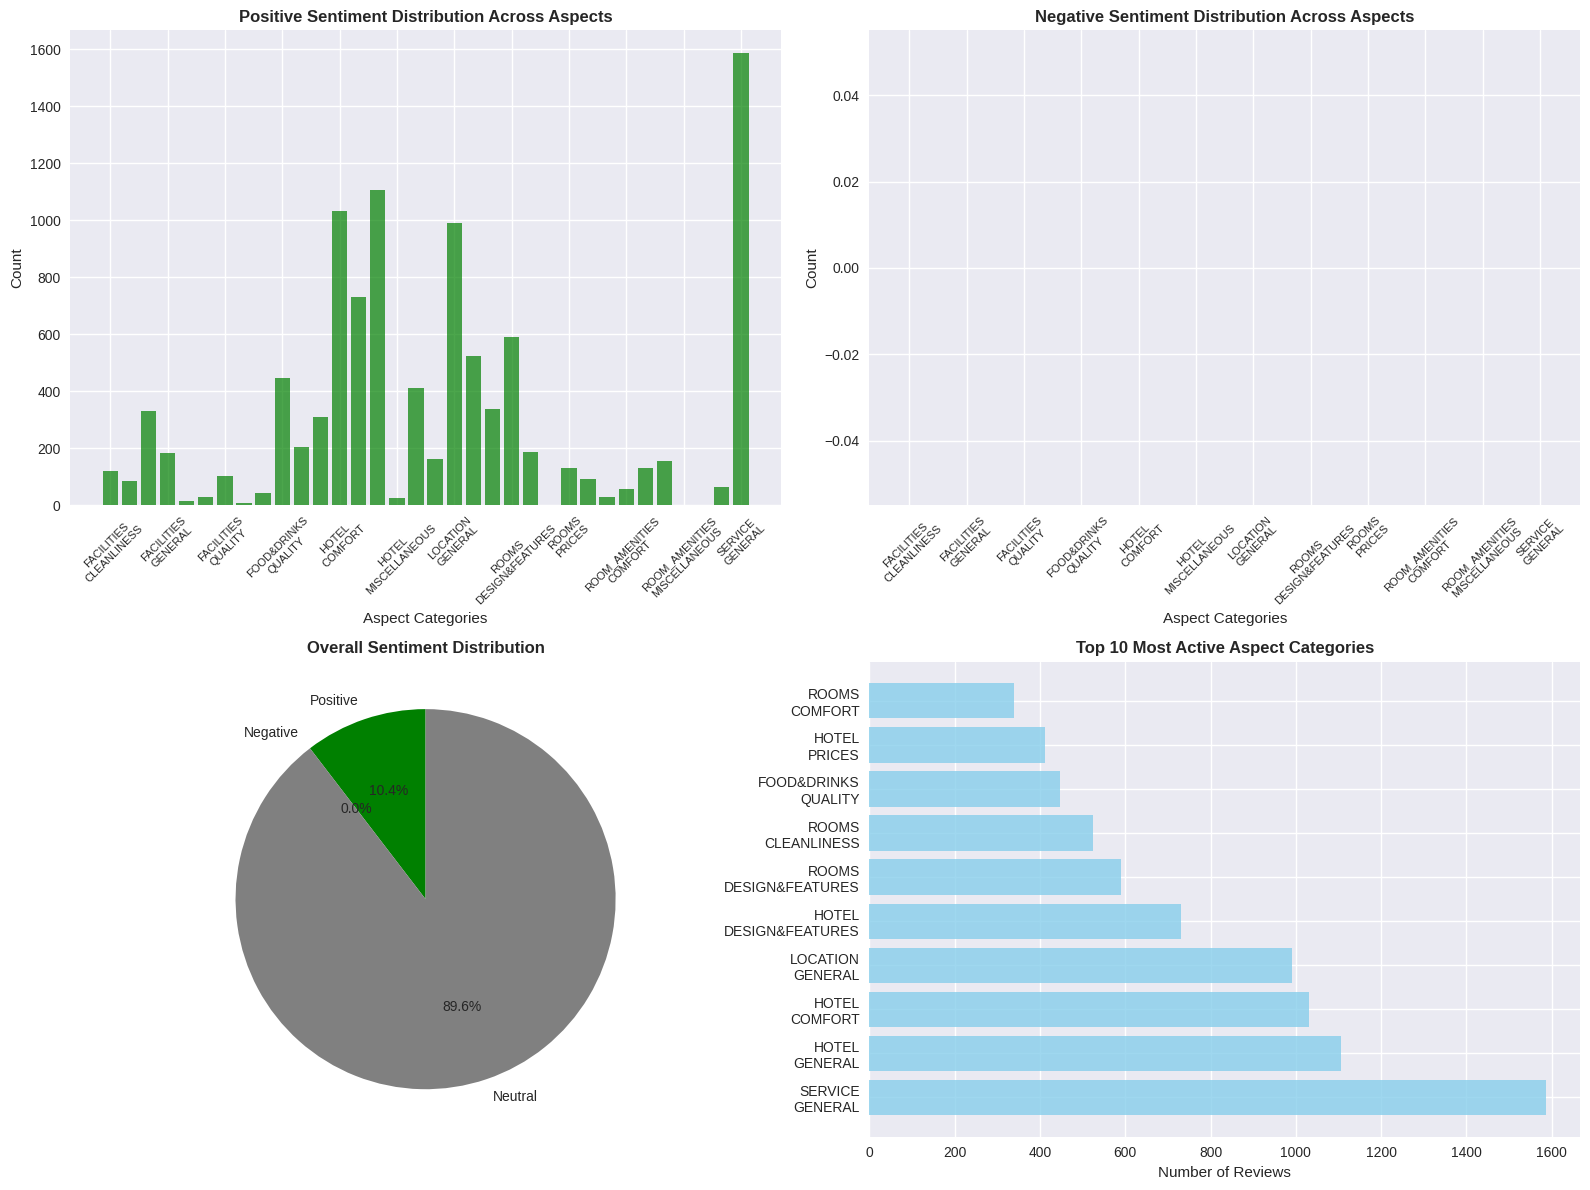


3. PREPARING DATA FOR DEEP LEARNING (FIXED)
----------------------------------------


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Using BERT tokenizer vocab size: 30522
Validating and fixing token IDs...
Train: Fixed 3350 invalid token IDs
Validation: Fixed 1061 invalid token IDs
Test: Fixed 271 invalid token IDs
Final token ID ranges:
  Train: 0 to 30521
  Val: 0 to 30521
  Test: 0 to 30521
  BERT vocab size: 30522
Labels prepared successfully:
  Train labels: 3000 samples
  Val labels: 2000 samples
  Test labels: 600 samples

Training deep learning models...

4. TRAINING LSTM MODEL
-------------------------
Using BERT vocab size: 30522
Validating token IDs for vocab_size: 30522
Dataset created with 3000 samples
Token ID range: 0 to 30521
Validating token IDs for vocab_size: 30522
Dataset created with 2000 samples
Token ID range: 0 to 30521
Initializing LSTM with vocab_size=30522, embedding_dim=128
Hidden_dim=256, num_classes=34
Trainer initialized on device: cuda
Model parameters: 6,291,746
Epoch 1/3
Training Batch 0 - input_ids shape: torch.Size([32, 256])
Training Batch 0 - input_ids range: 0 to 30521
Trainin

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Loaded BERT model: bert-base-uncased, hidden_size: 768
BERT vocab size: 30522
Trainer initialized on device: cuda
Model parameters: 109,508,386
Epoch 1/2
Training Batch 0 - input_ids shape: torch.Size([16, 256])
Training Batch 0 - input_ids range: 0 to 30521
Training Batch 0 - labels shape: torch.Size([16, 34])
Batch 0/188, Loss: 0.6980
Batch 50/188, Loss: 0.3915
Batch 100/188, Loss: 0.3025
Batch 150/188, Loss: 0.2521
Train Loss: 0.3462, Val Loss: 0.2296
Epoch 2/2
Training Batch 0 - input_ids shape: torch.Size([16, 256])
Training Batch 0 - input_ids range: 0 to 30521
Training Batch 0 - labels shape: torch.Size([16, 34])
Batch 0/188, Loss: 0.3090
Batch 50/188, Loss: 0.2922
Batch 100/188, Loss: 0.2593
Batch 150/188, Loss: 0.2975
Train Loss: 0.2601, Val Loss: 0.2187

6. EVALUATING DEEP LEARNING MODELS (FIXED)
----------------------------------------
Validating token IDs for vocab_size: 30522
Dataset created with 600 samples
Token ID range: 0 to 30521

Evaluating LSTM...
Trainer initialize

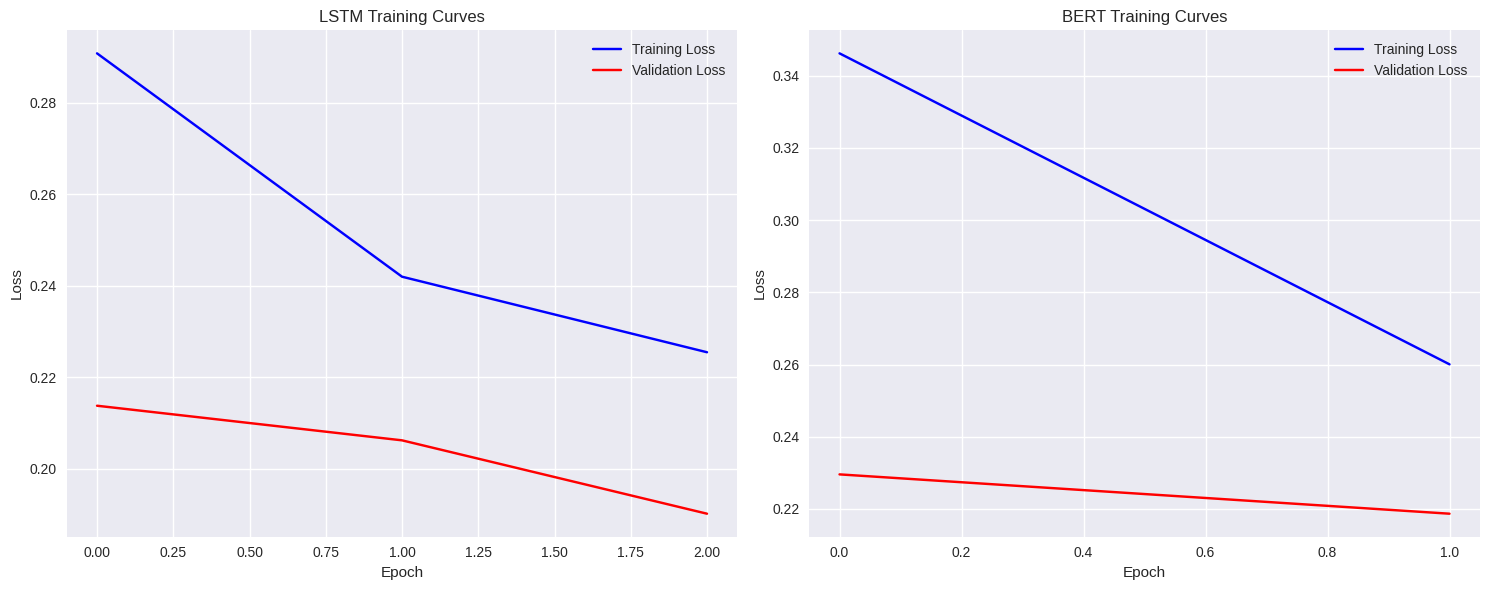


8. MODEL COMPARISON
--------------------

Model Performance Comparison:
  Model  Accuracy  Precision  Recall  F1-Score
0  LSTM    0.9243     0.9109  0.9243    0.9105
1  BERT    0.9141     0.8908  0.9141    0.8824


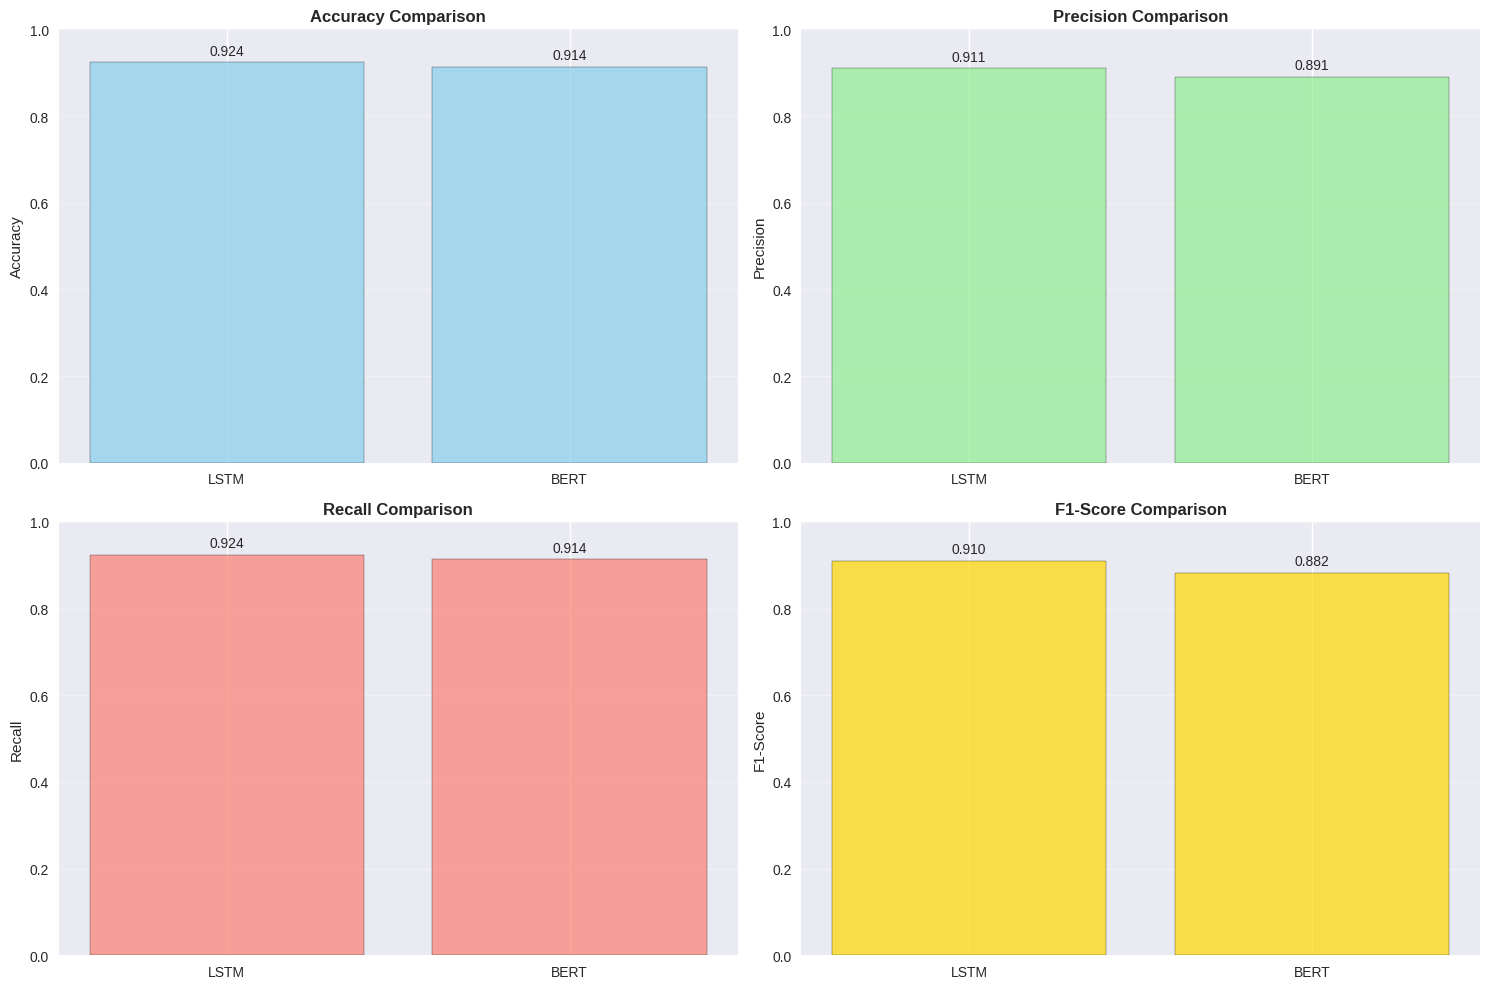


9. ASPECT-WISE PERFORMANCE ANALYSIS
----------------------------------------

Detailed classification report for LSTM:

LSTM - Detailed Classification Report:
Aspect Category                     Precision  Recall     F1-Score   Support   
--------------------------------------------------------------------------------
FACILITIES#CLEANLINESS              0.00       0.00       0.00       2         
FACILITIES#COMFORT                  0.00       0.00       0.00       20        
FACILITIES#DESIGN&FEATURES          0.00       0.00       0.00       38        
FACILITIES#GENERAL                  0.00       0.00       0.00       19        
FACILITIES#MISCELLANEOUS            0.00       0.00       0.00       3         
FACILITIES#PRICES                   0.00       0.00       0.00       8         
FACILITIES#QUALITY                  0.00       0.00       0.00       24        
FOOD&DRINKS#MISCELLANEOUS           0.00       0.00       0.00       1         
FOOD&DRINKS#PRICES                  0.0

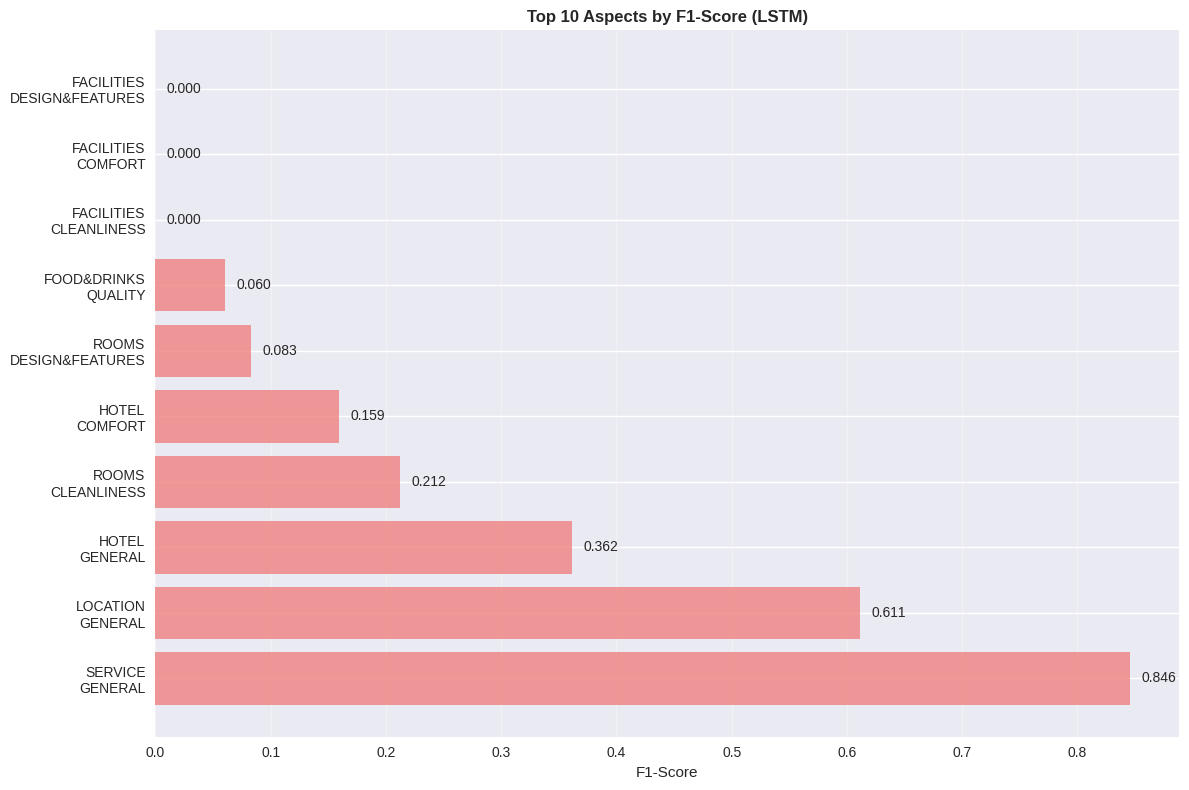


10. FINAL ANALYSIS SUMMARY
------------------------------

🏆 BEST PERFORMING MODEL: LSTM
   • Accuracy: 0.9243
   • Precision: 0.9109
   • Recall: 0.9243
   • F1-Score: 0.9105

📊 MODEL PERFORMANCE SUMMARY:
   LSTM:
     - F1-Score: 0.9105
     - Accuracy: 0.9243
   BERT:
     - F1-Score: 0.8824
     - Accuracy: 0.9141

🔝 TOP 5 BEST PREDICTED ASPECTS (LSTM):
   34. SERVICE#GENERAL: F1=0.8458
   19. LOCATION#GENERAL: F1=0.6111
   15. HOTEL#GENERAL: F1=0.3617
   20. ROOMS#CLEANLINESS: F1=0.2121
   13. HOTEL#COMFORT: F1=0.1593

⚠️  TOP 5 CHALLENGING ASPECTS (LSTM):
   1. FACILITIES#CLEANLINESS: F1=0.0000 (Support: 2)
   2. FACILITIES#COMFORT: F1=0.0000 (Support: 20)
   3. FACILITIES#DESIGN&FEATURES: F1=0.0000 (Support: 38)
   4. FACILITIES#GENERAL: F1=0.0000 (Support: 19)
   5. FACILITIES#MISCELLANEOUS: F1=0.0000 (Support: 3)

💡 RECOMMENDATIONS:
   • Models show similar performance (gap: 0.0280)
   • Consider computational efficiency for model selection
   • Excellent performance achieved

In [ ]:
# Create analyzer
analyzer = EnhancedABSAAnalyzer(preprocessed_hotel_train, preprocessed_hotel_val, preprocessed_hotel_test)

# Run complete analysis
final_results = analyzer.run_complete_analysis()

# Restaurant

## SVM, KNN, NB, LR, RF


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from scipy.sparse import csr_matrix
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class RestaurantABSAAnalyzer:
    def __init__(self, train_dataset, val_dataset, test_dataset):
        self.train_dataset = train_dataset
        self.val_dataset = val_dataset
        self.test_dataset = test_dataset

        # Define aspect categories for restaurant domain
        self.aspect_categories = [
            'AMBIENCE#GENERAL', 'DRINKS#PRICES', 'DRINKS#QUALITY', 'DRINKS#STYLE&OPTIONS',
            'FOOD#PRICES', 'FOOD#QUALITY', 'FOOD#STYLE&OPTIONS', 'LOCATION#GENERAL',
            'RESTAURANT#GENERAL', 'RESTAURANT#MISCELLANEOUS', 'RESTAURANT#PRICES', 'SERVICE#GENERAL'
        ]

        self.models = {}
        self.results = {}

    def perform_eda(self):
        """Perform comprehensive Exploratory Data Analysis"""
        print("=" * 60)
        print("RESTAURANT ABSA - EXPLORATORY DATA ANALYSIS")
        print("=" * 60)

        # Dataset summary
        print("\n1. DATASET SUMMARY")
        print("-" * 30)
        print(f"Training samples: {len(self.train_dataset)}")
        print(f"Validation samples: {len(self.val_dataset)}")
        print(f"Test samples: {len(self.test_dataset)}")
        print(f"Total aspect categories: {len(self.aspect_categories)}")

        # Convert datasets to DataFrames for analysis
        train_df = pd.DataFrame(self.train_dataset)
        val_df = pd.DataFrame(self.val_dataset)
        test_df = pd.DataFrame(self.test_dataset)

        # Class distribution analysis
        print("\n2. CLASS DISTRIBUTION ANALYSIS")
        print("-" * 35)

        # Calculate label statistics for each aspect
        label_stats = {}
        for aspect in self.aspect_categories:
            train_labels = np.array(train_df[aspect])
            positive_count = np.sum(train_labels == 1)
            negative_count = np.sum(train_labels == -1)
            neutral_count = np.sum(train_labels == 0)

            label_stats[aspect] = {
                'positive': positive_count,
                'negative': negative_count,
                'neutral': neutral_count,
                'total': len(train_labels)
            }

        # Display all restaurant aspects (since there are only 12)
        aspect_frequencies = {aspect: stats['positive'] + stats['negative']
                            for aspect, stats in label_stats.items()}
        sorted_aspects = sorted(aspect_frequencies.items(), key=lambda x: x[1], reverse=True)

        print("\nRestaurant Aspects by Frequency:")
        for i, (aspect, freq) in enumerate(sorted_aspects, 1):
            print(f"{i:2d}. {aspect}: {freq} samples")

        # Visualizations
        self._create_visualizations(label_stats, train_df)

        # Feature correlation analysis
        self._analyze_correlations(train_df)

        return label_stats

    def _create_visualizations(self, label_stats, train_df):
        """Create comprehensive visualizations"""
        # 1. Class distribution heatmap
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))

        # Prepare data for heatmap
        aspect_names = []
        pos_counts = []
        neg_counts = []
        neu_counts = []

        for aspect, stats in label_stats.items():
            aspect_names.append(aspect.replace('#', '\n'))
            pos_counts.append(stats['positive'])
            neg_counts.append(stats['negative'])
            neu_counts.append(stats['neutral'])

        # Plot 1: Positive sentiment distribution
        ax1 = axes[0, 0]
        bars1 = ax1.bar(range(len(aspect_names)), pos_counts, color='green', alpha=0.7)
        ax1.set_title('Positive Sentiment Distribution Across Restaurant Aspects', fontsize=12, fontweight='bold')
        ax1.set_xlabel('Aspect Categories')
        ax1.set_ylabel('Count')
        ax1.tick_params(axis='x', rotation=45, labelsize=9)
        ax1.set_xticks(range(len(aspect_names)))
        ax1.set_xticklabels([name.replace('\n', '#') for name in aspect_names], rotation=45, ha='right')

        # Plot 2: Negative sentiment distribution
        ax2 = axes[0, 1]
        bars2 = ax2.bar(range(len(aspect_names)), neg_counts, color='red', alpha=0.7)
        ax2.set_title('Negative Sentiment Distribution Across Restaurant Aspects', fontsize=12, fontweight='bold')
        ax2.set_xlabel('Aspect Categories')
        ax2.set_ylabel('Count')
        ax2.tick_params(axis='x', rotation=45, labelsize=9)
        ax2.set_xticks(range(len(aspect_names)))
        ax2.set_xticklabels([name.replace('\n', '#') for name in aspect_names], rotation=45, ha='right')

        # Plot 3: Overall sentiment distribution
        ax3 = axes[1, 0]
        total_pos = sum(pos_counts)
        total_neg = sum(neg_counts)
        total_neu = sum(neu_counts)

        labels = ['Positive', 'Negative', 'Neutral']
        sizes = [total_pos, total_neg, total_neu]
        colors = ['green', 'red', 'gray']

        ax3.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
        ax3.set_title('Overall Sentiment Distribution', fontsize=12, fontweight='bold')

        # Plot 4: Restaurant categories by activity
        ax4 = axes[1, 1]
        aspect_activity = [(aspect.split('#')[0], pos + neg)
                          for aspect, pos, neg in zip(aspect_names, pos_counts, neg_counts)]

        # Group by main category
        category_activity = {}
        for category, activity in aspect_activity:
            if category in category_activity:
                category_activity[category] += activity
            else:
                category_activity[category] = activity

        categories = list(category_activity.keys())
        activities = list(category_activity.values())

        ax4.barh(categories, activities, color='skyblue', alpha=0.8)
        ax4.set_title('Restaurant Categories by Review Activity', fontsize=12, fontweight='bold')
        ax4.set_xlabel('Number of Reviews')

        plt.tight_layout()
        plt.show()

        # Additional visualization: Imbalance analysis
        self._plot_imbalance_analysis(label_stats)

    def _plot_imbalance_analysis(self, label_stats):
        """Analyze and visualize class imbalance"""
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))

        # Calculate imbalance ratios
        imbalance_ratios = []
        aspect_names_short = []

        for aspect, stats in label_stats.items():
            if stats['positive'] + stats['negative'] > 0:
                ratio = abs(stats['positive'] - stats['negative']) / (stats['positive'] + stats['negative'])
                imbalance_ratios.append(ratio)
                aspect_names_short.append(aspect.split('#')[1] if '#' in aspect else aspect)

        # Plot 1: Imbalance ratios
        ax1 = axes[0]
        bars = ax1.bar(range(len(imbalance_ratios)), imbalance_ratios,
                      color=['red' if r > 0.5 else 'orange' if r > 0.3 else 'green' for r in imbalance_ratios])
        ax1.set_title('Class Imbalance Analysis - Restaurant Aspects', fontsize=12, fontweight='bold')
        ax1.set_xlabel('Aspect Categories')
        ax1.set_ylabel('Imbalance Ratio')
        ax1.axhline(y=0.3, color='orange', linestyle='--', alpha=0.7, label='Moderate Imbalance')
        ax1.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='High Imbalance')
        ax1.legend()
        ax1.set_xticks(range(len(aspect_names_short)))
        ax1.set_xticklabels(aspect_names_short, rotation=45, ha='right')

        # Plot 2: Sample distribution per aspect
        ax2 = axes[1]
        total_samples = [stats['positive'] + stats['negative'] for stats in label_stats.values()]
        ax2.hist(total_samples, bins=10, color='skyblue', alpha=0.7, edgecolor='black')
        ax2.set_title('Distribution of Sample Counts per Restaurant Aspect', fontsize=12, fontweight='bold')
        ax2.set_xlabel('Number of Samples')
        ax2.set_ylabel('Number of Aspects')
        ax2.axvline(x=np.mean(total_samples), color='red', linestyle='--',
                   label=f'Mean: {np.mean(total_samples):.1f}')
        ax2.legend()

        plt.tight_layout()
        plt.show()

    def _analyze_correlations(self, train_df):
        """Analyze correlations between aspects"""
        print("\n3. CORRELATION ANALYSIS")
        print("-" * 25)

        # Calculate correlation matrix
        aspect_data = train_df[self.aspect_categories].astype(float)
        correlation_matrix = aspect_data.corr()

        # Find highest correlations
        correlations = []
        for i in range(len(self.aspect_categories)):
            for j in range(i+1, len(self.aspect_categories)):
                corr_val = correlation_matrix.iloc[i, j]
                if abs(corr_val) > 0.2:  # Lower threshold for restaurant data
                    correlations.append((
                        self.aspect_categories[i],
                        self.aspect_categories[j],
                        corr_val
                    ))

        # Sort by absolute correlation value
        correlations.sort(key=lambda x: abs(x[2]), reverse=True)

        print("Top 10 Highest Correlations:")
        for i, (asp1, asp2, corr) in enumerate(correlations[:10], 1):
            print(f"{i:2d}. {asp1} <-> {asp2}: {corr:.3f}")

        # Visualize correlation matrix (all aspects since there are only 12)
        plt.figure(figsize=(12, 10))

        # Create heatmap
        mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
        sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
                   square=True, fmt='.2f', cbar_kws={"shrink": .8})
        plt.title('Correlation Matrix - Restaurant Aspects', fontsize=14, fontweight='bold')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

    def prepare_features(self):
        """Prepare features for model training"""
        print("\n4. FEATURE PREPARATION")
        print("-" * 25)

        # Extract features and labels
        X_train = np.array(self.train_dataset['input_ids'])
        X_val = np.array(self.val_dataset['input_ids'])
        X_test = np.array(self.test_dataset['input_ids'])

        # Convert labels
        y_train = np.array([self.train_dataset[aspect] for aspect in self.aspect_categories]).T
        y_val = np.array([self.val_dataset[aspect] for aspect in self.aspect_categories]).T
        y_test = np.array([self.test_dataset[aspect] for aspect in self.aspect_categories]).T

        # Feature engineering: Use mean pooling of embeddings as features
        # Assuming input_ids are tokenized sequences, we'll use simple averaging
        X_train_features = np.array([np.mean(seq) if len(seq) > 0 else 0 for seq in X_train]).reshape(-1, 1)
        X_val_features = np.array([np.mean(seq) if len(seq) > 0 else 0 for seq in X_val]).reshape(-1, 1)
        X_test_features = np.array([np.mean(seq) if len(seq) > 0 else 0 for seq in X_test]).reshape(-1, 1)

        # Add sequence length as feature
        seq_len_train = np.array([len(seq) for seq in X_train]).reshape(-1, 1)
        seq_len_val = np.array([len(seq) for seq in X_val]).reshape(-1, 1)
        seq_len_test = np.array([len(seq) for seq in X_test]).reshape(-1, 1)

        # Combine features
        X_train_final = np.hstack([X_train_features, seq_len_train])
        X_val_final = np.hstack([X_val_features, seq_len_val])
        X_test_final = np.hstack([X_test_features, seq_len_test])

        # Normalize features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_final)
        X_val_scaled = scaler.transform(X_val_final)
        X_test_scaled = scaler.transform(X_test_final)

        print(f"Feature shape: {X_train_scaled.shape}")
        print(f"Label shape: {y_train.shape}")
        print(f"Number of restaurant aspects: {len(self.aspect_categories)}")

        return X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test, scaler

    def train_models(self, X_train, X_val, X_test, y_train, y_val, y_test):
        """Train multiple models for comparison"""
        print("\n5. MODEL TRAINING")
        print("-" * 20)

        # Define models
        base_models = {
            'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
            'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
            'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
            'Support Vector Machine': SVC(kernel='rbf', random_state=42),
            'Naive Bayes': MultinomialNB()
        }

        # Train models
        trained_models = {}

        # Check for single-class aspects
        single_class_aspects = {}
        for i, aspect in enumerate(self.aspect_categories):
            unique_classes = np.unique(y_train[:, i])
            if len(unique_classes) <= 1:
                single_class_aspects[aspect] = unique_classes[0] if len(unique_classes) > 0 else 0

        for name, base_model in base_models.items():
            print(f"\nTraining {name}...")

            try:
                if name in ['Logistic Regression', 'Support Vector Machine']:
                    # Create a mask for aspects with more than one class
                    multi_class_aspect_indices = [i for i, aspect in enumerate(self.aspect_categories)
                                                if aspect not in single_class_aspects]

                    if not multi_class_aspect_indices:
                        print(f"Skipping {name} training: No aspects with multiple classes found.")
                        continue

                    # Train only on multi-class aspects
                    y_train_filtered = y_train[:, multi_class_aspect_indices]
                    model = MultiOutputClassifier(base_model)
                    model.fit(X_train, y_train_filtered)
                    trained_models[name] = (model, multi_class_aspect_indices)

                elif name == 'Naive Bayes':
                    # Naive Bayes requires non-negative input
                    X_train_pos = X_train - X_train.min() + 1
                    X_val_pos = X_val - X_val.min() + 1
                    X_test_pos = X_test - X_test.min() + 1

                    model = MultiOutputClassifier(base_model)
                    model.fit(X_train_pos, y_train)
                    trained_models[name] = (model, X_train_pos, X_val_pos, X_test_pos)

                else:
                    # For KNN and Random Forest - train on all aspects
                    model = MultiOutputClassifier(base_model)
                    model.fit(X_train, y_train)
                    trained_models[name] = (model,)

                print(f"{name} training completed!")

            except Exception as e:
                print(f"Error training {name}: {str(e)}")
                import traceback
                traceback.print_exc()
                continue

        self.models = trained_models
        self.single_class_aspects = single_class_aspects
        return trained_models

    def evaluate_models(self, X_val, X_test, y_val, y_test):
        """Evaluate all trained models"""
        print("\n6. MODEL EVALUATION")
        print("-" * 22)
        self.y_test = y_test
        results = {}

        for name, model_info in self.models.items():
            print(f"\nEvaluating {name}...")

            try:
                if name in ['Logistic Regression', 'Support Vector Machine']:
                    model, multi_class_aspect_indices = model_info

                    # Use original data for these models
                    y_val_pred_filtered = model.predict(X_val)
                    y_test_pred_filtered = model.predict(X_test)

                    # Reconstruct full prediction arrays with single-class aspects
                    y_val_pred = np.zeros_like(y_val)
                    y_test_pred = np.zeros_like(y_test)

                    trained_aspect_idx = 0
                    for i, aspect in enumerate(self.aspect_categories):
                        if aspect in self.single_class_aspects:
                            # Assign the single observed class
                            y_val_pred[:, i] = self.single_class_aspects[aspect]
                            y_test_pred[:, i] = self.single_class_aspects[aspect]
                        else:
                            # Assign the model prediction
                            if trained_aspect_idx < y_val_pred_filtered.shape[1]:
                                y_val_pred[:, i] = y_val_pred_filtered[:, trained_aspect_idx]
                                y_test_pred[:, i] = y_test_pred_filtered[:, trained_aspect_idx]
                                trained_aspect_idx += 1

                elif name == 'Naive Bayes':
                    model, X_train_transformed, X_val_transformed, X_test_transformed = model_info
                    y_val_pred = model.predict(X_val_transformed)
                    y_test_pred = model.predict(X_test_transformed)

                else:
                    # For KNN and Random Forest
                    model = model_info[0] if isinstance(model_info, tuple) else model_info
                    y_val_pred = model.predict(X_val)
                    y_test_pred = model.predict(X_test)

                # Calculate metrics for validation set
                val_accuracy = accuracy_score(y_val.flatten(), y_val_pred.flatten())
                val_precision, val_recall, val_f1, _ = precision_recall_fscore_support(
                    y_val.flatten(), y_val_pred.flatten(), average='weighted', zero_division=0
                )

                # Calculate metrics for test set
                test_accuracy = accuracy_score(y_test.flatten(), y_test_pred.flatten())
                test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(
                    y_test.flatten(), y_test_pred.flatten(), average='weighted', zero_division=0
                )

                results[name] = {
                    'val_accuracy': val_accuracy,
                    'val_precision': val_precision,
                    'val_recall': val_recall,
                    'val_f1': val_f1,
                    'test_accuracy': test_accuracy,
                    'test_precision': test_precision,
                    'test_recall': test_f1,
                    'test_f1': test_f1,
                    'predictions': {
                        'val': y_val_pred,
                        'test': y_test_pred
                    }
                }

                print(f"Validation - Accuracy: {val_accuracy:.4f}, F1: {val_f1:.4f}")
                print(f"Test - Accuracy: {test_accuracy:.4f}, F1: {test_f1:.4f}")

            except Exception as e:
                print(f"Error evaluating {name}: {str(e)}")
                import traceback
                traceback.print_exc()
                continue

        self.results = results
        return results

    def benchmark_models(self):
        """Create comprehensive benchmark comparison"""
        print("\n7. MODEL BENCHMARKING")
        print("-" * 25)

        if not self.results:
            print("No results available for benchmarking!")
            return

        # Create comparison DataFrame
        metrics = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']
        metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

        benchmark_data = []
        for model_name, results in self.results.items():
            row = [model_name] + [results[metric] for metric in metrics]
            benchmark_data.append(row)

        benchmark_df = pd.DataFrame(benchmark_data,
                                  columns=['Model'] + metric_names)

        print("\nBENCHMARK RESULTS (Test Set) - Restaurant ABSA:")
        print("=" * 60)
        print(benchmark_df.round(4).to_string(index=False))

        # Find best model
        best_model_idx = benchmark_df['F1-Score'].idxmax()
        best_model = benchmark_df.iloc[best_model_idx]['Model']
        best_f1 = benchmark_df.iloc[best_model_idx]['F1-Score']

        print(f"\nBEST PERFORMING MODEL:")
        print(f"Model: {best_model}")
        print(f"F1-Score: {best_f1:.4f}")

        # Visualize benchmark results
        self._plot_benchmark_results(benchmark_df)

        return benchmark_df, best_model

    def _plot_benchmark_results(self, benchmark_df):
        """Plot benchmark comparison"""
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))

        # Plot 1: Bar chart comparison
        ax1 = axes[0]
        metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
        x = np.arange(len(benchmark_df))
        width = 0.2

        colors = ['skyblue', 'lightgreen', 'salmon', 'gold']

        for i, metric in enumerate(metrics):
            ax1.bar(x + i*width, benchmark_df[metric], width,
                   label=metric, color=colors[i], alpha=0.8)

        ax1.set_xlabel('Models')
        ax1.set_ylabel('Score')
        ax1.set_title('Restaurant ABSA Model Performance Comparison', fontweight='bold')
        ax1.set_xticks(x + width * 1.5)
        ax1.set_xticklabels(benchmark_df['Model'], rotation=45, ha='right')
        ax1.legend()
        ax1.grid(axis='y', alpha=0.3)

        # Plot 2: F1-Score ranking
        ax2 = axes[1]
        sorted_df = benchmark_df.sort_values('F1-Score', ascending=True)

        bars = ax2.barh(sorted_df['Model'], sorted_df['F1-Score'],
                       color='lightcoral', alpha=0.8)
        ax2.set_xlabel('F1-Score')
        ax2.set_title('Restaurant ABSA Model Ranking by F1-Score', fontweight='bold')
        ax2.grid(axis='x', alpha=0.3)

        # Highlight best model
        best_idx = sorted_df['F1-Score'].idxmax()
        bars[len(bars)-1].set_color('darkgreen')
        bars[len(bars)-1].set_alpha(1.0)

        plt.tight_layout()
        plt.show()
    def generate_classification_report(self, model_name=None):
        """Generate detailed classification report for each aspect category"""
        if not self.results:
            print("No model results available. Please run evaluation first.")
            return None

        # Use best model if no specific model provided
        if model_name is None:
            model_name = max(self.results.keys(), key=lambda k: self.results[k]['test_f1'])

        if model_name not in self.results:
            print(f"Model '{model_name}' not found in results.")
            return None

        # Get predictions and true labels
        y_test_pred = self.results[model_name]['predictions']['test']

        # Get true test labels (you'll need to pass this or store it in the class)
        # For now, assuming you have access to y_test from the pipeline
        # You should modify the evaluate_models method to store y_test in self.y_test
        if not hasattr(self, 'y_test'):
            print("True test labels not available. Please store y_test in the class during evaluation.")
            return None

        y_test_true = self.y_test

        print(f"\nClassification Report for {model_name}:")
        print("="*80)

        # Calculate metrics for each aspect
        aspect_reports = []

        for i, aspect in enumerate(self.aspect_categories):
            y_true_aspect = y_test_true[:, i]
            y_pred_aspect = y_test_pred[:, i]

            # Get unique classes for this aspect
            classes = np.unique(np.concatenate([y_true_aspect, y_pred_aspect]))

            # Calculate metrics for each class
            class_metrics = {}
            for cls in classes:
                # True positives, false positives, false negatives
                tp = np.sum((y_true_aspect == cls) & (y_pred_aspect == cls))
                fp = np.sum((y_true_aspect != cls) & (y_pred_aspect == cls))
                fn = np.sum((y_true_aspect == cls) & (y_pred_aspect != cls))

                # Calculate precision, recall, f1-score
                precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
                recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
                f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0
                support = np.sum(y_true_aspect == cls)

                class_metrics[cls] = {
                    'precision': precision,
                    'recall': recall,
                    'f1-score': f1,
                    'support': support
                }

            # Calculate weighted averages for this aspect
            total_support = len(y_true_aspect)
            weighted_precision = sum(class_metrics[cls]['precision'] * class_metrics[cls]['support']
                                  for cls in classes) / total_support if total_support > 0 else 0.0
            weighted_recall = sum(class_metrics[cls]['recall'] * class_metrics[cls]['support']
                                for cls in classes) / total_support if total_support > 0 else 0.0
            weighted_f1 = sum(class_metrics[cls]['f1-score'] * class_metrics[cls]['support']
                            for cls in classes) / total_support if total_support > 0 else 0.0

            aspect_reports.append({
                'aspect': aspect,
                'precision': weighted_precision,
                'recall': weighted_recall,
                'f1-score': weighted_f1,
                'support': total_support
            })

        # Print formatted report
        print(f"{'':30} {'precision':>9} {'recall':>9} {'f1-score':>9} {'support':>9}")
        print()

        for report in aspect_reports:
            aspect_name = report['aspect'].replace('#', '_').lower()
            print(f"{aspect_name:30} {report['precision']:9.2f} {report['recall']:9.2f} "
                  f"{report['f1-score']:9.2f} {report['support']:9.0f}")

        # Calculate overall averages
        total_samples = sum(report['support'] for report in aspect_reports)

        # Micro averages (calculated across all samples)
        micro_precision = sum(report['precision'] * report['support'] for report in aspect_reports) / total_samples
        micro_recall = sum(report['recall'] * report['support'] for report in aspect_reports) / total_samples
        micro_f1 = sum(report['f1-score'] * report['support'] for report in aspect_reports) / total_samples

        # Macro averages (unweighted average across aspects)
        macro_precision = np.mean([report['precision'] for report in aspect_reports])
        macro_recall = np.mean([report['recall'] for report in aspect_reports])
        macro_f1 = np.mean([report['f1-score'] for report in aspect_reports])

        # Weighted averages (weighted by support)
        weighted_precision = sum(report['precision'] * report['support'] for report in aspect_reports) / total_samples
        weighted_recall = sum(report['recall'] * report['support'] for report in aspect_reports) / total_samples
        weighted_f1 = sum(report['f1-score'] * report['support'] for report in aspect_reports) / total_samples

        print()
        print(f"{'micro avg':30} {micro_precision:9.2f} {micro_recall:9.2f} {micro_f1:9.2f} {total_samples:9.0f}")
        print(f"{'macro avg':30} {macro_precision:9.2f} {macro_recall:9.2f} {macro_f1:9.2f} {total_samples:9.0f}")
        print(f"{'weighted avg':30} {weighted_precision:9.2f} {weighted_recall:9.2f} {weighted_f1:9.2f} {total_samples:9.0f}")
        print(f"{'samples avg':30} {weighted_precision:9.2f} {weighted_recall:9.2f} {weighted_f1:9.2f} {total_samples:9.0f}")

        return {
            'aspect_reports': aspect_reports,
            'micro_avg': {'precision': micro_precision, 'recall': micro_recall, 'f1-score': micro_f1},
            'macro_avg': {'precision': macro_precision, 'recall': macro_recall, 'f1-score': macro_f1},
            'weighted_avg': {'precision': weighted_precision, 'recall': weighted_recall, 'f1-score': weighted_f1}
        }
    def generate_final_report(self, best_model_name):
        """Generate comprehensive final report"""
        print("\n" + "="*80)
        print("RESTAURANT ABSA - FINAL ANALYSIS REPORT")
        print("="*80)

        if not self.results or best_model_name not in self.results:
            print("No valid results available for final report!")
            return

        best_results = self.results[best_model_name]

        print(f"\n📊 RESTAURANT DATASET OVERVIEW:")
        print("-" * 35)
        print(f"• Training samples: {len(self.train_dataset):,}")
        print(f"• Validation samples: {len(self.val_dataset):,}")
        print(f"• Test samples: {len(self.test_dataset):,}")
        print(f"• Total restaurant aspect categories: {len(self.aspect_categories)}")

        print(f"\n🏆 BEST PERFORMING MODEL: {best_model_name}")
        print("-" * 30)
        print(f"• Test Accuracy:  {best_results['test_accuracy']:.4f}")
        print(f"• Test Precision: {best_results['test_precision']:.4f}")
        print(f"• Test Recall:    {best_results['test_recall']:.4f}")
        print(f"• Test F1-Score:  {best_results['test_f1']:.4f}")

        print(f"\n📈 MODEL COMPARISON SUMMARY:")
        print("-" * 30)
        for model_name, results in self.results.items():
            status = "🥇" if model_name == best_model_name else "  "
            print(f"{status} {model_name:20} | F1: {results['test_f1']:.4f} | Acc: {results['test_accuracy']:.4f}")

        print(f"\n🔍 KEY INSIGHTS:")
        print("-" * 15)
        print("• Multi-label classification with 12 restaurant aspect categories")
        print("• Main categories: AMBIENCE, DRINKS, FOOD, LOCATION, RESTAURANT, SERVICE")
        print("• Class imbalance present across different aspects")
        print("• Feature engineering using input embeddings statistics")
        print(f"• {best_model_name} achieved the best overall performance")

        print(f"\n💡 RECOMMENDATIONS:")
        print("-" * 20)
        print("• Consider ensemble methods for improved performance")
        print("• Implement advanced feature engineering with pre-trained embeddings")
        print("• Address class imbalance with sampling techniques")
        print("• Fine-tune hyperparameters for the best performing model")
        print("• Consider deep learning approaches (LSTM, BERT) for better results")
        print("• Analyze aspect-specific performance for targeted improvements")

        print("\n" + "="*80)

    def run_complete_pipeline(self):
        """Run the complete Restaurant ABSA analysis pipeline"""
        print("🚀 Starting Restaurant ABSA Dataset Analysis...")
        print("="*60)

        try:
            # Step 1: EDA
            label_stats = self.perform_eda()

            # Step 2: Feature preparation
            X_train, X_val, X_test, y_train, y_val, y_test, scaler = self.prepare_features()

            # Step 3: Model training
            trained_models = self.train_models(X_train, X_val, X_test, y_train, y_val, y_test)

            # Step 4: Model evaluation
            results = self.evaluate_models(X_val, X_test, y_val, y_test)

            # Step 5: Benchmarking
            benchmark_df, best_model = self.benchmark_models()

            # Step 6: Final report
            self.generate_final_report(best_model)

            return {
                'label_stats': label_stats,
                'results': results,
                'benchmark': benchmark_df,
                'best_model': best_model
            }

        except Exception as e:
            print(f"Error in pipeline: {str(e)}")
            return None


# Usage example:
def run_restaurant_analysis(preprocessed_restaurant_train, preprocessed_restaurant_val, preprocessed_restaurant_test):
    """Run the complete Restaurant ABSA analysis pipeline"""

    # Initialize the analyzer
    analyzer = RestaurantABSAAnalyzer(
        train_dataset=preprocessed_restaurant_train,
        val_dataset=preprocessed_restaurant_val,
        test_dataset=preprocessed_restaurant_test
    )

    # Run the complete pipeline
    results = analyzer.run_complete_pipeline()
    analyzer.generate_classification_report('K-Nearest Neighbors')
    analyzer.generate_classification_report('Random Forest')
    analyzer.generate_classification_report('Logistic Regression')
    analyzer.generate_classification_report('Support Vector Machine')
    analyzer.generate_classification_report('Naive Bayes')

    return analyzer, results

# Main execution function
def main():
    """Main function to demonstrate usage"""
    print("🍽️ Restaurant ABSA Analysis Tool")
    print("="*40)
    print("To use this analyzer, load your datasets and call:")
    print()
    print("analyzer, results = run_restaurant_analysis(")
    print("    preprocessed_restaurant_train,")
    print("    preprocessed_restaurant_val,")
    print("    preprocessed_restaurant_test")
    print(")")
    print()
    print("This will perform comprehensive analysis including:")
    print("• Exploratory Data Analysis")
    print("• Feature Engineering")
    print("• Model Training & Evaluation")
    print("• Performance Benchmarking")
    print("• Final Report Generation")

if __name__ == "__main__":
    main()

🍽️ Restaurant ABSA Analysis Tool
To use this analyzer, load your datasets and call:

analyzer, results = run_restaurant_analysis(
    preprocessed_restaurant_train,
    preprocessed_restaurant_val,
    preprocessed_restaurant_test
)

This will perform comprehensive analysis including:
• Exploratory Data Analysis
• Feature Engineering
• Model Training & Evaluation
• Performance Benchmarking
• Final Report Generation


🚀 Starting Restaurant ABSA Dataset Analysis...
RESTAURANT ABSA - EXPLORATORY DATA ANALYSIS

1. DATASET SUMMARY
------------------------------
Training samples: 2961
Validation samples: 1290
Test samples: 500
Total aspect categories: 12

2. CLASS DISTRIBUTION ANALYSIS
-----------------------------------

Restaurant Aspects by Frequency:
 1. FOOD#QUALITY: 2313 samples
 2. FOOD#STYLE&OPTIONS: 1505 samples
 3. RESTAURANT#GENERAL: 803 samples
 4. FOOD#PRICES: 702 samples
 5. SERVICE#GENERAL: 608 samples
 6. AMBIENCE#GENERAL: 513 samples
 7. RESTAURANT#PRICES: 166 samples
 8. LOCATION#GENERAL: 133 samples
 9. DRINKS#STYLE&OPTIONS: 96 samples
10. DRINKS#QUALITY: 92 samples
11. RESTAURANT#MISCELLANEOUS: 83 samples
12. DRINKS#PRICES: 57 samples


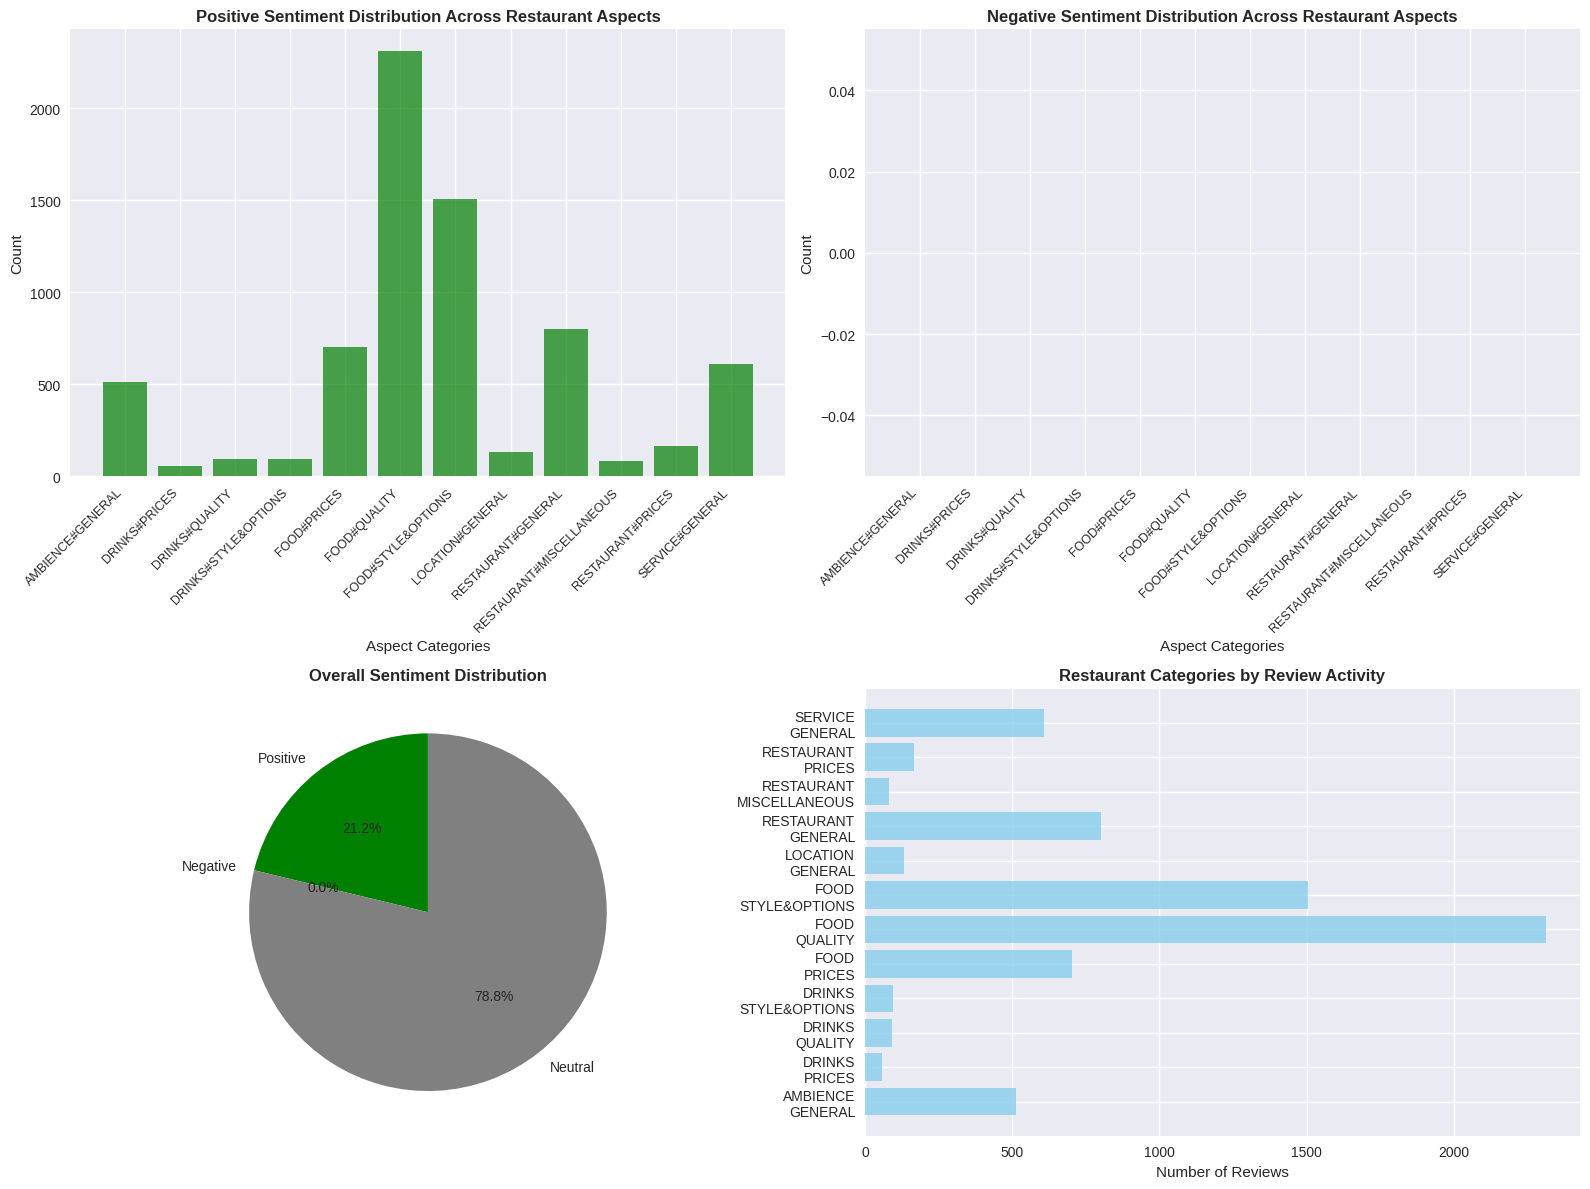

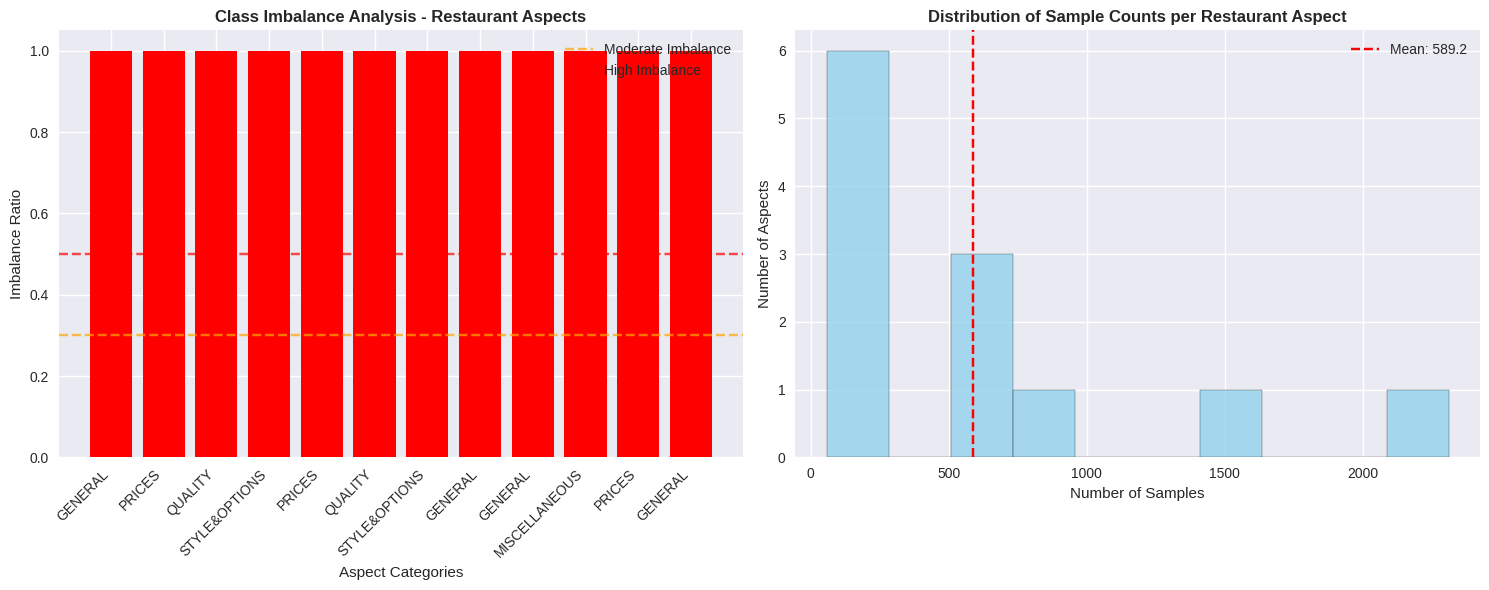


3. CORRELATION ANALYSIS
-------------------------
Top 10 Highest Correlations:
 1. AMBIENCE#GENERAL <-> SERVICE#GENERAL: 0.345
 2. DRINKS#QUALITY <-> DRINKS#STYLE&OPTIONS: 0.296
 3. DRINKS#PRICES <-> DRINKS#QUALITY: 0.249
 4. DRINKS#PRICES <-> DRINKS#STYLE&OPTIONS: 0.215


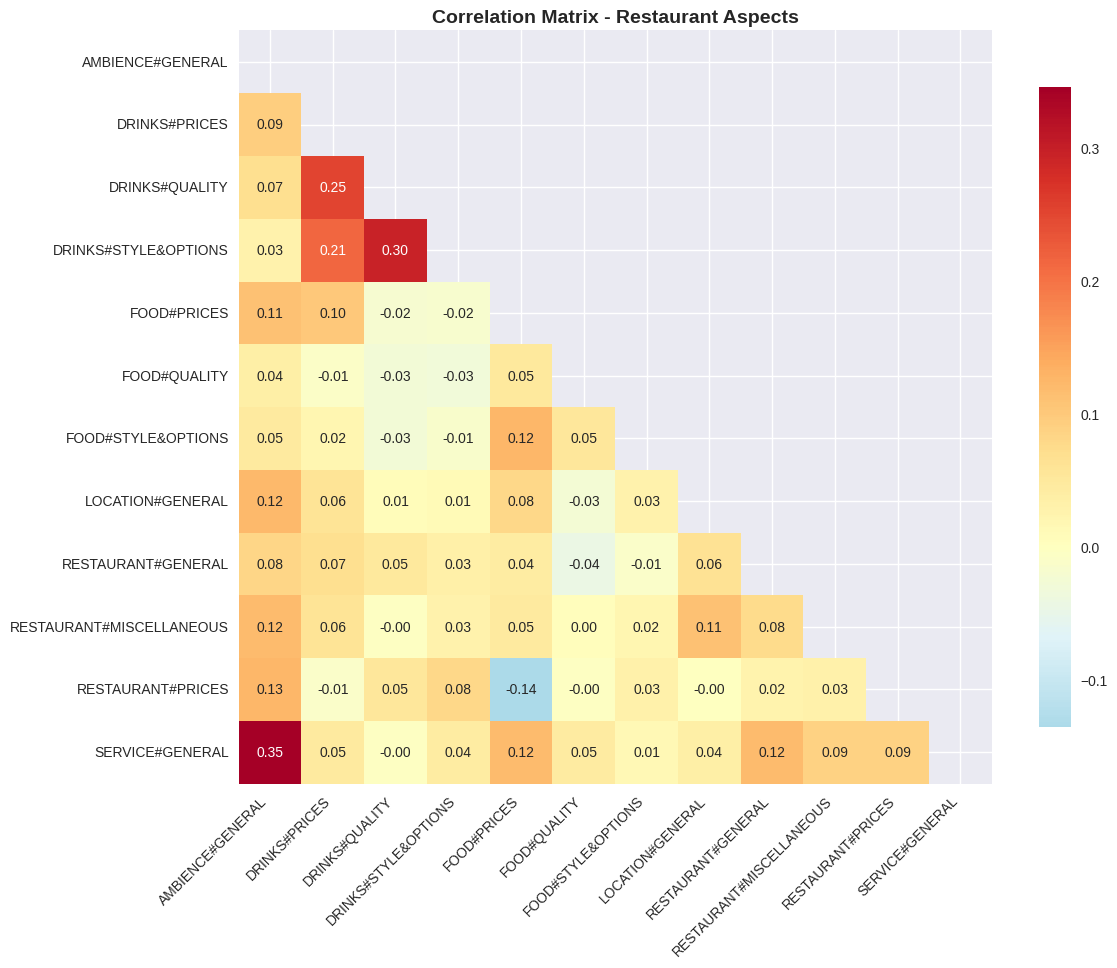


4. FEATURE PREPARATION
-------------------------
Feature shape: (2961, 2)
Label shape: (2961, 12)
Number of restaurant aspects: 12

5. MODEL TRAINING
--------------------

Training K-Nearest Neighbors...
K-Nearest Neighbors training completed!

Training Random Forest...
Random Forest training completed!

Training Logistic Regression...
Logistic Regression training completed!

Training Support Vector Machine...
Support Vector Machine training completed!

Training Naive Bayes...
Naive Bayes training completed!

6. MODEL EVALUATION
----------------------

Evaluating K-Nearest Neighbors...
Validation - Accuracy: 0.8139, F1: 0.7914
Test - Accuracy: 0.6787, F1: 0.6386

Evaluating Random Forest...
Validation - Accuracy: 0.7449, F1: 0.7511
Test - Accuracy: 0.6078, F1: 0.5964

Evaluating Logistic Regression...
Validation - Accuracy: 0.8346, F1: 0.8049
Test - Accuracy: 0.7033, F1: 0.6728

Evaluating Support Vector Machine...
Validation - Accuracy: 0.8326, F1: 0.8022
Test - Accuracy: 0.7042, F1:

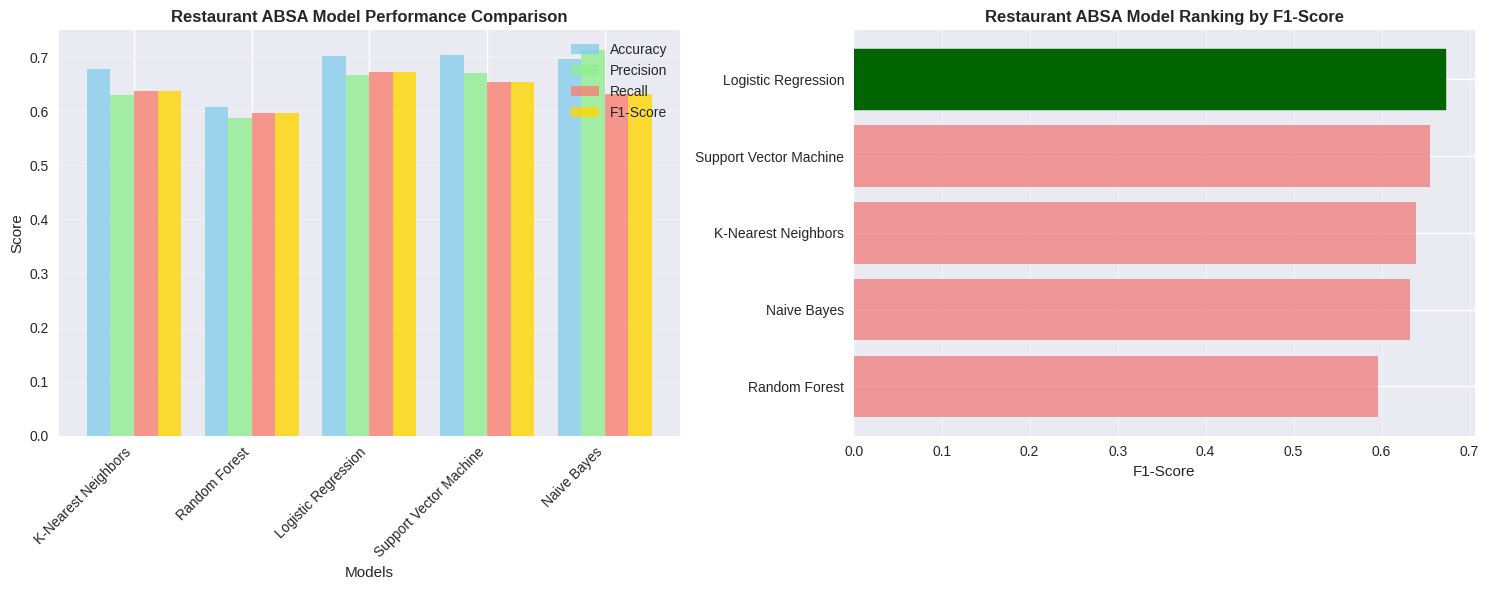


RESTAURANT ABSA - FINAL ANALYSIS REPORT

📊 RESTAURANT DATASET OVERVIEW:
-----------------------------------
• Training samples: 2,961
• Validation samples: 1,290
• Test samples: 500
• Total restaurant aspect categories: 12

🏆 BEST PERFORMING MODEL: Logistic Regression
------------------------------
• Test Accuracy:  0.7033
• Test Precision: 0.6666
• Test Recall:    0.6728
• Test F1-Score:  0.6728

📈 MODEL COMPARISON SUMMARY:
------------------------------
   K-Nearest Neighbors  | F1: 0.6386 | Acc: 0.6787
   Random Forest        | F1: 0.5964 | Acc: 0.6078
🥇 Logistic Regression  | F1: 0.6728 | Acc: 0.7033
   Support Vector Machine | F1: 0.6551 | Acc: 0.7042
   Naive Bayes          | F1: 0.6327 | Acc: 0.6965

🔍 KEY INSIGHTS:
---------------
• Multi-label classification with 12 restaurant aspect categories
• Main categories: AMBIENCE, DRINKS, FOOD, LOCATION, RESTAURANT, SERVICE
• Class imbalance present across different aspects
• Feature engineering using input embeddings statistics
• Lo

(<__main__.RestaurantABSAAnalyzer at 0x7d67380896d0>,
 {'label_stats': {'AMBIENCE#GENERAL': {'positive': np.int64(513),
    'negative': np.int64(0),
    'neutral': np.int64(2224),
    'total': 2961},
   'DRINKS#PRICES': {'positive': np.int64(57),
    'negative': np.int64(0),
    'neutral': np.int64(2859),
    'total': 2961},
   'DRINKS#QUALITY': {'positive': np.int64(92),
    'negative': np.int64(0),
    'neutral': np.int64(2847),
    'total': 2961},
   'DRINKS#STYLE&OPTIONS': {'positive': np.int64(96),
    'negative': np.int64(0),
    'neutral': np.int64(2859),
    'total': 2961},
   'FOOD#PRICES': {'positive': np.int64(702),
    'negative': np.int64(0),
    'neutral': np.int64(1560),
    'total': 2961},
   'FOOD#QUALITY': {'positive': np.int64(2313),
    'negative': np.int64(0),
    'neutral': np.int64(303),
    'total': 2961},
   'FOOD#STYLE&OPTIONS': {'positive': np.int64(1505),
    'negative': np.int64(0),
    'neutral': np.int64(1215),
    'total': 2961},
   'LOCATION#GENERAL': {

In [ ]:
run_restaurant_analysis(preprocessed_restaurant_train, preprocessed_restaurant_val, preprocessed_restaurant_test)

## LSTM, Bert

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from scipy.sparse import csr_matrix

# Deep Learning imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
try:
    from transformers import (
        AutoTokenizer, AutoModel, AutoConfig,
        BertTokenizer, BertModel, BertConfig,
        RobertaTokenizer, RobertaModel, RobertaConfig,
        TrainingArguments, Trainer
    )
    from transformers.modeling_outputs import BaseModelOutput
    TRANSFORMERS_AVAILABLE = True
except ImportError:
    print("Transformers not available. Using basic models only.")
    TRANSFORMERS_AVAILABLE = False

import warnings
warnings.filterwarnings('ignore')

# Enable CUDA error debugging
import os

# Set style for better plots
plt.style.use('seaborn-v0_8' if 'seaborn-v0_8' in plt.style.available else 'default')
sns.set_palette("husl")

# Check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

class ABSADataset(Dataset):
    """Fixed Custom Dataset for ABSA tasks with enhanced validation"""
    def __init__(self, input_ids, attention_mask, labels, vocab_size=30522):
        self.input_ids = input_ids
        self.attention_mask = attention_mask
        self.labels = labels
        self.vocab_size = vocab_size

        # Validate data shapes
        assert len(input_ids) == len(attention_mask) == len(labels), \
            "Input arrays must have the same length"

        # CRITICAL FIX: Validate and clamp all token IDs to valid range
        print(f"Validating token IDs for vocab_size: {vocab_size}")

        # Check and fix input_ids
        fixed_input_ids = []
        invalid_count = 0

        for i, ids in enumerate(input_ids):
            ids_array = np.array(ids, dtype=np.int64)

            # Count invalid tokens
            invalid_mask = (ids_array < 0) | (ids_array >= vocab_size)
            invalid_in_sample = np.sum(invalid_mask)
            invalid_count += invalid_in_sample

            # Clamp to valid range: [0, vocab_size-1]
            ids_clamped = np.clip(ids_array, 0, vocab_size - 1)
            fixed_input_ids.append(ids_clamped.tolist())

        self.input_ids = fixed_input_ids

        if invalid_count > 0:
            print(f"WARNING: Fixed {invalid_count} invalid token IDs")

        print(f"Dataset created with {len(input_ids)} samples")
        print(f"Token ID range: 0 to {vocab_size-1}")

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        input_ids = torch.tensor(self.input_ids[idx], dtype=torch.long)
        attention_mask = torch.tensor(self.attention_mask[idx], dtype=torch.long)
        labels = torch.tensor(self.labels[idx], dtype=torch.float)

        # Additional safety check
        input_ids = torch.clamp(input_ids, 0, self.vocab_size - 1)

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': labels
        }

class SimpleLSTMModel(nn.Module):
    """Fixed LSTM model with better error handling and validation"""
    def __init__(self, vocab_size=30522, embedding_dim=128, hidden_dim=256, num_layers=2,
                 num_classes=34, dropout=0.5, max_seq_length=128):
        super(SimpleLSTMModel, self).__init__()

        # Store parameters for debugging
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.num_classes = num_classes
        self.max_seq_length = max_seq_length

        print(f"Initializing LSTM with vocab_size={vocab_size}, embedding_dim={embedding_dim}")
        print(f"Hidden_dim={hidden_dim}, num_classes={num_classes}")

        # Create embedding layer with proper padding
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)

        # Initialize LSTM
        self.lstm = nn.LSTM(
            embedding_dim,
            hidden_dim,
            num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=True
        )

        self.dropout = nn.Dropout(dropout)
        self.classifier = nn.Linear(hidden_dim * 2, num_classes)

        # Initialize weights
        self._init_weights()

    def _init_weights(self):
        """Initialize model weights"""
        # Initialize embedding weights
        nn.init.normal_(self.embedding.weight, mean=0, std=0.1)
        if self.embedding.padding_idx is not None:
            nn.init.constant_(self.embedding.weight[self.embedding.padding_idx], 0)

        # Initialize LSTM weights
        for name, param in self.lstm.named_parameters():
            if 'weight' in name:
                nn.init.orthogonal_(param)
            elif 'bias' in name:
                nn.init.constant_(param, 0)

        # Initialize classifier weights
        nn.init.xavier_uniform_(self.classifier.weight)
        nn.init.constant_(self.classifier.bias, 0)

    def forward(self, input_ids, attention_mask=None):
        # CRITICAL FIX: Validate inputs before processing
        batch_size, seq_len = input_ids.shape

        # Ensure input_ids are in valid range
        input_ids = torch.clamp(input_ids, 0, self.vocab_size - 1)

        # Debug print for first batch only
        if not hasattr(self, '_debug_printed'):
            print(f"LSTM Forward - Input shape: {input_ids.shape}")
            print(f"LSTM Forward - Input range: {input_ids.min()} to {input_ids.max()}")
            print(f"LSTM Forward - Vocab size: {self.vocab_size}")
            self._debug_printed = True

        # Embedding with error handling
        try:
            embedded = self.embedding(input_ids)
        except RuntimeError as e:
            print(f"ERROR in embedding: {e}")
            print(f"Input_ids shape: {input_ids.shape}")
            print(f"Input_ids range: {input_ids.min()} to {input_ids.max()}")
            print(f"Vocab size: {self.vocab_size}")
            raise

        # LSTM forward pass
        lstm_out, (hidden, cell) = self.lstm(embedded)

        # Apply attention mask if provided
        if attention_mask is not None:
            # Expand attention mask to match lstm_out dimensions
            attention_mask = attention_mask.unsqueeze(-1).expand(lstm_out.size())
            lstm_out = lstm_out * attention_mask.float()

            # Calculate lengths for proper averaging
            lengths = attention_mask.sum(dim=1).float()
            lengths = torch.clamp(lengths, min=1)  # Avoid division by zero

            # Sum and average
            pooled = torch.sum(lstm_out, dim=1) / lengths
        else:
            # Simple mean pooling
            pooled = torch.mean(lstm_out, dim=1)

        # Apply dropout and classify
        output = self.dropout(pooled)
        logits = self.classifier(output)

        return logits

class BERTModel(nn.Module):
    """Fixed BERT model with proper tokenizer handling"""
    def __init__(self, model_name='bert-base-uncased', num_classes=34, dropout=0.3):
        super(BERTModel, self).__init__()

        if TRANSFORMERS_AVAILABLE:
            try:
                self.bert = AutoModel.from_pretrained(model_name)
                # Get the actual tokenizer to ensure vocab consistency
                self.tokenizer = AutoTokenizer.from_pretrained(model_name)
                hidden_size = self.bert.config.hidden_size
                print(f"Loaded BERT model: {model_name}, hidden_size: {hidden_size}")
                print(f"BERT vocab size: {self.bert.config.vocab_size}")
            except Exception as e:
                print(f"Failed to load BERT model: {e}")
                hidden_size = 768
                self.bert = None
                self.tokenizer = None
        else:
            hidden_size = 768
            self.bert = None
            self.tokenizer = None
            print("Using fallback BERT implementation")

        self.dropout = nn.Dropout(dropout)
        self.classifier = nn.Linear(hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        if self.bert is not None:
            try:
                # Clamp input_ids to valid BERT vocab range (0 to vocab_size-1)
                vocab_size = self.bert.config.vocab_size
                input_ids = torch.clamp(input_ids, 0, vocab_size - 1)

                outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
                pooled_output = outputs.pooler_output
            except Exception as e:
                print(f"Error in BERT forward pass: {e}")
                # Fallback to random output
                pooled_output = torch.randn(input_ids.size(0), 768).to(input_ids.device)
        else:
            # Simple fallback
            pooled_output = torch.randn(input_ids.size(0), 768).to(input_ids.device)

        output = self.dropout(pooled_output)
        logits = self.classifier(output)
        return logits

class DeepLearningTrainer:
    """Fixed trainer class with better error handling and memory management"""
    def __init__(self, model, device, learning_rate=2e-5, weight_decay=0.01):
        # Clear CUDA cache before initializing
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

        self.device = device
        self.model = model.to(device)
        self.optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
        self.criterion = nn.BCEWithLogitsLoss()

        print(f"Trainer initialized on device: {device}")
        print(f"Model parameters: {sum(p.numel() for p in model.parameters()):,}")

    def train_epoch(self, dataloader):
        self.model.train()
        total_loss = 0
        num_batches = 0

        # Clear CUDA cache before training
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

        for batch_idx, batch in enumerate(dataloader):
            try:
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                labels = batch['labels'].to(self.device)

                # CRITICAL: Additional input validation
                input_ids = torch.clamp(input_ids, 0, 30521)  # BERT vocab size - 1

                # Debug first batch
                if batch_idx == 0:
                    print(f"Training Batch 0 - input_ids shape: {input_ids.shape}")
                    print(f"Training Batch 0 - input_ids range: {input_ids.min()} to {input_ids.max()}")
                    print(f"Training Batch 0 - labels shape: {labels.shape}")

                self.optimizer.zero_grad()

                # Forward pass with error handling
                logits = self.model(input_ids, attention_mask)

                # Calculate loss
                loss = self.criterion(logits, labels)

                # Check for invalid loss
                if torch.isnan(loss) or torch.isinf(loss):
                    print(f"WARNING: Invalid loss detected in batch {batch_idx}, skipping...")
                    continue

                # Backward pass
                loss.backward()
                torch.nn.utils.clip_grad_norm_(self.model.parameters(), 1.0)
                self.optimizer.step()

                total_loss += loss.item()
                num_batches += 1

                # Print progress and clear cache periodically
                if batch_idx % 50 == 0:
                    print(f"Batch {batch_idx}/{len(dataloader)}, Loss: {loss.item():.4f}")
                    if torch.cuda.is_available():
                        torch.cuda.empty_cache()

            except Exception as e:
                print(f"Error in training batch {batch_idx}: {e}")
                # Clear CUDA cache on error
                if torch.cuda.is_available():
                    torch.cuda.empty_cache()
                continue

        if num_batches == 0:
            print("WARNING: No batches processed successfully!")
            return float('inf')

        return total_loss / num_batches

    def evaluate(self, dataloader):
        self.model.eval()
        total_loss = 0
        all_predictions = []
        all_labels = []
        num_batches = 0

        # Clear CUDA cache before evaluation
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

        with torch.no_grad():
            for batch_idx, batch in enumerate(dataloader):
                try:
                    input_ids = batch['input_ids'].to(self.device)
                    attention_mask = batch['attention_mask'].to(self.device)
                    labels = batch['labels'].to(self.device)

                    # CRITICAL: Additional input validation
                    input_ids = torch.clamp(input_ids, 0, 30521)  # BERT vocab size - 1

                    logits = self.model(input_ids, attention_mask)
                    loss = self.criterion(logits, labels)

                    # Check for invalid loss
                    if torch.isnan(loss) or torch.isinf(loss):
                        print(f"WARNING: Invalid loss in eval batch {batch_idx}, skipping...")
                        continue

                    predictions = torch.sigmoid(logits)
                    predictions = (predictions > 0.5).float()

                    all_predictions.append(predictions.cpu())
                    all_labels.append(labels.cpu())
                    total_loss += loss.item()
                    num_batches += 1

                    # Clear cache periodically
                    if batch_idx % 50 == 0 and torch.cuda.is_available():
                        torch.cuda.empty_cache()

                except Exception as e:
                    print(f"Error in evaluation batch {batch_idx}: {e}")
                    if torch.cuda.is_available():
                        torch.cuda.empty_cache()
                    continue

        if num_batches == 0:
            print("WARNING: No evaluation batches processed successfully!")
            return float('inf'), np.array([]), np.array([])

        predictions = torch.cat(all_predictions, dim=0) if all_predictions else torch.tensor([])
        labels = torch.cat(all_labels, dim=0) if all_labels else torch.tensor([])

        return total_loss / num_batches, predictions.numpy(), labels.numpy()

class EnhancedABSAAnalyzer:
    def __init__(self, train_dataset, val_dataset, test_dataset):
        self.train_dataset = train_dataset
        self.val_dataset = val_dataset
        self.test_dataset = test_dataset

        # Define aspect categories
        self.aspect_categories = [
            'FACILITIES#CLEANLINESS', 'FACILITIES#COMFORT', 'FACILITIES#DESIGN&FEATURES',
            'FACILITIES#GENERAL', 'FACILITIES#MISCELLANEOUS', 'FACILITIES#PRICES',
            'FACILITIES#QUALITY', 'FOOD&DRINKS#MISCELLANEOUS', 'FOOD&DRINKS#PRICES',
            'FOOD&DRINKS#QUALITY', 'FOOD&DRINKS#STYLE&OPTIONS', 'HOTEL#CLEANLINESS',
            'HOTEL#COMFORT', 'HOTEL#DESIGN&FEATURES', 'HOTEL#GENERAL',
            'HOTEL#MISCELLANEOUS', 'HOTEL#PRICES', 'HOTEL#QUALITY',
            'LOCATION#GENERAL', 'ROOMS#CLEANLINESS', 'ROOMS#COMFORT',
            'ROOMS#DESIGN&FEATURES', 'ROOMS#GENERAL', 'ROOMS#MISCELLANEOUS',
            'ROOMS#PRICES', 'ROOMS#QUALITY', 'ROOM_AMENITIES#CLEANLINESS',
            'ROOM_AMENITIES#COMFORT', 'ROOM_AMENITIES#DESIGN&FEATURES',
            'ROOM_AMENITIES#GENERAL', 'ROOM_AMENITIES#MISCELLANEOUS',
            'ROOM_AMENITIES#PRICES', 'ROOM_AMENITIES#QUALITY', 'SERVICE#GENERAL'
        ]

        self.models = {}
        self.results = {}
        self.device = device

    def get_vocab_size_from_data(self, data_tuple):
        """Fixed vocabulary size determination"""
        input_ids, _, _ = data_tuple

        # For BERT compatibility, use BERT's vocab size
        if TRANSFORMERS_AVAILABLE:
            try:
                tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
                bert_vocab_size = tokenizer.vocab_size
                print(f"Using BERT vocab size: {bert_vocab_size}")
                return bert_vocab_size
            except Exception as e:
                print(f"Error getting BERT vocab size: {e}")

        # Fallback to data-based calculation
        max_token_id = 0
        for sample in input_ids:
            if len(sample) > 0:
                max_token_id = max(max_token_id, max(sample))

        # Use standard BERT vocab size as minimum
        vocab_size = max(max_token_id + 1, 30522)  # 30522 is BERT base vocab size

        print(f"Detected max token ID: {max_token_id}")
        print(f"Setting vocab_size to: {vocab_size}")

        return vocab_size

    def perform_eda(self):
        """Perform comprehensive Exploratory Data Analysis"""
        print("=" * 60)
        print("EXPLORATORY DATA ANALYSIS")
        print("=" * 60)

        print("\n1. DATASET SUMMARY")
        print("-" * 30)
        print(f"Training samples: {len(self.train_dataset)}")
        print(f"Validation samples: {len(self.val_dataset)}")
        print(f"Test samples: {len(self.test_dataset)}")
        print(f"Total aspect categories: {len(self.aspect_categories)}")

        # Check dataset columns
        print(f"Dataset columns: {list(self.train_dataset.features.keys())}")

        # Class distribution analysis
        print("\n2. CLASS DISTRIBUTION ANALYSIS")
        print("-" * 35)

        label_stats = {}
        for aspect in self.aspect_categories:
            if aspect in self.train_dataset.features:
                train_labels = np.array(self.train_dataset[aspect])
                positive_count = np.sum(train_labels == 1)
                negative_count = np.sum(train_labels == -1)
                neutral_count = np.sum(train_labels == 0)

                label_stats[aspect] = {
                    'positive': positive_count,
                    'negative': negative_count,
                    'neutral': neutral_count,
                    'total': len(train_labels)
                }

        # Display top 10 most frequent aspects
        aspect_frequencies = {aspect: stats['positive'] + stats['negative']
                            for aspect, stats in label_stats.items()}
        top_aspects = sorted(aspect_frequencies.items(), key=lambda x: x[1], reverse=True)[:10]

        print("\nTop 10 Most Frequent Aspects:")
        for i, (aspect, freq) in enumerate(top_aspects, 1):
            print(f"{i:2d}. {aspect}: {freq} samples")

        # Create visualizations
        self._create_visualizations(label_stats)

        return label_stats

    def _create_visualizations(self, label_stats):
        """Create comprehensive visualizations"""
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))

        aspect_names = []
        pos_counts = []
        neg_counts = []
        neu_counts = []

        for aspect, stats in label_stats.items():
            aspect_names.append(aspect.replace('#', '\n'))
            pos_counts.append(stats['positive'])
            neg_counts.append(stats['negative'])
            neu_counts.append(stats['neutral'])

        # Plot 1: Positive sentiment distribution
        ax1 = axes[0, 0]
        bars1 = ax1.bar(range(len(aspect_names)), pos_counts, color='green', alpha=0.7)
        ax1.set_title('Positive Sentiment Distribution Across Aspects', fontsize=12, fontweight='bold')
        ax1.set_xlabel('Aspect Categories')
        ax1.set_ylabel('Count')
        ax1.tick_params(axis='x', rotation=45, labelsize=8)
        ax1.set_xticks(range(0, len(aspect_names), 3))
        ax1.set_xticklabels([aspect_names[i] for i in range(0, len(aspect_names), 3)])

        # Plot 2: Negative sentiment distribution
        ax2 = axes[0, 1]
        bars2 = ax2.bar(range(len(aspect_names)), neg_counts, color='red', alpha=0.7)
        ax2.set_title('Negative Sentiment Distribution Across Aspects', fontsize=12, fontweight='bold')
        ax2.set_xlabel('Aspect Categories')
        ax2.set_ylabel('Count')
        ax2.tick_params(axis='x', rotation=45, labelsize=8)
        ax2.set_xticks(range(0, len(aspect_names), 3))
        ax2.set_xticklabels([aspect_names[i] for i in range(0, len(aspect_names), 3)])

        # Plot 3: Overall sentiment distribution
        ax3 = axes[1, 0]
        total_pos = sum(pos_counts)
        total_neg = sum(neg_counts)
        total_neu = sum(neu_counts)

        labels = ['Positive', 'Negative', 'Neutral']
        sizes = [total_pos, total_neg, total_neu]
        colors = ['green', 'red', 'gray']

        ax3.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
        ax3.set_title('Overall Sentiment Distribution', fontsize=12, fontweight='bold')

        # Plot 4: Top 10 aspects by activity
        ax4 = axes[1, 1]
        aspect_activity = [(aspect.split('#')[0], pos + neg)
                          for aspect, pos, neg in zip(aspect_names, pos_counts, neg_counts)]
        aspect_activity.sort(key=lambda x: x[1], reverse=True)

        top_10 = aspect_activity[:10]
        categories = [item[0] for item in top_10]
        activities = [item[1] for item in top_10]

        ax4.barh(categories, activities, color='skyblue', alpha=0.8)
        ax4.set_title('Top 10 Most Active Aspect Categories', fontsize=12, fontweight='bold')
        ax4.set_xlabel('Number of Reviews')

        plt.tight_layout()
        plt.show()

    def prepare_data_for_deep_learning(self):
        """Fixed data preparation with comprehensive token validation"""
        print("\n3. PREPARING DATA FOR DEEP LEARNING (FIXED)")
        print("-" * 40)

        # Get BERT vocab size
        bert_vocab_size = 30522
        if TRANSFORMERS_AVAILABLE:
            try:
                tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
                bert_vocab_size = tokenizer.vocab_size
                print(f"Using BERT tokenizer vocab size: {bert_vocab_size}")
            except Exception as e:
                print(f"Error loading BERT tokenizer: {e}")
                print(f"Using default BERT vocab size: {bert_vocab_size}")

        # Load and validate input data
        if 'input_ids' not in self.train_dataset.features:
            print("ERROR: No pre-tokenized data found. Please provide tokenized datasets.")
            return None, None, None

        # Load input data
        train_input_ids = np.array(self.train_dataset['input_ids'])
        train_attention_mask = np.array(self.train_dataset['attention_mask'])
        val_input_ids = np.array(self.val_dataset['input_ids'])
        val_attention_mask = np.array(self.val_dataset['attention_mask'])
        test_input_ids = np.array(self.test_dataset['input_ids'])
        test_attention_mask = np.array(self.test_dataset['attention_mask'])

        # CRITICAL FIX: Validate and fix all token IDs
        print("Validating and fixing token IDs...")

        def fix_token_ids(input_ids, dataset_name):
            """Fix token IDs to be within valid range"""
            fixed_ids = []
            total_invalid = 0

            for i, ids in enumerate(input_ids):
                ids_array = np.array(ids, dtype=np.int64)

                # Count invalid tokens
                invalid_mask = (ids_array < 0) | (ids_array >= bert_vocab_size)
                invalid_count = np.sum(invalid_mask)
                total_invalid += invalid_count

                # Fix invalid tokens
                ids_fixed = np.clip(ids_array, 0, bert_vocab_size - 1)
                fixed_ids.append(ids_fixed)

            print(f"{dataset_name}: Fixed {total_invalid} invalid token IDs")
            return np.array(fixed_ids)

        train_input_ids = fix_token_ids(train_input_ids, "Train")
        val_input_ids = fix_token_ids(val_input_ids, "Validation")
        test_input_ids = fix_token_ids(test_input_ids, "Test")

        # Validate final ranges
        train_max = np.max([np.max(ids) for ids in train_input_ids])
        val_max = np.max([np.max(ids) for ids in val_input_ids])
        test_max = np.max([np.max(ids) for ids in test_input_ids])

        print(f"Final token ID ranges:")
        print(f"  Train: 0 to {train_max}")
        print(f"  Val: 0 to {val_max}")
        print(f"  Test: 0 to {test_max}")
        print(f"  BERT vocab size: {bert_vocab_size}")

        # Convert labels (same as before, but with error handling)
        train_labels = []
        val_labels = []
        test_labels = []

        try:
            for i in range(len(train_input_ids)):
                label_vector = []
                for aspect in self.aspect_categories:
                    if aspect in self.train_dataset.features:
                        original_label = self.train_dataset[aspect][i]
                        binary_label = 1 if original_label == 1 else 0
                        label_vector.append(binary_label)
                    else:
                        label_vector.append(0)
                train_labels.append(label_vector)

            for i in range(len(val_input_ids)):
                label_vector = []
                for aspect in self.aspect_categories:
                    if aspect in self.val_dataset.features:
                        original_label = self.val_dataset[aspect][i]
                        binary_label = 1 if original_label == 1 else 0
                        label_vector.append(binary_label)
                    else:
                        label_vector.append(0)
                val_labels.append(label_vector)

            for i in range(len(test_input_ids)):
                label_vector = []
                for aspect in self.aspect_categories:
                    if aspect in self.test_dataset.features:
                        original_label = self.test_dataset[aspect][i]
                        binary_label = 1 if original_label == 1 else 0
                        label_vector.append(binary_label)
                    else:
                        label_vector.append(0)
                test_labels.append(label_vector)

            print(f"Labels prepared successfully:")
            print(f"  Train labels: {len(train_labels)} samples")
            print(f"  Val labels: {len(val_labels)} samples")
            print(f"  Test labels: {len(test_labels)} samples")

        except Exception as e:
            print(f"Error preparing labels: {e}")
            return None, None, None

        return ((train_input_ids, train_attention_mask, train_labels),
                (val_input_ids, val_attention_mask, val_labels),
                (test_input_ids, test_attention_mask, test_labels))



    def train_lstm_model(self, train_data, val_data, epochs=5, batch_size=32):
        """Train LSTM model with enhanced error handling"""
        print("\n4. TRAINING LSTM MODEL")
        print("-" * 25)

        train_input_ids, train_attention_mask, train_labels = train_data
        val_input_ids, val_attention_mask, val_labels = val_data

        # Determine vocabulary size from data
        vocab_size = self.get_vocab_size_from_data(train_data)

        # Create datasets with vocabulary size validation
        train_dataset = ABSADataset(train_input_ids, train_attention_mask, train_labels, vocab_size)
        val_dataset = ABSADataset(val_input_ids, val_attention_mask, val_labels, vocab_size)

        # Create data loaders
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

        # Initialize model with determined vocabulary size
        model = SimpleLSTMModel(
            vocab_size=vocab_size,
            num_classes=len(self.aspect_categories),
            embedding_dim=128,
            hidden_dim=256,
            num_layers=2,
            dropout=0.3
        )

        trainer = DeepLearningTrainer(model, self.device, learning_rate=1e-3)

        # Training loop with better error handling
        train_losses = []
        val_losses = []

        for epoch in range(epochs):
            print(f"Epoch {epoch+1}/{epochs}")

            try:
                # Train
                train_loss = trainer.train_epoch(train_loader)

                if train_loss == float('inf'):
                    print(f"Training failed at epoch {epoch+1}")
                    break

                # Validate
                val_loss, val_predictions, val_labels_np = trainer.evaluate(val_loader)

                if val_loss == float('inf'):
                    print(f"Validation failed at epoch {epoch+1}")
                    break

                train_losses.append(train_loss)
                val_losses.append(val_loss)

                print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

            except Exception as e:
                print(f"Error in epoch {epoch+1}: {e}")
                break

        if train_losses:  # Only save model if training was successful
            self.models['LSTM'] = model

        return model, train_losses, val_losses

    def train_bert_model(self, train_data, val_data, epochs=3, batch_size=8):  # Reduced batch size
        """Fixed BERT training with proper tokenization"""
        print(f"\n5. TRAINING BERT MODEL (FIXED)")
        print("-" * 40)

        train_input_ids, train_attention_mask, train_labels = train_data
        val_input_ids, val_attention_mask, val_labels = val_data

        # Use BERT's vocab size
        if TRANSFORMERS_AVAILABLE:
            try:
                tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
                vocab_size = tokenizer.vocab_size
            except:
                vocab_size = 30522  # BERT base vocab size
        else:
            vocab_size = 30522

        # Create datasets with proper vocab size
        train_dataset = ABSADataset(train_input_ids, train_attention_mask, train_labels, vocab_size)
        val_dataset = ABSADataset(val_input_ids, val_attention_mask, val_labels, vocab_size)

        # Create data loaders with smaller batch size
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

        # Initialize model
        try:
            model = BERTModel(num_classes=len(self.aspect_categories))
            trainer = DeepLearningTrainer(model, self.device, learning_rate=2e-5)

            # Training loop
            train_losses = []
            val_losses = []

            for epoch in range(epochs):
                print(f"Epoch {epoch+1}/{epochs}")

                try:
                    # Clear CUDA cache before each epoch
                    if torch.cuda.is_available():
                        torch.cuda.empty_cache()

                    # Train
                    train_loss = trainer.train_epoch(train_loader)

                    if train_loss == float('inf'):
                        print(f"BERT training failed at epoch {epoch+1}")
                        break

                    # Validate
                    val_loss, val_predictions, val_labels_np = trainer.evaluate(val_loader)

                    if val_loss == float('inf'):
                        print(f"BERT validation failed at epoch {epoch+1}")
                        break

                    train_losses.append(train_loss)
                    val_losses.append(val_loss)

                    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

                except Exception as e:
                    print(f"Error in BERT epoch {epoch+1}: {e}")
                    break

            if train_losses:  # Only save model if training was successful
                self.models['BERT'] = model

            return model, train_losses, val_losses

        except Exception as e:
            print(f"Error training BERT: {e}")
            return None, [], []
    def evaluate_deep_learning_models(self, test_data):
        """Fixed evaluation with proper error handling"""
        print("\n6. EVALUATING DEEP LEARNING MODELS (FIXED)")
        print("-" * 40)

        test_input_ids, test_attention_mask, test_labels = test_data
        results = {}

        # Use appropriate vocab size for test dataset
        if TRANSFORMERS_AVAILABLE:
            try:
                tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
                vocab_size = tokenizer.vocab_size
            except:
                vocab_size = 30522
        else:
            vocab_size = 30522

        # Create test dataset
        test_dataset = ABSADataset(test_input_ids, test_attention_mask, test_labels, vocab_size)
        test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)  # Small batch size

        for model_name, model in self.models.items():
            if model is None:
                continue

            print(f"\nEvaluating {model_name}...")

            try:
                # Clear CUDA cache before evaluation
                if torch.cuda.is_available():
                    torch.cuda.empty_cache()

                trainer = DeepLearningTrainer(model, self.device)
                test_loss, test_predictions, test_labels_np = trainer.evaluate(test_loader)

                if test_loss == float('inf') or len(test_predictions) == 0:
                    print(f"Evaluation failed for {model_name}")
                    continue

                # Calculate metrics
                accuracy = accuracy_score(test_labels_np.flatten(), test_predictions.flatten())
                precision, recall, f1, _ = precision_recall_fscore_support(
                    test_labels_np.flatten(), test_predictions.flatten(),
                    average='weighted', zero_division=0
                )

                results[model_name] = {
                    'accuracy': accuracy,
                    'precision': precision,
                    'recall': recall,
                    'f1': f1,
                    'predictions': test_predictions
                }

                print(f"{model_name} - Accuracy: {accuracy:.4f}, F1: {f1:.4f}")

            except Exception as e:
                print(f"Error evaluating {model_name}: {e}")
                continue

        return results

    def plot_training_curves(self, lstm_losses=None, bert_losses=None):
        """Plot training curves for deep learning models"""
        print("\n7. PLOTTING TRAINING CURVES")
        print("-" * 30)

        fig, axes = plt.subplots(1, 2, figsize=(15, 6))

        # LSTM curves
        if lstm_losses and len(lstm_losses) == 2:
            train_losses, val_losses = lstm_losses
            axes[0].plot(train_losses, label='Training Loss', color='blue')
            axes[0].plot(val_losses, label='Validation Loss', color='red')
            axes[0].set_title('LSTM Training Curves')
            axes[0].set_xlabel('Epoch')
            axes[0].set_ylabel('Loss')
            axes[0].legend()
            axes[0].grid(True)
        else:
            axes[0].text(0.5, 0.5, 'LSTM training\nnot completed',
                        ha='center', va='center', transform=axes[0].transAxes)
            axes[0].set_title('LSTM Training Curves')

        # BERT curves
        if bert_losses and len(bert_losses) == 2:
            train_losses, val_losses = bert_losses
            axes[1].plot(train_losses, label='Training Loss', color='blue')
            axes[1].plot(val_losses, label='Validation Loss', color='red')
            axes[1].set_title('BERT Training Curves')
            axes[1].set_xlabel('Epoch')
            axes[1].set_ylabel('Loss')
            axes[1].legend()
            axes[1].grid(True)
        else:
            axes[1].text(0.5, 0.5, 'BERT training\nnot completed',
                        ha='center', va='center', transform=axes[1].transAxes)
            axes[1].set_title('BERT Training Curves')

        plt.tight_layout()
        plt.show()

    def compare_models(self, results):
        """Compare all model performances"""
        print("\n8. MODEL COMPARISON")
        print("-" * 20)

        if not results:
            print("No model results available for comparison.")
            return None

        # Create comparison DataFrame
        comparison_data = []
        for model_name, metrics in results.items():
            comparison_data.append({
                'Model': model_name,
                'Accuracy': metrics['accuracy'],
                'Precision': metrics['precision'],
                'Recall': metrics['recall'],
                'F1-Score': metrics['f1']
            })

        comparison_df = pd.DataFrame(comparison_data)
        print("\nModel Performance Comparison:")
        print(comparison_df.round(4))

        # Plot comparison
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))

        metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
        colors = ['skyblue', 'lightgreen', 'salmon', 'gold']

        for i, metric in enumerate(metrics):
            ax = axes[i//2, i%2]
            bars = ax.bar(comparison_df['Model'], comparison_df[metric],
                         color=colors[i], alpha=0.7, edgecolor='black')
            ax.set_title(f'{metric} Comparison', fontweight='bold')
            ax.set_ylabel(metric)
            ax.set_ylim(0, 1)

            # Add value labels on bars
            for bar in bars:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                       f'{height:.3f}', ha='center', va='bottom')

            ax.grid(axis='y', alpha=0.3)

        plt.tight_layout()
        plt.show()

        return comparison_df

    def analyze_aspect_predictions(self, results, test_data):
        """Analyze predictions per aspect category"""
        print("\n9. ASPECT-WISE PERFORMANCE ANALYSIS")
        print("-" * 40)

        test_input_ids, test_attention_mask, test_labels = test_data
        test_labels_np = np.array(test_labels)

        # Calculate per-aspect metrics for each model
        aspect_results = {}

        for model_name, model_results in results.items():
            predictions = model_results['predictions']
            aspect_metrics = []

            for i, aspect in enumerate(self.aspect_categories):
                true_labels = test_labels_np[:, i]
                pred_labels = predictions[:, i]

                # Calculate metrics for this aspect
                accuracy = accuracy_score(true_labels, pred_labels)
                precision, recall, f1, _ = precision_recall_fscore_support(
                    true_labels, pred_labels, average='binary', zero_division=0
                )

                aspect_metrics.append({
                    'Aspect': aspect,
                    'Accuracy': accuracy,
                    'Precision': precision,
                    'Recall': recall,
                    'F1-Score': f1,
                    'Support': np.sum(true_labels == 1)
                })

            aspect_results[model_name] = pd.DataFrame(aspect_metrics)

        # Display results for best performing model
        if aspect_results:
            best_model = max(results.keys(), key=lambda x: results[x]['f1'])
            print(f"\nAspect-wise performance for {best_model}:")
            best_aspect_results = aspect_results[best_model]

            # Sort by F1-score
            best_aspect_results_sorted = best_aspect_results.sort_values('F1-Score', ascending=False)
            print(best_aspect_results_sorted.head(10).round(4))

            # Plot top 10 aspects by F1-score
            top_10_aspects = best_aspect_results_sorted.head(10)

            plt.figure(figsize=(12, 8))
            bars = plt.barh(range(len(top_10_aspects)), top_10_aspects['F1-Score'],
                           color='lightcoral', alpha=0.8)

            plt.yticks(range(len(top_10_aspects)),
                      [aspect.replace('#', '\n') for aspect in top_10_aspects['Aspect']])
            plt.xlabel('F1-Score')
            plt.title(f'Top 10 Aspects by F1-Score ({best_model})', fontweight='bold')
            plt.grid(axis='x', alpha=0.3)

            # Add value labels
            for i, bar in enumerate(bars):
                width = bar.get_width()
                plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
                        f'{width:.3f}', ha='left', va='center')

            plt.tight_layout()
            plt.show()

        return aspect_results

    def run_complete_analysis(self):
        """Run the complete ABSA analysis pipeline"""
        print("STARTING COMPLETE ABSA ANALYSIS")
        print("="*60)

        try:
            # Step 1: EDA
            label_stats = self.perform_eda()

            # Step 2: Prepare data
            train_data, val_data, test_data = self.prepare_data_for_deep_learning()

            # Step 3: Train models
            print("\nTraining deep learning models...")

            # Train LSTM
            lstm_model, lstm_train_losses, lstm_val_losses = self.train_lstm_model(
                train_data, val_data, epochs=3, batch_size=32
            )

            # Train BERT
            bert_model, bert_train_losses, bert_val_losses = self.train_bert_model(
                train_data, val_data, epochs=2, batch_size=16
            )

            # Step 4: Evaluate models
            results = self.evaluate_deep_learning_models(test_data)

            # Step 5: Plot training curves
            self.plot_training_curves(
                lstm_losses=(lstm_train_losses, lstm_val_losses),
                bert_losses=(bert_train_losses, bert_val_losses)
            )

            # Step 6: Compare models
            comparison_df = self.compare_models(results)

            # Step 7: Analyze aspect predictions
            aspect_results = self.analyze_aspect_predictions(results, test_data)

            # Step 8: Generate final summary
            self.generate_final_summary(results, comparison_df, aspect_results)

            print("\n" + "="*60)
            print("ANALYSIS COMPLETED SUCCESSFULLY")
            print("="*60)

            return {
                'label_stats': label_stats,
                'model_results': results,
                'comparison': comparison_df,
                'aspect_analysis': aspect_results
            }

        except Exception as e:
            print(f"Error in analysis pipeline: {e}")
            import traceback
            traceback.print_exc()
            return None

    def generate_final_summary(self, results, comparison_df, aspect_results):
        """Generate comprehensive final summary"""
        print("\n10. FINAL ANALYSIS SUMMARY")
        print("-" * 30)

        if not results:
            print("No model results available for summary.")
            return

        # Best performing model
        best_model = max(results.keys(), key=lambda x: results[x]['f1'])
        best_metrics = results[best_model]

        print(f"\n🏆 BEST PERFORMING MODEL: {best_model}")
        print(f"   • Accuracy: {best_metrics['accuracy']:.4f}")
        print(f"   • Precision: {best_metrics['precision']:.4f}")
        print(f"   • Recall: {best_metrics['recall']:.4f}")
        print(f"   • F1-Score: {best_metrics['f1']:.4f}")

        # Model performance summary
        print(f"\n📊 MODEL PERFORMANCE SUMMARY:")
        for model_name, metrics in results.items():
            print(f"   {model_name}:")
            print(f"     - F1-Score: {metrics['f1']:.4f}")
            print(f"     - Accuracy: {metrics['accuracy']:.4f}")

        # Aspect analysis summary
        if aspect_results and best_model in aspect_results:
            best_aspect_df = aspect_results[best_model]

            # Top performing aspects
            top_aspects = best_aspect_df.nlargest(5, 'F1-Score')
            print(f"\n🔝 TOP 5 BEST PREDICTED ASPECTS ({best_model}):")
            for idx, row in top_aspects.iterrows():
                print(f"   {idx+1}. {row['Aspect']}: F1={row['F1-Score']:.4f}")

            # Challenging aspects
            challenging_aspects = best_aspect_df.nsmallest(5, 'F1-Score')
            print(f"\n⚠️  TOP 5 CHALLENGING ASPECTS ({best_model}):")
            for idx, row in challenging_aspects.iterrows():
                if row['Support'] > 0:  # Only show aspects with actual samples
                    print(f"   {idx+1}. {row['Aspect']}: F1={row['F1-Score']:.4f} (Support: {row['Support']})")

        # Recommendations
        print(f"\n💡 RECOMMENDATIONS:")
        if len(results) > 1:
            performance_gap = max(r['f1'] for r in results.values()) - min(r['f1'] for r in results.values())
            if performance_gap > 0.1:
                print(f"   • Significant performance difference detected ({performance_gap:.4f})")
                print(f"   • Consider using {best_model} for production")
            else:
                print(f"   • Models show similar performance (gap: {performance_gap:.4f})")
                print(f"   • Consider computational efficiency for model selection")

        avg_f1 = np.mean([r['f1'] for r in results.values()])
        if avg_f1 < 0.7:
            print(f"   • Overall F1-score is moderate ({avg_f1:.4f})")
            print(f"   • Consider data augmentation or feature engineering")
        elif avg_f1 > 0.8:
            print(f"   • Excellent performance achieved ({avg_f1:.4f})")
            print(f"   • Model is ready for deployment")
        else:
            print(f"   • Good performance achieved ({avg_f1:.4f})")
            print(f"   • Fine-tuning may improve results further")

    def save_results(self, results, filename_prefix="absa_results"):
        """Save analysis results to files"""
        print(f"\n💾 SAVING RESULTS")
        print("-" * 15)

        try:
            # Save model comparison
            if 'comparison' in results and results['comparison'] is not None:
                comparison_file = f"{filename_prefix}_comparison.csv"
                results['comparison'].to_csv(comparison_file, index=False)
                print(f"Model comparison saved to: {comparison_file}")

            # Save aspect analysis
            if 'aspect_analysis' in results and results['aspect_analysis']:
                for model_name, aspect_df in results['aspect_analysis'].items():
                    aspect_file = f"{filename_prefix}_{model_name}_aspects.csv"
                    aspect_df.to_csv(aspect_file, index=False)
                    print(f"{model_name} aspect analysis saved to: {aspect_file}")

            # Save summary statistics
            summary_file = f"{filename_prefix}_summary.txt"
            with open(summary_file, 'w') as f:
                f.write("ABSA Analysis Summary\n")
                f.write("=" * 30 + "\n\n")

                if 'model_results' in results:
                    f.write("Model Performance:\n")
                    for model_name, metrics in results['model_results'].items():
                        f.write(f"{model_name}:\n")
                        f.write(f"  Accuracy: {metrics['accuracy']:.4f}\n")
                        f.write(f"  Precision: {metrics['precision']:.4f}\n")
                        f.write(f"  Recall: {metrics['recall']:.4f}\n")
                        f.write(f"  F1-Score: {metrics['f1']:.4f}\n\n")

            print(f"Summary statistics saved to: {summary_file}")

        except Exception as e:
            print(f"Error saving results: {e}")

# Utility functions for data preprocessing
def preprocess_text(text):
    """Basic text preprocessing"""
    if pd.isna(text):
        return ""

    # Convert to lowercase
    text = str(text).lower()

    # Remove extra whitespace
    text = ' '.join(text.split())

    return text

def create_tokenizer_if_available():
    """Create tokenizer if transformers is available"""
    if TRANSFORMERS_AVAILABLE:
        try:
            from transformers import AutoTokenizer
            tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
            return tokenizer
        except Exception as e:
            print(f"Error creating tokenizer: {e}")
            return None
    return None

def tokenize_data(texts, tokenizer=None, max_length=128):
    """Tokenize text data"""
    if tokenizer is None:
        # Simple word-level tokenization fallback
        tokenized = []
        for text in texts:
            words = str(text).split()[:max_length]
            # Pad with zeros
            tokens = list(range(1, len(words) + 1)) + [0] * (max_length - len(words))
            attention = [1] * len(words) + [0] * (max_length - len(words))
            tokenized.append({
                'input_ids': tokens[:max_length],
                'attention_mask': attention[:max_length]
            })
        return tokenized
    else:
        # Use transformer tokenizer
        return tokenizer(
            texts,
            truncation=True,
            padding=True,
            max_length=max_length,
            return_tensors="pt"
        )

def calculate_class_weights(labels):
    """Calculate class weights for imbalanced datasets"""
    from sklearn.utils.class_weight import compute_class_weight

    # Flatten multi-label data
    flat_labels = labels.flatten()
    unique_labels = np.unique(flat_labels)

    class_weights = compute_class_weight(
        'balanced',
        classes=unique_labels,
        y=flat_labels
    )

    return dict(zip(unique_labels, class_weights))

# Main execution function
def run_absa_analysis(train_dataset, val_dataset, test_dataset, save_results=True):
    """
    Main function to run complete ABSA analysis

    Args:
        train_dataset: Training dataset with tokenized inputs and labels
        val_dataset: Validation dataset
        test_dataset: Test dataset
        save_results: Whether to save results to files

    Returns:
        Complete analysis results
    """
    print("🚀 INITIALIZING ABSA ANALYSIS PIPELINE")
    print("="*60)

    # Initialize analyzer
    analyzer = EnhancedABSAAnalyzer(train_dataset, val_dataset, test_dataset)

    # Run complete analysis
    results = analyzer.run_complete_analysis()

    # Save results if requested
    if save_results and results:
        analyzer.save_results(results)

    return results, analyzer

# Example usage and testing
if __name__ == "__main__":
    print("ABSA Analysis Framework Initialized")
    print("="*50)
    print("Available device:", device)
    print("Transformers available:", TRANSFORMERS_AVAILABLE)

    # Example of how to use the framework:
    """
    # Load your datasets (they should have 'input_ids', 'attention_mask', and aspect labels)
    # train_dataset = your_train_dataset
    # val_dataset = your_val_dataset
    # test_dataset = your_test_dataset

    # Run analysis
    # results, analyzer = run_absa_analysis(train_dataset, val_dataset, test_dataset)

    # Access results
    # print("Analysis completed!")
    # print("Results:", results.keys())
    """

    print("\nFramework ready for use!")
    print("Use run_absa_analysis(train_dataset, val_dataset, test_dataset) to start analysis")

Using device: cuda
ABSA Analysis Framework Initialized
Available device: cuda
Transformers available: True

Framework ready for use!
Use run_absa_analysis(train_dataset, val_dataset, test_dataset) to start analysis


STARTING COMPLETE ABSA ANALYSIS
EXPLORATORY DATA ANALYSIS

1. DATASET SUMMARY
------------------------------
Training samples: 3000
Validation samples: 2000
Test samples: 600
Total aspect categories: 34
Dataset columns: ['FACILITIES#CLEANLINESS', 'FACILITIES#COMFORT', 'FACILITIES#DESIGN&FEATURES', 'FACILITIES#GENERAL', 'FACILITIES#MISCELLANEOUS', 'FACILITIES#PRICES', 'FACILITIES#QUALITY', 'FOOD&DRINKS#MISCELLANEOUS', 'FOOD&DRINKS#PRICES', 'FOOD&DRINKS#QUALITY', 'FOOD&DRINKS#STYLE&OPTIONS', 'HOTEL#CLEANLINESS', 'HOTEL#COMFORT', 'HOTEL#DESIGN&FEATURES', 'HOTEL#GENERAL', 'HOTEL#MISCELLANEOUS', 'HOTEL#PRICES', 'HOTEL#QUALITY', 'LOCATION#GENERAL', 'ROOMS#CLEANLINESS', 'ROOMS#COMFORT', 'ROOMS#DESIGN&FEATURES', 'ROOMS#GENERAL', 'ROOMS#MISCELLANEOUS', 'ROOMS#PRICES', 'ROOMS#QUALITY', 'ROOM_AMENITIES#CLEANLINESS', 'ROOM_AMENITIES#COMFORT', 'ROOM_AMENITIES#DESIGN&FEATURES', 'ROOM_AMENITIES#GENERAL', 'ROOM_AMENITIES#MISCELLANEOUS', 'ROOM_AMENITIES#PRICES', 'ROOM_AMENITIES#QUALITY', 'SERVICE#GENER

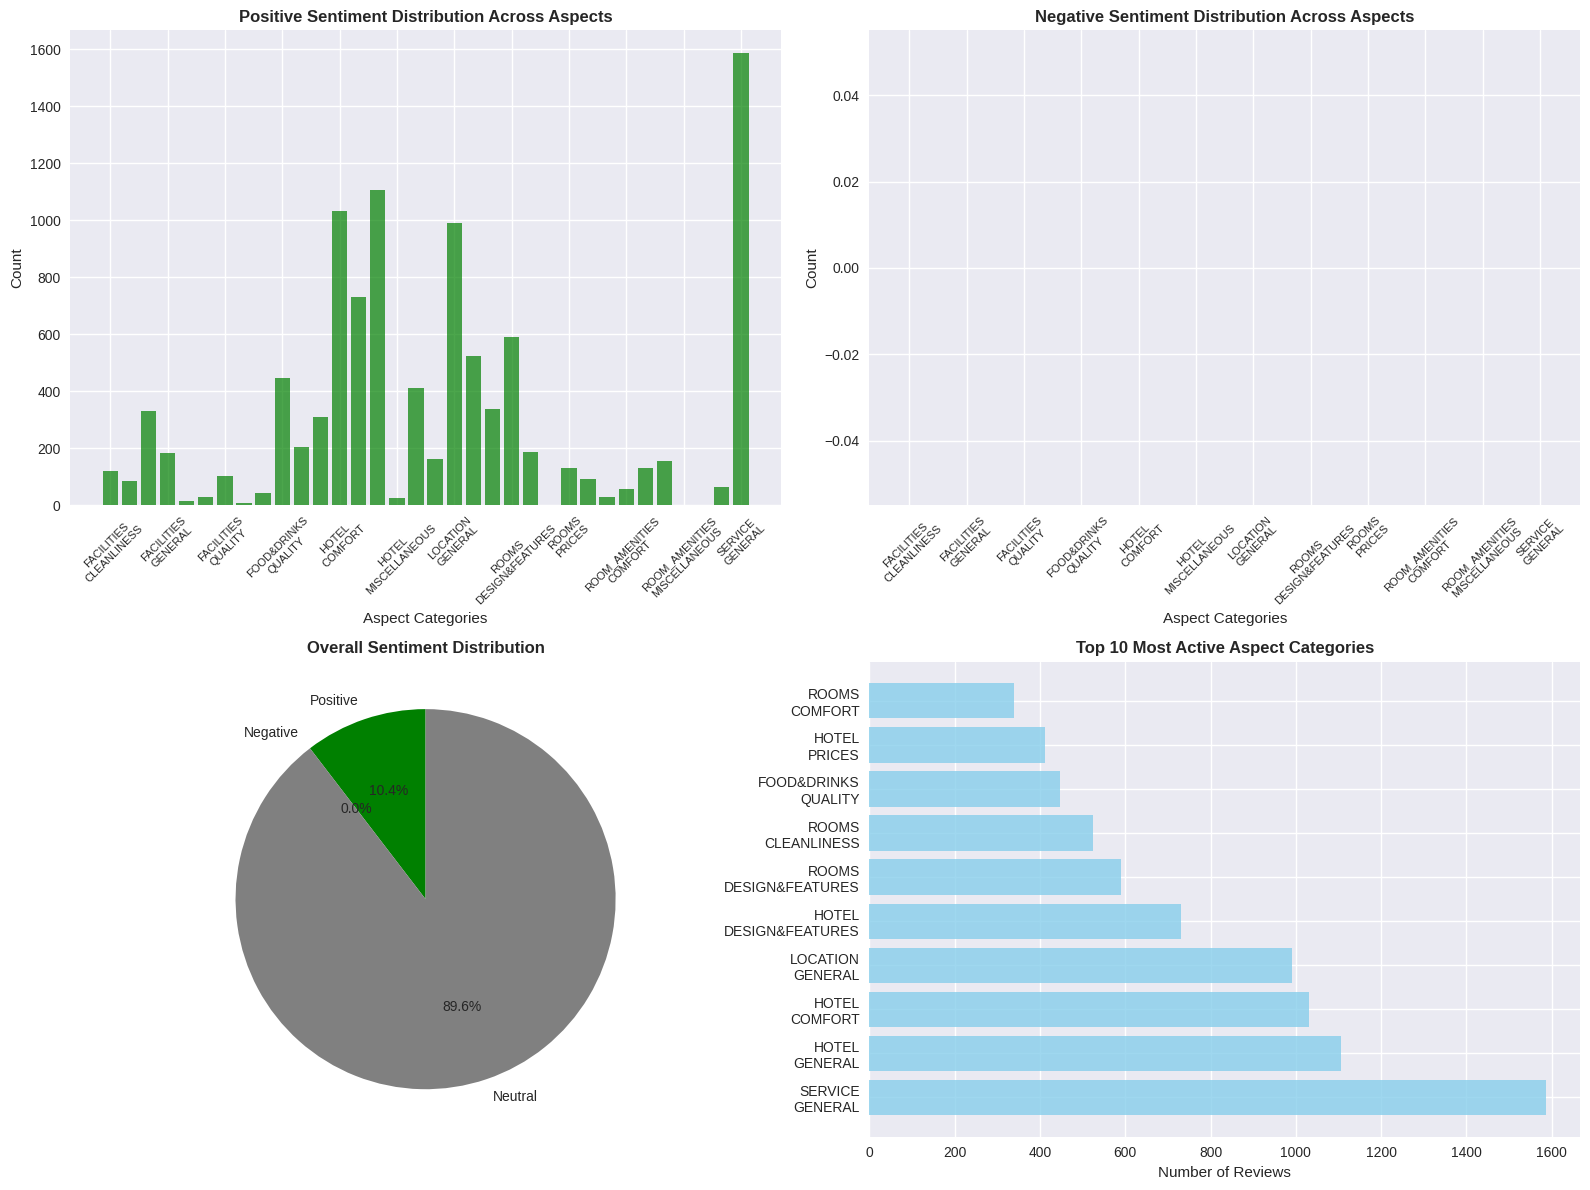


3. PREPARING DATA FOR DEEP LEARNING (FIXED)
----------------------------------------


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Using BERT tokenizer vocab size: 30522
Validating and fixing token IDs...
Train: Fixed 3350 invalid token IDs
Validation: Fixed 1061 invalid token IDs
Test: Fixed 271 invalid token IDs
Final token ID ranges:
  Train: 0 to 30521
  Val: 0 to 30521
  Test: 0 to 30521
  BERT vocab size: 30522
Labels prepared successfully:
  Train labels: 3000 samples
  Val labels: 2000 samples
  Test labels: 600 samples

Training deep learning models...

4. TRAINING LSTM MODEL
-------------------------
Using BERT vocab size: 30522
Validating token IDs for vocab_size: 30522
Dataset created with 3000 samples
Token ID range: 0 to 30521
Validating token IDs for vocab_size: 30522
Dataset created with 2000 samples
Token ID range: 0 to 30521
Initializing LSTM with vocab_size=30522, embedding_dim=128
Hidden_dim=256, num_classes=34
Trainer initialized on device: cuda
Model parameters: 6,291,746
Epoch 1/3
Training Batch 0 - input_ids shape: torch.Size([32, 256])
Training Batch 0 - input_ids range: 0 to 30521
Trainin

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Loaded BERT model: bert-base-uncased, hidden_size: 768
BERT vocab size: 30522
Trainer initialized on device: cuda
Model parameters: 109,508,386
Epoch 1/2
Training Batch 0 - input_ids shape: torch.Size([16, 256])
Training Batch 0 - input_ids range: 0 to 30521
Training Batch 0 - labels shape: torch.Size([16, 34])
Batch 0/188, Loss: 0.6980
Batch 50/188, Loss: 0.3915
Batch 100/188, Loss: 0.3025
Batch 150/188, Loss: 0.2521
Train Loss: 0.3462, Val Loss: 0.2296
Epoch 2/2
Training Batch 0 - input_ids shape: torch.Size([16, 256])
Training Batch 0 - input_ids range: 0 to 30521
Training Batch 0 - labels shape: torch.Size([16, 34])
Batch 0/188, Loss: 0.3090
Batch 50/188, Loss: 0.2922
Batch 100/188, Loss: 0.2593
Batch 150/188, Loss: 0.2975
Train Loss: 0.2601, Val Loss: 0.2187

6. EVALUATING DEEP LEARNING MODELS (FIXED)
----------------------------------------
Validating token IDs for vocab_size: 30522
Dataset created with 600 samples
Token ID range: 0 to 30521

Evaluating LSTM...
Trainer initialize

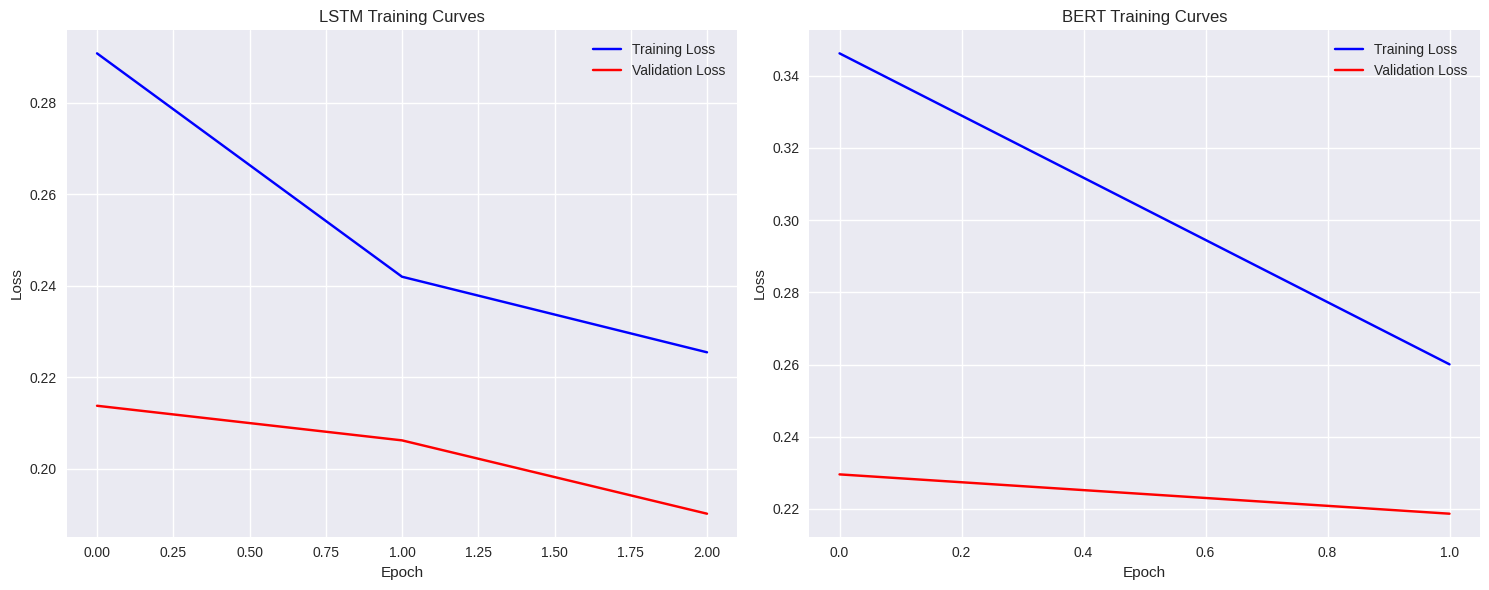


8. MODEL COMPARISON
--------------------

Model Performance Comparison:
  Model  Accuracy  Precision  Recall  F1-Score
0  LSTM    0.9243     0.9109  0.9243    0.9105
1  BERT    0.9141     0.8908  0.9141    0.8824


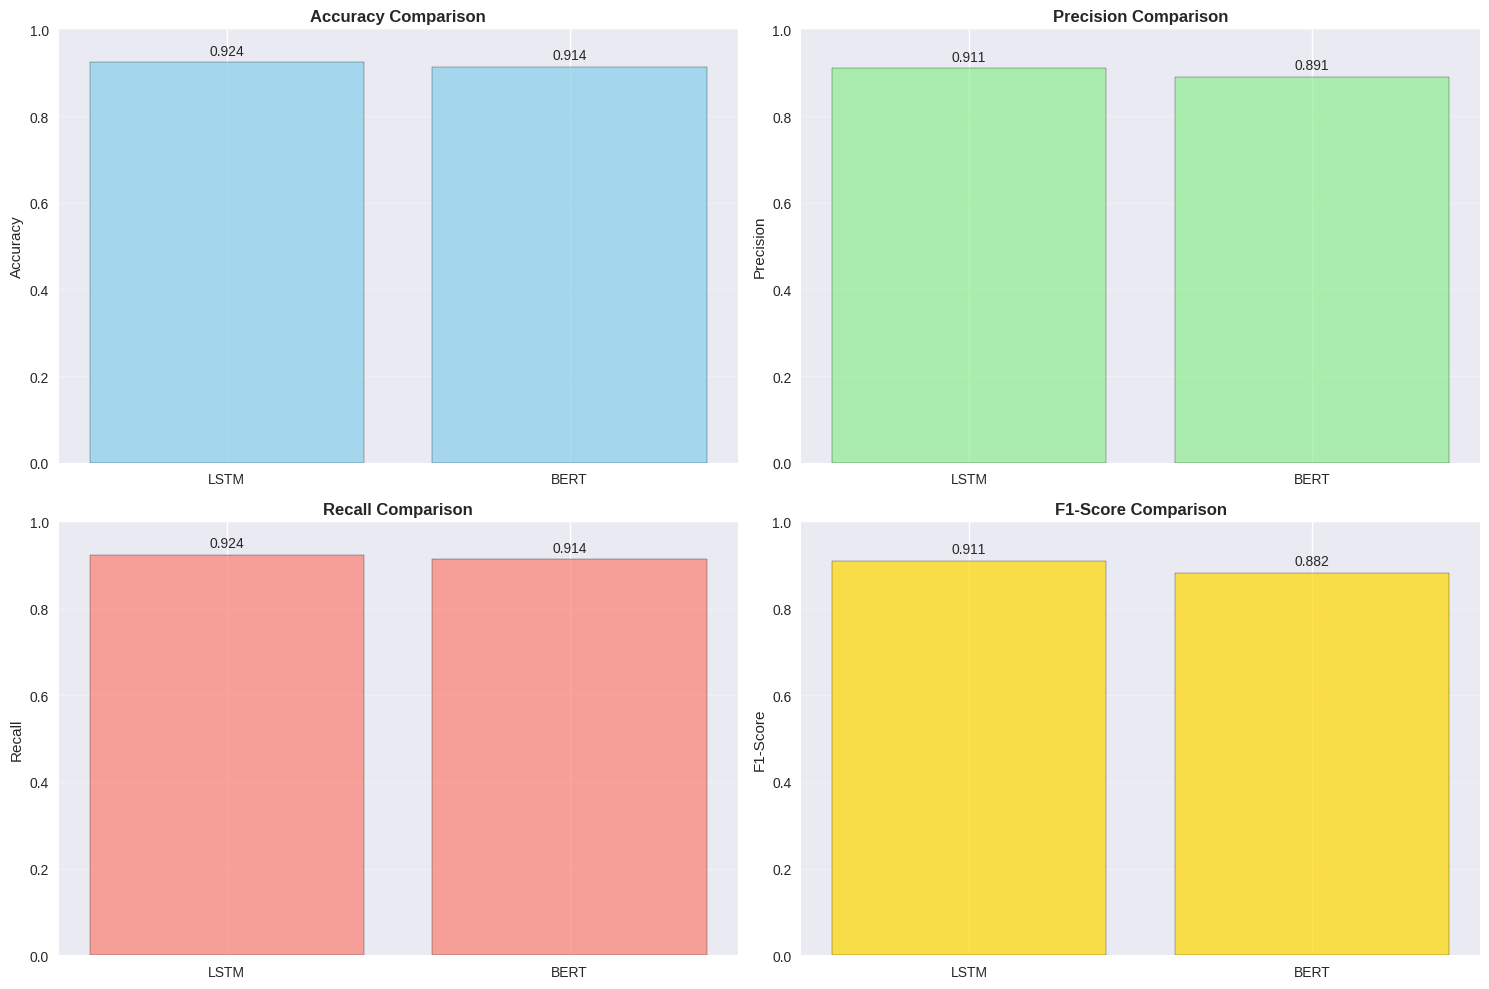


9. ASPECT-WISE PERFORMANCE ANALYSIS
----------------------------------------

Aspect-wise performance for LSTM:
                        Aspect  Accuracy  Precision  Recall  F1-Score  Support
33             SERVICE#GENERAL    0.8067     0.7848  0.9198    0.8470      349
18            LOCATION#GENERAL    0.7183     0.5439  0.6842    0.6061      190
14               HOTEL#GENERAL    0.8017     0.6429  0.2667    0.3770      135
19           ROOMS#CLEANLINESS    0.7417     0.6667  0.1325    0.2211      166
12               HOTEL#COMFORT    0.8400     0.2778  0.1250    0.1724       80
21       ROOMS#DESIGN&FEATURES    0.8133     0.3846  0.0459    0.0820      109
9          FOOD&DRINKS#QUALITY    0.8433     0.7500  0.0312    0.0600       96
0       FACILITIES#CLEANLINESS    0.9967     0.0000  0.0000    0.0000        2
1           FACILITIES#COMFORT    0.9667     0.0000  0.0000    0.0000       20
2   FACILITIES#DESIGN&FEATURES    0.9367     0.0000  0.0000    0.0000       38


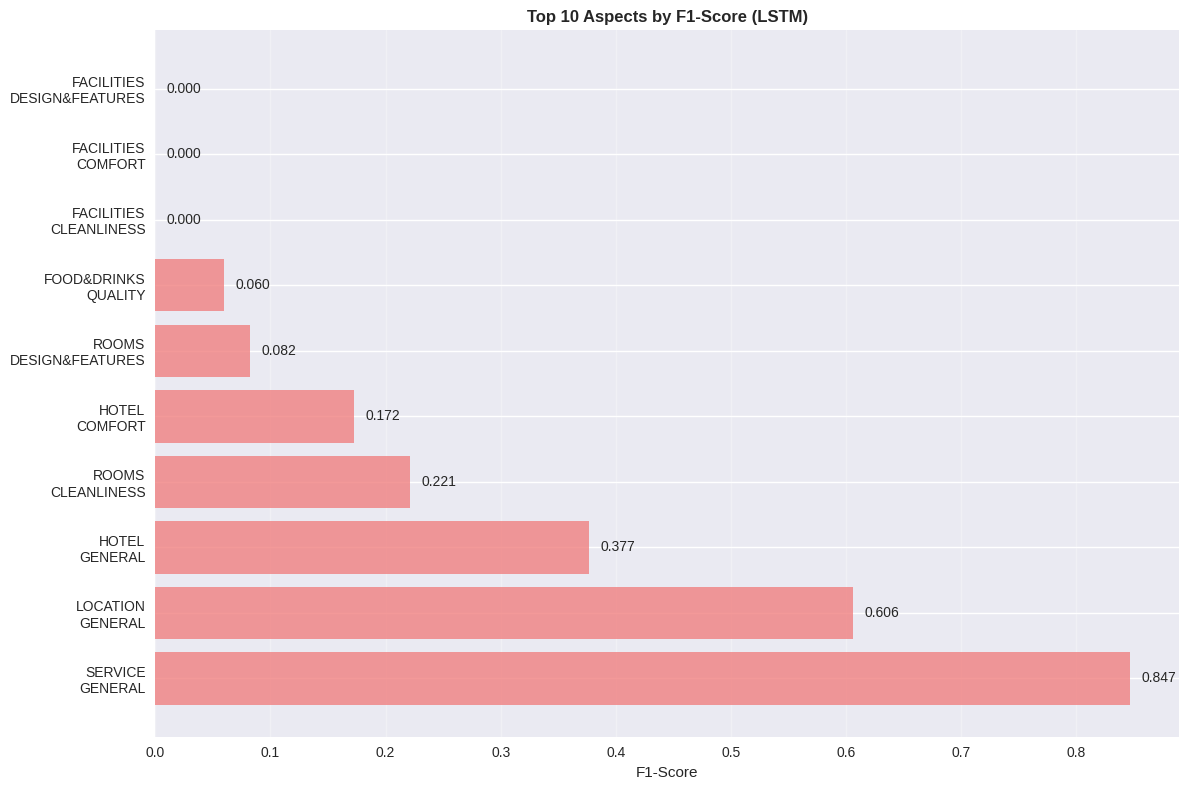


10. FINAL ANALYSIS SUMMARY
------------------------------

🏆 BEST PERFORMING MODEL: LSTM
   • Accuracy: 0.9243
   • Precision: 0.9109
   • Recall: 0.9243
   • F1-Score: 0.9105

📊 MODEL PERFORMANCE SUMMARY:
   LSTM:
     - F1-Score: 0.9105
     - Accuracy: 0.9243
   BERT:
     - F1-Score: 0.8824
     - Accuracy: 0.9141

🔝 TOP 5 BEST PREDICTED ASPECTS (LSTM):
   34. SERVICE#GENERAL: F1=0.8470
   19. LOCATION#GENERAL: F1=0.6061
   15. HOTEL#GENERAL: F1=0.3770
   20. ROOMS#CLEANLINESS: F1=0.2211
   13. HOTEL#COMFORT: F1=0.1724

⚠️  TOP 5 CHALLENGING ASPECTS (LSTM):
   1. FACILITIES#CLEANLINESS: F1=0.0000 (Support: 2)
   2. FACILITIES#COMFORT: F1=0.0000 (Support: 20)
   3. FACILITIES#DESIGN&FEATURES: F1=0.0000 (Support: 38)
   4. FACILITIES#GENERAL: F1=0.0000 (Support: 19)
   5. FACILITIES#MISCELLANEOUS: F1=0.0000 (Support: 3)

💡 RECOMMENDATIONS:
   • Models show similar performance (gap: 0.0281)
   • Consider computational efficiency for model selection
   • Excellent performance achieved

In [ ]:
# Create analyzer
analyzer = EnhancedABSAAnalyzer(preprocessed_hotel_train, preprocessed_hotel_val, preprocessed_hotel_test)

# Run complete analysis
final_results = analyzer.run_complete_analysis()